### Table of contents
1. [Figure 2A. Heatmap summarizing sample-level linear models within each cell type predicting IFNG CytoSig Score from CD8 subset proportions, CD8 subset IFNG expression, and IFN1 CytoSig Score](#1)
2. [Figure 2B. Scatterplot showing correlation between CD8_LAG3 proportion and IFNG response within TAM](#2)
3. [Figure 2C. Galaxy plots showing TAM subset density in samples that are low/high for CD8 LAG3](#3)
4. [Figure 2D. Barplots quantifying TAM subset proportions between CD8 LAG3 hi/low samples](#4)
5. [Figure 2E. Heatmap showing enrichment of immune checkpoints and inhibitory ligands in TAM CXCL10-Hi](#5)
6. [Figure 2F. Scatter plots showing beta coefficient for IFNG and IFN1 CytoSig Scores in mixed effects models for expression of individual genes within TAM and Tumor cells (untreated patients only)](#6)

In [1]:
library(harmony)
library(car)
library(stringr)
library(Seurat)
library(useful)
library(dplyr)
library(ggpubr)
library(ggrepel)
library(glue)
library(RColorBrewer)
library(ggpubr)
library(ggrepel)
library(lmerTest)
library(Scillus)
library(cowplot)
library(hrbrthemes)
library(ggridges)
library(pheatmap)
library(ggplot2)
library(magrittr)
library(broom)
library(viridis)
library(yarrr)
library(reshape2)

set.seed(1234)

options(repr.plot.width=12, repr.plot.height=9)

Loading required package: Rcpp

Loading required package: carData

Attaching SeuratObject

Attaching sp

Loading required package: ggplot2


Attaching package: 'dplyr'


The following object is masked from 'package:car':

    recode


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: lme4

Loading required package: Matrix


Attaching package: 'lmerTest'


The following object is masked from 'package:lme4':

    lmer


The following object is masked from 'package:stats':

    step



Attaching package: 'cowplot'


The following object is masked from 'package:ggpubr':

    get_legend


NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow

Loa

### Figure 2A. Heatmap summarizing sample-level linear models within each cell type predicting IFNG CytoSig Score from CD8 subset proportions, CD8 subset IFNG expression, and IFN1 CytoSig Score <a name="1"></a>

### Read in data and colors

[1] 259

[1] "ADAR"     "B2M"      "BATF2"    "BST2"     "C1S"      "CASP1"   
  [7] "CASP8"    "CCRL2"    "CD47"     "CD74"     "CMPK2"    "CMTR1"   
 [13] "CNP"      "CSF1"     "CXCL10"   "CXCL11"   "DDX60"    "DHX58"   
 [19] "EIF2AK2"  "ELF1"     "EPSTI1"   "GBP2"     "GBP4"     "GMPR"    
 [25] "HELZ2"    "HERC6"    "HLA-C"    "IFI27"    "IFI30"    "IFI35"   
 [31] "IFI44"    "IFI44L"   "IFIH1"    "IFIT2"    "IFIT3"    "IFITM1"  
 [37] "IFITM2"   "IFITM3"   "IL15"     "IL4R"     "IL7"      "IRF1"    
 [43] "IRF2"     "IRF7"     "IRF9"     "ISG15"    "ISG20"    "LAMP3"   
 [49] "LAP3"     "LGALS3BP" "LPAR6"    "LY6E"     "MOV10"    "MVB12A"  
 [55] "MX1"      "NCOA7"    "NMI"      "NUB1"     "OAS1"     "OASL"    
 [61] "OGFR"     "PARP12"   "PARP14"   "PARP9"    "PLSCR1"   "PNPT1"   
 [67] "PROCR"    "PSMA3"    "PSMB8"    "PSMB9"    "PSME1"    "PSME2"   
 [73] "RIPK2"    "RNF31"    "RSAD2"    "RTP4"     "SAMD9"    "SAMD9L"  
 [79] "SELL"     "SLC25A28" "SP110"    "STAT2"    "TAP1"     "TDRD7"   
 [85] "TENT5A"   "TMEM140"  "TRAFD1"   "TRIM14"   "TRIM21"   "TRIM25"  
 [91] "TRIM26"   "TRIM5"    "TXNIP"    "UBA7"     "UBE2L6"   "USP18"   
 [97] "WARS1"    "APOL6"    "ARID5B"   "ARL4A"    "AUTS2"    "BANK1"   
[103] "BPGM"     "BTG1"     "C1R"      "CASP3"    "CASP4"    "CASP7"   
[109] "CCL2"     "CCL5"     "CCL7"     "CD274"    "CD38"     "CD40"    
[115] "CD69"     "CD86"     "CDKN1A"   "CFB"      "CFH"      "CIITA"   
[121] "CMKLR1"   "CSF2RB"   "CXCL9"    "EIF4E3"   "FAS"      "FCGR1A"  
[127] "FGL2"     "FPR1"     "GBP6"     "GCH1"     "GPR18"    "GZMA"    
[133] "HIF1A"    "HLA-A"    "HLA-B"    "HLA-DMA"  "HLA-DQA1" "HLA-DRB1"
[139] "HLA-G"    "ICAM1"    "IDO1"     "IFIT1"    "IFNAR2"   "IL10RA"  
[145] "IL15RA"   "IL18BP"   "IL2RB"    "IL6"      "IRF4"     "IRF5"    
[151] "IRF8"     "ISOC1"    "ITGB7"    "JAK2"     "KLRK1"    "LATS2"   
[157] "LCP2"     "LYSMD2"   "MARCHF1"  "METTL7B"  "MT2A"     "MTHFD2"  
[163] "MVP"      "MX2"      "MYD88"    "NAMPT"    "NCOA3"    "NFKB1"   
[169] "NFKBIA"   "NLRC5"    "NOD1"     "NUP93"    "OAS2"     "OAS3"    
[175] "P2RY14"   "PDE4B"    "PELI1"    "PFKP"     "PIM1"     "PLA2G4A" 
[181] "PML"      "PNP"      "PSMA2"    "PSMB10"   "PSMB2"    "PTGS2"   
[187] "PTPN1"    "PTPN2"    "PTPN6"    "RAPGEF6"  "RBCK1"    "RIGI"    
[193] "RIPK1"    "RNF213"   "SAMHD1"   "SECTM1"   "SELP"     "SERPING1"
[199] "SLAMF7"   "SOCS1"    "SOCS3"    "SOD2"     "SPPL2A"   "SRI"     
[205] "SSPN"     "ST3GAL5"  "ST8SIA4"  "STAT1"    "STAT3"    "STAT4"   
[211] "TAPBP"    "TNFAIP2"  "TNFAIP3"  "TNFAIP6"  "TNFSF10"  "TOR1B"   
[217] "UPP1"     "VAMP5"    "VAMP8"    "VCAM1"    "XAF1"     "XCL1"    
[223] "ZBP1"     "ZNFX1"    "HSD17B1"  "CA2"      "CCNA1"    "CXCL1"   
[229] "GALC"     "IFI6"     "MCL1"     "ROBO1"    "SLC6A15"  "THBS1"   
[235] "TIMP3"    "DDX58"    "WARS"     "MARCH1"   "PRIC285"  "FTSJD2"  
[241] "NOS2"     "PDCD1LG2" "LGALS9"   "HMGB1"    "CEACAM1"  "FGL1"    
[247] "HLA-DRA"  "NECTIN2"  "PVR"      "SIGLEC10" "TNFRSF14" "VSIG4"   
[253] "VSIR"     "HLA-E"    "LGALS3"   "CD80"     "LILRB1"   "IL10"    
[259] "CCL22"

Tumor               TAM               CD8       Plasma cell 
        "#A0BAAC"         "#7FC97F"         "#C2AFCE"         "#E4B9A3" 
               DC       Endothelial          T-Helper                NK 
        "#FDC988"         "#FEEB93"         "#D1DD9E"         "#658DAA" 
         Monocyte             T-reg            B cell       CD8 NK-like 
        "#704BA0"         "#D31286"         "#DD2456"         "#C2541E" 
       Fibroblast Perivascular cell            Contam           Omitted 
        "#95603B"         "#666666"          "grey95"          "grey95"


IO Exposed   IO Naive 
    104514     184254 


            Tumor        Fibroblast Perivascular cell       Endothelial 
            18994               277              1691              1781 
              TAM          Monocyte                DC               CD8 
            27684             15072              4522             88457 
      CD8 NK-like                NK          T-Helper             T-reg 
            13563             20422             22656              8618 
           B cell       Plasma cell 
             3330              1304 

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



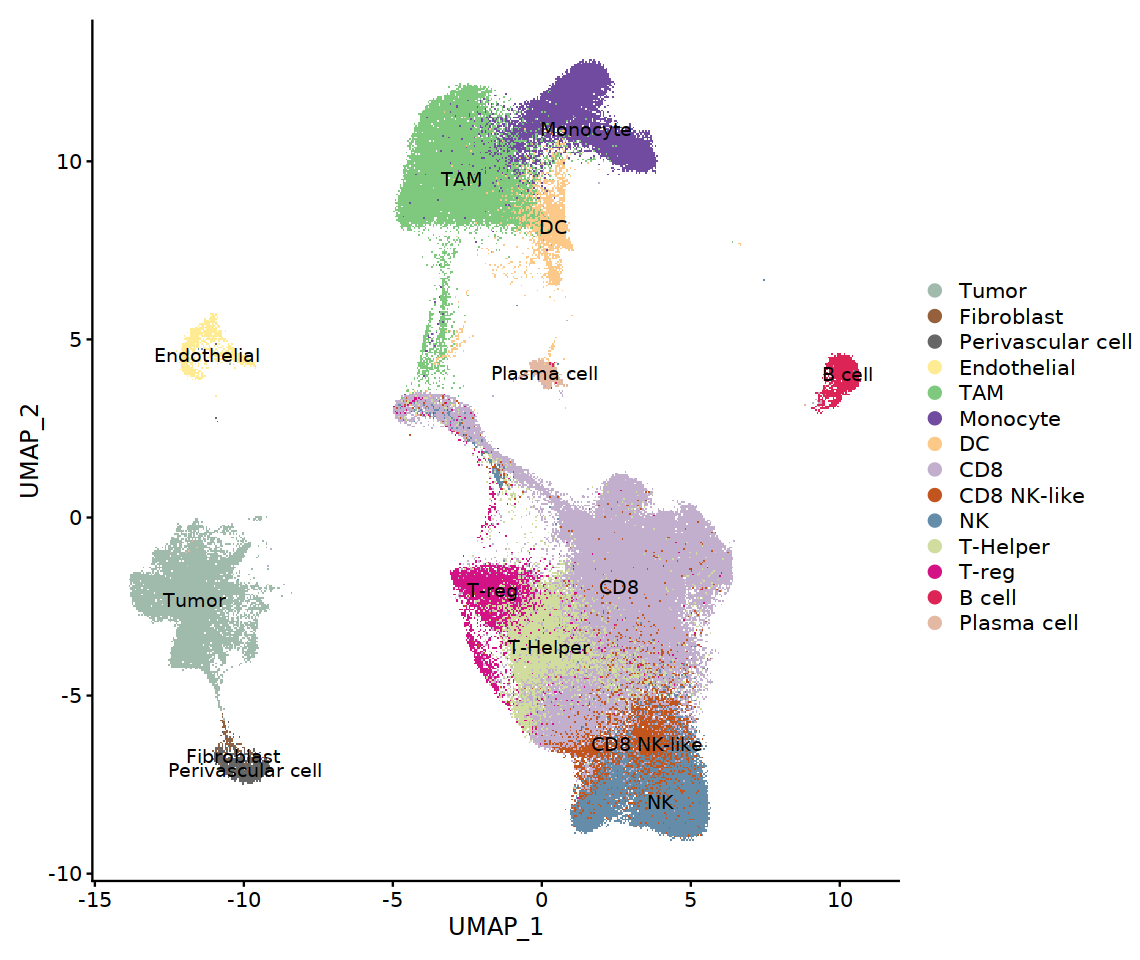

In [36]:
options(repr.plot.width=9.5, repr.plot.height=8)

goi = readRDS("../Signatures/manuscript_goi_hallmark_benciminn_curated.RDS")
length(goi)

goi

##

celltype_cols = readRDS(file = "../Data_Objects/celltype_cols.RDS")
celltype_cols

##

seur_full = readRDS("../Data_Objects/seur_full_BBK_Manuscript.RDS")
table(seur_full$IO_Treated)

Idents(seur_full) = "BBK_Broad_Celltype"

seur_full = subset(seur_full, idents = c("Contam","Omitted"), invert = T)

seur_full$BBK_Broad_Celltype = factor(seur_full$BBK_Broad_Celltype, levels = c("Tumor","Fibroblast","Perivascular cell","Endothelial","TAM","Monocyte","DC","CD8","CD8 NK-like","NK","T-Helper","T-reg","B cell","Plasma cell"))
Idents(seur_full) = "BBK_Broad_Celltype"
table(Idents(seur_full))

DimPlot(seur_full, label = T, cols = celltype_cols[levels(Idents(seur_full))], shuffle = F)

In [37]:
Idents(seur_full) = "BBK_Broad_Celltype_DE"
table(Idents(seur_full))


                      Tumor Perivascular_and_Fibroblast 
                      18994                        1968 
                Endothelial                         TAM 
                       1781                       27684 
                   Monocyte                          DC 
                      15072                        4522 
                        CD8                 CD8 NK-like 
                      88457                       13563 
                         NK                    T-Helper 
                      20422                       22656 
                      T-reg                      B cell 
                       8618                        3330 
                Plasma cell 
                       1304 

In [38]:
cytosig_binded_df = readRDS("../Data_Objects/cytosig_binded_df_seur_full.RDS")
cytosig_df_list = readRDS("../Data_Objects/cytosig_df_list_seur_full.RDS")

cytosig_binded_df = cytosig_binded_df[row.names(seur_full@meta.data),]
corner(cytosig_binded_df)

seur_full$IFNG = as.numeric(seur_full@assays$RNA@data["IFNG",])

setequal(row.names(cytosig_binded_df),row.names(seur_full@meta.data))
seur_full@meta.data = cbind(seur_full@meta.data, cytosig_binded_df)

head(seur_full@meta.data)

Activin.A_CytoSig_Pval BDNF_CytoSig_Pval
GTTCTCGAGAGGTAGA-1.5pool1_2 0.560                  0.602            
CTAGAGTCATCAGTCA-1.5pool1_2 0.106                  0.521            
CGGCTAGAGGTAGCCA-1.5pool1_2 0.196                  0.482            
CTGCTGTAGTGTTTGC-1.5pool1_2 0.056                  0.437            
CCATGTCCATCGATGT-1.5pool1_2 0.000                  0.908            
                            BMP2_CytoSig_Pval BMP4_CytoSig_Pval
GTTCTCGAGAGGTAGA-1.5pool1_2 0.085             0.601            
CTAGAGTCATCAGTCA-1.5pool1_2 0.004             0.014            
CGGCTAGAGGTAGCCA-1.5pool1_2 0.137             0.000            
CTGCTGTAGTGTTTGC-1.5pool1_2 0.082             0.000            
CCATGTCCATCGATGT-1.5pool1_2 0.311             0.023            
                            BMP6_CytoSig_Pval
GTTCTCGAGAGGTAGA-1.5pool1_2 0.640            
CTAGAGTCATCAGTCA-1.5pool1_2 0.591            
CGGCTAGAGGTAGCCA-1.5pool1_2 0.212            
CTGCTGTAGTGTTTGC-1.5pool1_2 0.658            
CCATGTCCATCGATGT-1.5pool1_2 0.128

[1] TRUE

orig.ident    nCount_RNA nFeature_RNA Sample  
GTTCTCGAGAGGTAGA-1.5pool1_2 SeuratProject 17633      4215         5pool1_2
CTAGAGTCATCAGTCA-1.5pool1_2 SeuratProject 14519      4068         5pool1_2
CGGCTAGAGGTAGCCA-1.5pool1_2 SeuratProject 14443      3521         5pool1_2
CTGCTGTAGTGTTTGC-1.5pool1_2 SeuratProject 12982      3884         5pool1_2
CCATGTCCATCGATGT-1.5pool1_2 SeuratProject 12169      3542         5pool1_2
TCTGAGAAGCGTAATA-1.5pool1_2 SeuratProject 11615      3479         5pool1_2
                            cell_id                     Cohort Chemistry
GTTCTCGAGAGGTAGA-1.5pool1_2 GTTCTCGAGAGGTAGA-1.5pool1_2 Braun  5prime   
CTAGAGTCATCAGTCA-1.5pool1_2 CTAGAGTCATCAGTCA-1.5pool1_2 Braun  5prime   
CGGCTAGAGGTAGCCA-1.5pool1_2 CGGCTAGAGGTAGCCA-1.5pool1_2 Braun  5prime   
CTGCTGTAGTGTTTGC-1.5pool1_2 CTGCTGTAGTGTTTGC-1.5pool1_2 Braun  5prime   
CCATGTCCATCGATGT-1.5pool1_2 CCATGTCCATCGATGT-1.5pool1_2 Braun  5prime   
TCTGAGAAGCGTAATA-1.5pool1_2 TCTGAGAAGCGTAATA-1.5pool1_2 Braun  5prime   
                            Treated IO TKI ... MCSF_CytoSig_Zscore
GTTCTCGAGAGGTAGA-1.5pool1_2 No      No No  ... 1.001942           
CTAGAGTCATCAGTCA-1.5pool1_2 No      No No  ... 2.451215           
CGGCTAGAGGTAGCCA-1.5pool1_2 No      No No  ... 1.972279           
CTGCTGTAGTGTTTGC-1.5pool1_2 No      No No  ... 1.884094           
CCATGTCCATCGATGT-1.5pool1_2 No      No No  ... 1.908597           
TCTGAGAAGCGTAATA-1.5pool1_2 No      No No  ... 1.927733           
                            NO_CytoSig_Zscore OSM_CytoSig_Zscore
GTTCTCGAGAGGTAGA-1.5pool1_2 -2.1785066        7.098635          
CTAGAGTCATCAGTCA-1.5pool1_2  2.2863716        4.748127          
CGGCTAGAGGTAGCCA-1.5pool1_2  2.7810020        3.985758          
CTGCTGTAGTGTTTGC-1.5pool1_2  0.2776511        7.290774          
CCATGTCCATCGATGT-1.5pool1_2  1.3299547        6.065471          
TCTGAGAAGCGTAATA-1.5pool1_2 -0.6962092        2.503674          
                            TGFB1_CytoSig_Zscore TGFB3_CytoSig_Zscore
GTTCTCGAGAGGTAGA-1.5pool1_2 -6.051863            -3.642090287        
CTAGAGTCATCAGTCA-1.5pool1_2 -1.362296            -2.708247286        
CGGCTAGAGGTAGCCA-1.5pool1_2 -5.922315            -1.623494911        
CTGCTGTAGTGTTTGC-1.5pool1_2 -1.029047             0.002435523        
CCATGTCCATCGATGT-1.5pool1_2 -1.378182            -2.741233835        
TCTGAGAAGCGTAATA-1.5pool1_2 -2.224803            -0.886568092        
                            TNFA_CytoSig_Zscore TRAIL_CytoSig_Zscore
GTTCTCGAGAGGTAGA-1.5pool1_2 -0.41856076         -1.6527684          
CTAGAGTCATCAGTCA-1.5pool1_2 -0.48596727         -1.7304320          
CGGCTAGAGGTAGCCA-1.5pool1_2 -0.94871751         -0.6126047          
CTGCTGTAGTGTTTGC-1.5pool1_2 -0.02404577          0.2841661          
CCATGTCCATCGATGT-1.5pool1_2 -0.44667532          0.1575640          
TCTGAGAAGCGTAATA-1.5pool1_2 -0.02225492          0.7431055          
                            TWEAK_CytoSig_Zscore VEGFA_CytoSig_Zscore
GTTCTCGAGAGGTAGA-1.5pool1_2  1.6560727           0.8559922           
CTAGAGTCATCAGTCA-1.5pool1_2 -0.5288041           0.1061257           
CGGCTAGAGGTAGCCA-1.5pool1_2 -0.5609818           1.7644153           
CTGCTGTAGTGTTTGC-1.5pool1_2 -1.7388418           0.9394385           
CCATGTCCATCGATGT-1.5pool1_2 -1.7970921           1.3198839           
TCTGAGAAGCGTAATA-1.5pool1_2 -0.4337432           2.3108286           
                            WNT3A_CytoSig_Zscore
GTTCTCGAGAGGTAGA-1.5pool1_2 -0.9644418          
CTAGAGTCATCAGTCA-1.5pool1_2 -0.4622783          
CGGCTAGAGGTAGCCA-1.5pool1_2 -0.7546578          
CTGCTGTAGTGTTTGC-1.5pool1_2 -1.4131691          
CCATGTCCATCGATGT-1.5pool1_2 -0.6360882          
TCTGAGAAGCGTAATA-1.5pool1_2 -1.3662210

### Dotplot of IFNGR1, IFNGR2, and IRF1 expression for annotation of IFNG response heatmap

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



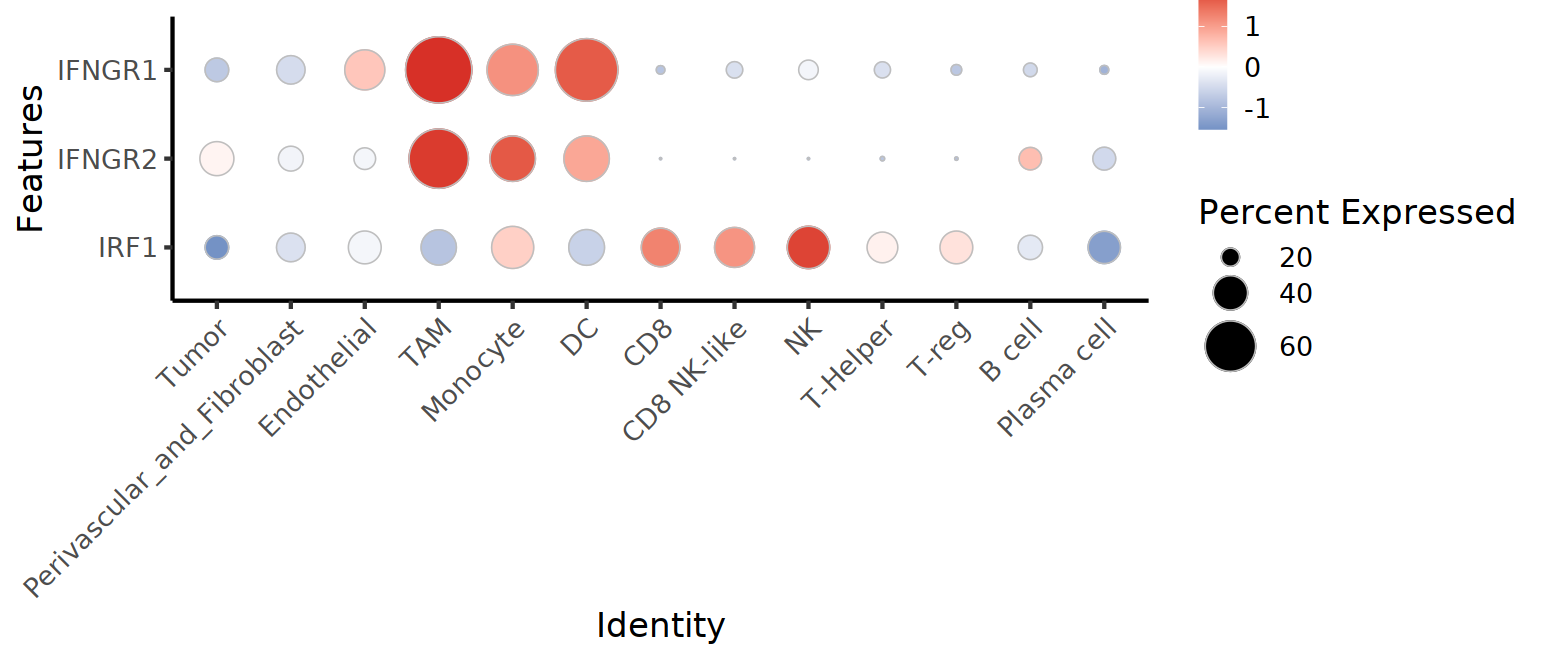

In [39]:
options(repr.plot.width=13, repr.plot.height=5.5)

DotPlot(seur_full, features = rev(c("IFNGR1","IFNGR2","IRF1")),group.by = "BBK_Broad_Celltype_DE",assay = "RNA",dot.scale = 18, cols = c("white","red")) + theme_classic(base_size = 20) +
geom_point(aes(size = pct.exp),shape = 21, color = "grey",stroke = 0.5) + 
scale_colour_gradient2(low = "#4575b4", mid = "white", high = "#d73027") +
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) + coord_flip()

ggsave("../Figures/Figure2/Figure2A_IFNGR_Dotplot_Annotation.pdf", width = 13, height = 5.5)

### Collect data for running linear models. At a sample level we model IFNG CytoSig score within each cell type with IFN1 CytoSig score, CD8 subset proportions, and CD8 subset % IFNG expression as predictor variables

In [40]:
cd8sub = subset(seur_full@meta.data, BBK_Broad_Celltype_DE == "CD8")
cd8sub$BBK_Final_Celltype = droplevels(cd8sub$BBK_Final_Celltype)
table(cd8sub$BBK_Final_Celltype)

head(cd8sub)


 CD8_Cycling_4  CD8_Cycling_2  CD8_Cycling_1       CD8_LAG3        CD8_RPS 
           129           2528           2700          22043          21269 
      CD8_IL7R   CD8_HSP_IFNG CD8_TNFRSF9_Hi     CD8_ISG_Hi    CD8_TRBV7-7 
         14492          12178           4995           2429           1934 
   CD8_TRBV5-6      CD8_KLRB1      CD8_FOXP3    CD8_TRBV3-1 
          1725           1103            589            343 

orig.ident    nCount_RNA nFeature_RNA Sample  
GGCGACTAGGCCCTCA-1.5pool1_2 SeuratProject 24180      4518         5pool1_2
CGCTTCAGTAGATTAG-1.5pool1_2 SeuratProject 17739      3941         5pool1_2
TGAGCCGGTGCATCTA-1.5pool1_2 SeuratProject  9958      2927         5pool1_2
CAGCTAATCAGTGCAT-1.5pool1_2 SeuratProject  9198      2965         5pool1_2
CTACCCAAGGATTCGG-1.5pool1_2 SeuratProject  8930      2959         5pool1_2
GGACATTAGGACACCA-1.5pool1_2 SeuratProject  8505      2615         5pool1_2
                            cell_id                     Cohort Chemistry
GGCGACTAGGCCCTCA-1.5pool1_2 GGCGACTAGGCCCTCA-1.5pool1_2 Braun  5prime   
CGCTTCAGTAGATTAG-1.5pool1_2 CGCTTCAGTAGATTAG-1.5pool1_2 Braun  5prime   
TGAGCCGGTGCATCTA-1.5pool1_2 TGAGCCGGTGCATCTA-1.5pool1_2 Braun  5prime   
CAGCTAATCAGTGCAT-1.5pool1_2 CAGCTAATCAGTGCAT-1.5pool1_2 Braun  5prime   
CTACCCAAGGATTCGG-1.5pool1_2 CTACCCAAGGATTCGG-1.5pool1_2 Braun  5prime   
GGACATTAGGACACCA-1.5pool1_2 GGACATTAGGACACCA-1.5pool1_2 Braun  5prime   
                            Treated IO TKI ... MCSF_CytoSig_Zscore
GGCGACTAGGCCCTCA-1.5pool1_2 No      No No  ... -7.0588417         
CGCTTCAGTAGATTAG-1.5pool1_2 No      No No  ... -8.4527833         
TGAGCCGGTGCATCTA-1.5pool1_2 No      No No  ... -0.5958068         
CAGCTAATCAGTGCAT-1.5pool1_2 No      No No  ...  0.3902704         
CTACCCAAGGATTCGG-1.5pool1_2 No      No No  ... -0.7739146         
GGACATTAGGACACCA-1.5pool1_2 No      No No  ... -2.4304120         
                            NO_CytoSig_Zscore OSM_CytoSig_Zscore
GGCGACTAGGCCCTCA-1.5pool1_2 -2.335175          1.496606335      
CGCTTCAGTAGATTAG-1.5pool1_2 -5.362679         -0.005335268      
TGAGCCGGTGCATCTA-1.5pool1_2  4.856282          5.693500986      
CAGCTAATCAGTGCAT-1.5pool1_2  3.733401          4.624032794      
CTACCCAAGGATTCGG-1.5pool1_2  1.237571          2.503957369      
GGACATTAGGACACCA-1.5pool1_2  0.323889          1.692611217      
                            TGFB1_CytoSig_Zscore TGFB3_CytoSig_Zscore
GGCGACTAGGCCCTCA-1.5pool1_2 -5.451476            -14.2388438         
CGCTTCAGTAGATTAG-1.5pool1_2 -4.796450            -16.0148776         
TGAGCCGGTGCATCTA-1.5pool1_2 -1.388233              1.7494915         
CAGCTAATCAGTGCAT-1.5pool1_2 -1.454464              1.3784634         
CTACCCAAGGATTCGG-1.5pool1_2 -2.648836              0.6328092         
GGACATTAGGACACCA-1.5pool1_2 -1.202769             -1.8447969         
                            TNFA_CytoSig_Zscore TRAIL_CytoSig_Zscore
GGCGACTAGGCCCTCA-1.5pool1_2 -0.5616483          -4.362775           
CGCTTCAGTAGATTAG-1.5pool1_2 -1.9489291          -5.882239           
TGAGCCGGTGCATCTA-1.5pool1_2  3.6811759           2.605861           
CAGCTAATCAGTGCAT-1.5pool1_2  3.6703724           3.655407           
CTACCCAAGGATTCGG-1.5pool1_2  0.4508172           1.307983           
GGACATTAGGACACCA-1.5pool1_2 -2.9718752          -2.619311           
                            TWEAK_CytoSig_Zscore VEGFA_CytoSig_Zscore
GGCGACTAGGCCCTCA-1.5pool1_2  1.3283015            2.7775287          
CGCTTCAGTAGATTAG-1.5pool1_2  0.4878411            1.7237524          
TGAGCCGGTGCATCTA-1.5pool1_2  2.8340530            2.2388093          
CAGCTAATCAGTGCAT-1.5pool1_2  1.8546805            4.0876671          
CTACCCAAGGATTCGG-1.5pool1_2 -0.3192636           -0.9160298          
GGACATTAGGACACCA-1.5pool1_2  0.2547898           -2.1872778          
                            WNT3A_CytoSig_Zscore
GGCGACTAGGCCCTCA-1.5pool1_2 -2.343055           
CGCTTCAGTAGATTAG-1.5pool1_2 -3.519184           
TGAGCCGGTGCATCTA-1.5pool1_2 -1.038173           
CAGCTAATCAGTGCAT-1.5pool1_2 -1.750168           
CTACCCAAGGATTCGG-1.5pool1_2 -2.045897           
GGACATTAGGACACCA-1.5pool1_2 -1.612507

In [41]:
meta = seur_full@meta.data
meta = meta[,c("Cohort","Sample","Patient","SampleName","Biopsy","Stage_Corrected","Stage_Corrected_EarlyLate","IO_Treated","IO","BBK_Broad_Celltype_DE","BBK_Broad_Celltype","BBK_Final_Celltype","IFNG","IFNG_CytoSig_Zscore","IFN1_CytoSig_Zscore","IFNG_CytoSig_Pval","IFN1_CytoSig_Pval")]

resp_collapsed = meta %>%
group_by(BBK_Broad_Celltype_DE, Sample, Patient, Biopsy, Stage_Corrected, IO_Treated, IO)%>% 
summarise(IFNG_CytoSig_Zscore_Median=median(IFNG_CytoSig_Zscore),IFN1_CytoSig_Zscore_Median=median(IFN1_CytoSig_Zscore))
          
head(resp_collapsed)

`summarise()` has grouped output by 'BBK_Broad_Celltype_DE', 'Sample',
'Patient', 'Biopsy', 'Stage_Corrected', 'IO_Treated'. You can override using
the `.groups` argument.


BBK_Broad_Celltype_DE Sample                  Patient Biopsy    
1 Tumor                 5pool1_2                S1      Kidney    
2 Tumor                 Bi_0600855_T3           P55     Abdomen   
3 Tumor                 Bi_0600906_T1           P906    Lymph_node
4 Tumor                 Bi_0600913_T1           P913    Lung      
5 Tumor                 Bi_0600915_T1_TrueTumor P915    Kidney    
6 Tumor                 Bi_0600916_T1           P916    Lymph_node
  Stage_Corrected IO_Treated IO IFNG_CytoSig_Zscore_Median
1 I               IO Naive   No -0.604802613              
2 IV              IO Exposed PR  1.894924249              
3 IV              IO Exposed PD -0.221275979              
4 IV              IO Exposed SD  0.002540806              
5 III             IO Exposed PR  2.909868476              
6 IV              IO Naive   No -0.752818314              
  IFN1_CytoSig_Zscore_Median
1  0.18369901               
2  0.30303075               
3 -2.01265965               
4  0.08796527               
5  0.12830237               
6 -1.89117550

### For cells of each CD8 subset within a given sample, calculate its proportion out of the total sample and the % expressing IFNG

In [42]:
ifn_exp_list = list()

cyt = unique(as.character(cd8sub$BBK_Final_Celltype))
cyt

for (i in 1:length(cyt)){
    sub = subset(seur_full, subset = BBK_Final_Celltype == cyt[i])
    
    a = DotPlot(sub, features = c("rna_IFNG"),group.by = "Sample")$data

totalsample = data.frame(table(seur_full$Sample))
colnames(totalsample) = c("id","totalcells")
head(totalsample)
nrow(totalsample)

coisample = data.frame(table(sub$Sample))
colnames(coisample) = c("id","coi")
head(coisample)
nrow(coisample)

a = left_join(a, coisample, by = "id")
a = left_join(a, totalsample, by = "id")

a$proportion = a$coi/a$totalcells
a$Sample = a$id

a_sub = a[,c("avg.exp","pct.exp","proportion","coi","totalcells")]
colnames(a_sub) = paste(cyt[i],colnames(a_sub),sep = "_")
a_sub$Sample = a$Sample
    
ifn_exp_list[[i]] = a_sub    

}

names(ifn_exp_list) = cyt
str(ifn_exp_list)


[1] "CD8_Cycling_1"  "CD8_FOXP3"      "CD8_LAG3"       "CD8_ISG_Hi"    
 [5] "CD8_IL7R"       "CD8_Cycling_2"  "CD8_TNFRSF9_Hi" "CD8_KLRB1"     
 [9] "CD8_HSP_IFNG"   "CD8_TRBV7-7"    "CD8_RPS"        "CD8_TRBV5-6"   
[13] "CD8_Cycling_4"  "CD8_TRBV3-1"

Warning message:
"Scaling data with a low number of groups may produce misleading results"


List of 14
 $ CD8_Cycling_1 :'data.frame':	40 obs. of  6 variables:
  ..$ CD8_Cycling_1_avg.exp   : num [1:40] 2.39 2.96 0 0 7.6 ...
  ..$ CD8_Cycling_1_pct.exp   : num [1:40] 46.7 35 0 0 55.6 ...
  ..$ CD8_Cycling_1_proportion: num [1:40] 0.00125 0.03491 0.00125 0.00469 0.00331 ...
  ..$ CD8_Cycling_1_coi       : int [1:40] 15 137 2 1 9 126 8 23 26 3 ...
  ..$ CD8_Cycling_1_totalcells: int [1:40] 12007 3924 1605 213 2722 5726 226 5705 6455 748 ...
  ..$ Sample                  : Factor w/ 42 levels "5pool1_2","Bi_0600855_T3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ CD8_FOXP3     :'data.frame':	36 obs. of  6 variables:
  ..$ CD8_FOXP3_avg.exp   : num [1:36] 2.59 14.91 3.26 0 6.55 ...
  ..$ CD8_FOXP3_pct.exp   : num [1:36] 46.4 83.3 50 0 50 ...
  ..$ CD8_FOXP3_proportion: num [1:36] 0.002332 0.001529 0.001246 0.004695 0.000735 ...
  ..$ CD8_FOXP3_coi       : int [1:36] 28 6 2 1 2 24 4 7 1 2 ...
  ..$ CD8_FOXP3_totalcells: int [1:36] 12007 3924 1605 213 2722 5726 5705 6455 748 4653 ...
  ..$ Samp

### Combine these outputs into a data frame

In [43]:
ifn_exp_list_df = ifn_exp_list[[1]]

for (i in 2:length(ifn_exp_list)){
    
    ifn_exp_list_df = full_join(ifn_exp_list_df, ifn_exp_list[[i]], by = "Sample")
    
}

head(ifn_exp_list_df)
colnames(ifn_exp_list_df)

CD8_Cycling_1_avg.exp CD8_Cycling_1_pct.exp CD8_Cycling_1_proportion
1 2.392355              46.66667              0.001249271             
2 2.958890              35.03650              0.034913354             
3 0.000000               0.00000              0.001246106             
4 0.000000               0.00000              0.004694836             
5 7.598143              55.55556              0.003306392             
6 3.168948              53.17460              0.022004890             
  CD8_Cycling_1_coi CD8_Cycling_1_totalcells Sample                 
1  15               12007                    5pool1_2               
2 137                3924                    Bi_0600855_T3          
3   2                1605                    Bi_0600906_T1          
4   1                 213                    Bi_0600912_T1          
5   9                2722                    Bi_0600913_T1          
6 126                5726                    Bi_0600915_T1_TrueTumor
  CD8_FOXP3_avg.exp CD8_FOXP3_pct.exp CD8_FOXP3_proportion CD8_FOXP3_coi ...
1  2.585081         46.42857          0.0023319730         28            ...
2 14.910061         83.33333          0.0015290520          6            ...
3  3.255208         50.00000          0.0012461059          2            ...
4  0.000000          0.00000          0.0046948357          1            ...
5  6.554307         50.00000          0.0007347539          2            ...
6  3.522146         50.00000          0.0041914076         24            ...
  CD8_Cycling_4_avg.exp CD8_Cycling_4_pct.exp CD8_Cycling_4_proportion
1       NA                    NA                       NA             
2 4.352674              62.50000              0.002038736             
3       NA                    NA                       NA             
4       NA                    NA                       NA             
5       NA                    NA                       NA             
6 4.537443              57.14286              0.001222494             
  CD8_Cycling_4_coi CD8_Cycling_4_totalcells CD8_TRBV3-1_avg.exp
1 NA                  NA                     NA                 
2  8                3924                     NA                 
3 NA                  NA                     NA                 
4 NA                  NA                     NA                 
5 NA                  NA                     NA                 
6  7                5726                     NA                 
  CD8_TRBV3-1_pct.exp CD8_TRBV3-1_proportion CD8_TRBV3-1_coi
1 NA                  NA                     NA             
2 NA                  NA                     NA             
3 NA                  NA                     NA             
4 NA                  NA                     NA             
5 NA                  NA                     NA             
6 NA                  NA                     NA             
  CD8_TRBV3-1_totalcells
1 NA                    
2 NA                    
3 NA                    
4 NA                    
5 NA                    
6 NA

[1] "CD8_Cycling_1_avg.exp"     "CD8_Cycling_1_pct.exp"    
 [3] "CD8_Cycling_1_proportion"  "CD8_Cycling_1_coi"        
 [5] "CD8_Cycling_1_totalcells"  "Sample"                   
 [7] "CD8_FOXP3_avg.exp"         "CD8_FOXP3_pct.exp"        
 [9] "CD8_FOXP3_proportion"      "CD8_FOXP3_coi"            
[11] "CD8_FOXP3_totalcells"      "CD8_LAG3_avg.exp"         
[13] "CD8_LAG3_pct.exp"          "CD8_LAG3_proportion"      
[15] "CD8_LAG3_coi"              "CD8_LAG3_totalcells"      
[17] "CD8_ISG_Hi_avg.exp"        "CD8_ISG_Hi_pct.exp"       
[19] "CD8_ISG_Hi_proportion"     "CD8_ISG_Hi_coi"           
[21] "CD8_ISG_Hi_totalcells"     "CD8_IL7R_avg.exp"         
[23] "CD8_IL7R_pct.exp"          "CD8_IL7R_proportion"      
[25] "CD8_IL7R_coi"              "CD8_IL7R_totalcells"      
[27] "CD8_Cycling_2_avg.exp"     "CD8_Cycling_2_pct.exp"    
[29] "CD8_Cycling_2_proportion"  "CD8_Cycling_2_coi"        
[31] "CD8_Cycling_2_totalcells"  "CD8_TNFRSF9_Hi_avg.exp"   
[33] "CD8_TNFRSF9_Hi_pct.exp"    "CD8_TNFRSF9_Hi_proportion"
[35] "CD8_TNFRSF9_Hi_coi"        "CD8_TNFRSF9_Hi_totalcells"
[37] "CD8_KLRB1_avg.exp"         "CD8_KLRB1_pct.exp"        
[39] "CD8_KLRB1_proportion"      "CD8_KLRB1_coi"            
[41] "CD8_KLRB1_totalcells"      "CD8_HSP_IFNG_avg.exp"     
[43] "CD8_HSP_IFNG_pct.exp"      "CD8_HSP_IFNG_proportion"  
[45] "CD8_HSP_IFNG_coi"          "CD8_HSP_IFNG_totalcells"  
[47] "CD8_TRBV7-7_avg.exp"       "CD8_TRBV7-7_pct.exp"      
[49] "CD8_TRBV7-7_proportion"    "CD8_TRBV7-7_coi"          
[51] "CD8_TRBV7-7_totalcells"    "CD8_RPS_avg.exp"          
[53] "CD8_RPS_pct.exp"           "CD8_RPS_proportion"       
[55] "CD8_RPS_coi"               "CD8_RPS_totalcells"       
[57] "CD8_TRBV5-6_avg.exp"       "CD8_TRBV5-6_pct.exp"      
[59] "CD8_TRBV5-6_proportion"    "CD8_TRBV5-6_coi"          
[61] "CD8_TRBV5-6_totalcells"    "CD8_Cycling_4_avg.exp"    
[63] "CD8_Cycling_4_pct.exp"     "CD8_Cycling_4_proportion" 
[65] "CD8_Cycling_4_coi"         "CD8_Cycling_4_totalcells" 
[67] "CD8_TRBV3-1_avg.exp"       "CD8_TRBV3-1_pct.exp"      
[69] "CD8_TRBV3-1_proportion"    "CD8_TRBV3-1_coi"          
[71] "CD8_TRBV3-1_totalcells"

In [61]:
dim(ifn_exp_list_df)

[1] 42 71

In [44]:
length(ifn_exp_list_df$CD8_LAG3_proportion)

[1] 42

In [45]:
ifn_exp_list_df$CD8_LAG3_proportion

[1] 0.016073957 0.177879715 0.001869159 0.018779343 0.020940485 0.134474328
 [7] 0.101769912 0.039088519 0.020604183 0.005347594 0.017837954 0.019874477
[13] 0.236687966 0.233764602 0.219406424 0.032871164 0.018819734 0.019886882
[19] 0.079694504 0.190709046 0.123228281 0.086059480 0.033443241 0.053981828
[25] 0.027825342 0.011540681 0.118601748 0.310047175 0.096952909 0.249741468
[31] 0.053354298 0.171394086 0.067460317 0.096334046 0.005540974 0.094682231
[37] 0.006056411 0.118440870 0.182855864 0.052086602 0.009900990          NA

### For each broad cell type, create a data frame containing these sample-level statistics for linear models

In [46]:
celltypes = unique(as.character(resp_collapsed$BBK_Broad_Celltype_DE))
celltypes

plot_df_list = list()

for (i in 1:length(celltypes)){
   
resp_collapsed_coi = subset(resp_collapsed, BBK_Broad_Celltype_DE == celltypes[i])
resp_collapsed_coi$Sample = factor(resp_collapsed_coi$Sample)
resp_collapsed_coi = left_join(resp_collapsed_coi, ifn_exp_list_df, by = "Sample")
    
plot_df_list[[i]] = resp_collapsed_coi
    
}

names(plot_df_list) = celltypes
str(plot_df_list)

[1] "Tumor"                       "Perivascular_and_Fibroblast"
 [3] "Endothelial"                 "TAM"                        
 [5] "Monocyte"                    "DC"                         
 [7] "CD8"                         "CD8 NK-like"                
 [9] "NK"                          "T-Helper"                   
[11] "T-reg"                       "B cell"                     
[13] "Plasma cell"

List of 13
 $ Tumor                      : gropd_df [33 x 79] (S3: grouped_df/tbl_df/tbl/data.frame)
  ..$ BBK_Broad_Celltype_DE     : Factor w/ 15 levels "Tumor","Perivascular_and_Fibroblast",..: 1 1 1 1 1 1 1 1 1 1 ...
  ..$ Sample                    : Factor w/ 42 levels "5pool1_2","Bi_0600855_T3",..: 1 2 3 4 5 6 7 8 9 10 ...
  ..$ Patient                   : chr [1:33] "S1" "P55" "P906" "P913" ...
  ..$ Biopsy                    : chr [1:33] "Kidney" "Abdomen" "Lymph_node" "Lung" ...
  ..$ Stage_Corrected           : chr [1:33] "I" "IV" "IV" "IV" ...
  ..$ IO_Treated                : chr [1:33] "IO Naive" "IO Exposed" "IO Exposed" "IO Exposed" ...
  ..$ IO                        : chr [1:33] "No" "PR" "PD" "SD" ...
  ..$ IFNG_CytoSig_Zscore_Median: num [1:33] -0.6048 1.89492 -0.22128 0.00254 2.90987 ...
  ..$ IFN1_CytoSig_Zscore_Median: num [1:33] 0.184 0.303 -2.013 0.088 0.128 ...
  ..$ CD8_Cycling_1_avg.exp     : num [1:33] 2.39 2.96 0 7.6 3.17 ...
  ..$ CD8_Cycling_1_pct.exp    

In [47]:
saveRDS(plot_df_list, file = "../Figures/Figure2/Celltype_IFNG_vs_CytoSig_plot_df_list_CD8s_Only.RDS")

In [48]:
plot_df_list = readRDS("../Figures/Figure2/Celltype_IFNG_vs_CytoSig_plot_df_list_CD8s_Only.RDS")

### Run and collect aforementioned models for plotting. For the models, we use non-cycling CD8 subsets with at least 2000 cells, also excluding clusters that are driven by TCR variable genes.

In [49]:
celltypes = names(plot_df_list)
celltypes

lm_list = list()

for (i in 1:length(celltypes)) {
    
    plot_df_list_sub = plot_df_list[[i]]
    lmres = lm(scale(IFNG_CytoSig_Zscore_Median) ~ scale(CD8_TNFRSF9_Hi_pct.exp) + scale(CD8_TNFRSF9_Hi_proportion) + scale(CD8_LAG3_pct.exp) + scale(CD8_LAG3_proportion) + scale(CD8_HSP_IFNG_pct.exp) + scale(CD8_HSP_IFNG_proportion) + scale(CD8_IL7R_pct.exp) + scale(CD8_IL7R_proportion) + scale(CD8_ISG_Hi_pct.exp) + scale(CD8_ISG_Hi_proportion) + scale(IFN1_CytoSig_Zscore_Median), data = plot_df_list_sub) 
    lmres_df = data.frame(summary(lmres)$coefficients, check.names = F,check.rows = F)
    lmres_df$variable = row.names(lmres_df)
    
    vif_lmres = data.frame(vif(lmres),check.names = F, check.rows = F)
    vif_lmres$variable = row.names(vif_lmres)
    
    lmres_df_final = left_join(lmres_df, vif_lmres, by = "variable")
    row.names(lmres_df_final) = row.names(lmres_df)
    lmres_df_final$variable_name = str_replace_all(lmres_df_final$variable, "\\(", "")
    lmres_df_final$variable_name = str_replace_all(lmres_df_final$variable_name, "\\)", "")
    lmres_df_final$variable_name = str_replace_all(lmres_df_final$variable_name, "scale", "")
    row.names(lmres_df_final) = lmres_df_final$variable_name
    lm_list[[i]] = lmres_df_final
}

names(lm_list) = celltypes
str(lm_list)

[1] "Tumor"                       "Perivascular_and_Fibroblast"
 [3] "Endothelial"                 "TAM"                        
 [5] "Monocyte"                    "DC"                         
 [7] "CD8"                         "CD8 NK-like"                
 [9] "NK"                          "T-Helper"                   
[11] "T-reg"                       "B cell"                     
[13] "Plasma cell"

List of 13
 $ Tumor                      :'data.frame':	12 obs. of  7 variables:
  ..$ Estimate     : num [1:12] -0.0204 0.1025 -0.2154 0.1847 0.7183 ...
  ..$ Std. Error   : num [1:12] 0.124 0.205 0.312 0.216 0.274 ...
  ..$ t value      : num [1:12] -0.165 0.501 -0.691 0.856 2.621 ...
  ..$ Pr(>|t|)     : num [1:12] 0.8706 0.6222 0.4978 0.4025 0.0168 ...
  ..$ variable     : chr [1:12] "(Intercept)" "scale(CD8_TNFRSF9_Hi_pct.exp)" "scale(CD8_TNFRSF9_Hi_proportion)" "scale(CD8_LAG3_pct.exp)" ...
  ..$ vif(lmres)   : num [1:12] NA 3.11 7.2 3.28 5.58 ...
  ..$ variable_name: chr [1:12] "Intercept" "CD8_TNFRSF9_Hi_pct.exp" "CD8_TNFRSF9_Hi_proportion" "CD8_LAG3_pct.exp" ...
 $ Perivascular_and_Fibroblast:'data.frame':	12 obs. of  7 variables:
  ..$ Estimate     : num [1:12] -0.0377 0.1596 0.1995 -0.1537 0.0767 ...
  ..$ Std. Error   : num [1:12] 0.12 0.176 0.67 0.15 0.551 ...
  ..$ t value      : num [1:12] -0.315 0.906 0.298 -1.025 0.139 ...
  ..$ Pr(>|t|)     : num [1:12] 0.758 0.38 0.7

In [50]:
beta_list = list()

for (i in 1:length(names(lm_list))){
    
    lm_list_sub = lm_list[[i]]
    lm_list_sub = lm_list_sub[2:(nrow(lm_list_sub)),]
    beta = lm_list_sub$Estimate
    names(beta) = lm_list_sub$variable_name
    
    beta_list[[i]] = beta
}

names(beta_list) = names(lm_list)
beta_list_df = data.frame(t(as.data.frame(beta_list)))
beta_list_df

pval_list = list()

for (i in 1:length(names(lm_list))){
    
    lm_list_sub = lm_list[[i]]
    lm_list_sub = lm_list_sub[2:(nrow(lm_list_sub)),]
    pval = lm_list_sub$`Pr(>|t|)`
    names(pval) = lm_list_sub$variable_name
    
    pval_list[[i]] = pval
}

names(pval_list) = names(lm_list)
pval_list_df = data.frame(t(as.data.frame(pval_list)))
pval_list_df

CD8_TNFRSF9_Hi_pct.exp CD8_TNFRSF9_Hi_proportion
Tumor                        0.10252130            -0.21537938              
Perivascular_and_Fibroblast  0.15960543             0.19949901              
Endothelial                  0.32107005            -0.30759649              
TAM                          0.01605704            -0.31975589              
Monocyte                     0.08439726            -0.11976705              
DC                           0.15373424            -0.43452851              
CD8                          0.07042984            -0.26654118              
CD8.NK.like                  0.15368600            -0.63205896              
NK                           0.04906375            -0.30961675              
T.Helper                     0.06298209            -0.05482892              
T.reg                       -0.08732384            -0.11416936              
B.cell                      -0.07104671            -0.51253999              
Plasma.cell                  0.30001451            -1.17181438              
                            CD8_LAG3_pct.exp CD8_LAG3_proportion
Tumor                        0.18472527      0.71832250         
Perivascular_and_Fibroblast -0.15368574      0.07666838         
Endothelial                 -0.03993575      0.57738236         
TAM                          0.02359675      0.81482163         
Monocyte                     0.19352687      0.58964821         
DC                          -0.39164428      0.59138059         
CD8                         -0.13223766      0.57656809         
CD8.NK.like                 -0.09209649      0.62482705         
NK                           0.07676094      0.49482086         
T.Helper                     0.06686915      0.37926013         
T.reg                       -0.22960699      0.26663525         
B.cell                      -0.04047542      0.62113516         
Plasma.cell                  0.20256131      0.52489266         
                            CD8_HSP_IFNG_pct.exp CD8_HSP_IFNG_proportion
Tumor                       -0.495080153         -0.250466146           
Perivascular_and_Fibroblast -0.265916440          0.033343994           
Endothelial                 -0.554620179          0.139875511           
TAM                          0.018641037          0.126333696           
Monocyte                     0.010220466         -0.129813264           
DC                           0.213638201         -0.023182469           
CD8                          0.002468758         -0.001065817           
CD8.NK.like                 -0.017810954          0.245290101           
NK                          -0.003209436          0.235885705           
T.Helper                    -0.096628195         -0.008211394           
T.reg                        0.337627869          0.016426680           
B.cell                       0.206073310          0.108485198           
Plasma.cell                 -0.773405839          0.820410495           
                            CD8_IL7R_pct.exp CD8_IL7R_proportion
Tumor                        0.251414581     -0.06912906        
Perivascular_and_Fibroblast  0.191729878     -0.06475431        
Endothelial                  0.309933019     -0.15934866        
TAM                          0.294189366     -0.02817761        
Monocyte                     0.172336850      0.05443536        
DC                           0.496002594     -0.06635447        
CD8                          0.099451516     -0.21496727        
CD8.NK.like                  0.272594335     -0.28926328        
NK                          -0.037786982     -0.22351870        
T.Helper                    -0.004624114     -0.11714890        
T.reg                        0.180437384     -0.17931498        
B.cell                       0.313302378      0.12034429        
Plasma.cell                  0.132327794     -0.15381512        
                            CD8_ISG_Hi_pct.exp CD8_ISG_Hi_proportion
Tumor                       -0.06386150

CD8_TNFRSF9_Hi_pct.exp CD8_TNFRSF9_Hi_proportion
Tumor                       0.6222458              0.497812201              
Perivascular_and_Fibroblast 0.3803259              0.770307128              
Endothelial                 0.1900142              0.511060380              
TAM                         0.8918815              0.065674499              
Monocyte                    0.6283555              0.640172485              
DC                          0.4509010              0.167332286              
CD8                         0.6027674              0.160453583              
CD8.NK.like                 0.3255715              0.005194396              
NK                          0.7199153              0.150175060              
T.Helper                    0.6814837              0.812910339              
T.reg                       0.5637518              0.603637808              
B.cell                      0.7852606              0.245015257              
Plasma.cell                 0.2699916              0.037503701              
                            CD8_LAG3_pct.exp CD8_LAG3_proportion
Tumor                       0.4025390        1.681455e-02       
Perivascular_and_Fibroblast 0.3225690        8.913336e-01       
Endothelial                 0.9065069        1.811537e-01       
TAM                         0.8424607        9.160617e-06       
Monocyte                    0.3631547        1.466843e-02       
DC                          0.0675047        2.736204e-02       
CD8                         0.3999045        1.644171e-03       
CD8.NK.like                 0.5993781        2.288089e-03       
NK                          0.6545485        1.329453e-02       
T.Helper                    0.7199825        7.420429e-02       
T.reg                       0.2053577        1.793885e-01       
B.cell                      0.8898537        1.254856e-01       
Plasma.cell                 0.5133759        1.927925e-01       
                            CD8_HSP_IFNG_pct.exp CD8_HSP_IFNG_proportion
Tumor                       0.08938465           0.24845784             
Perivascular_and_Fibroblast 0.39515514           0.88892243             
Endothelial                 0.12320195           0.62350286             
TAM                         0.90446273           0.24017272             
Monocyte                    0.96403387           0.41961836             
DC                          0.42265875           0.92340412             
CD8                         0.98826175           0.99272806             
CD8.NK.like                 0.91720814           0.07169153             
NK                          0.98424088           0.08308801             
T.Helper                    0.62333126           0.95446510             
T.reg                       0.06875378           0.90473637             
B.cell                      0.51746191           0.74579308             
Plasma.cell                 0.03924101           0.05736904             
                            CD8_IL7R_pct.exp CD8_IL7R_proportion
Tumor                       0.22290395       0.655437990        
Perivascular_and_Fibroblast 0.48744674       0.649659447        
Endothelial                 0.30513403       0.397930651        
TAM                         0.01261730       0.718054327        
Monocyte                    0.32272460       0.647440702        
DC                          0.02490688       0.633803246        
CD8                         0.43232091       0.022266915        
CD8.NK.like                 0.06409997       0.004961079        
NK                          0.78761183       0.029226154        
T.Helper                    0.97560775       0.283513456        
T.reg                       0.23060002       0.085448474        
B.cell                      0.31593592       0.518549768        
Plasma.cell                 0.67852402       0.459859920        
                            CD8_ISG_Hi_pct.exp CD8_ISG_Hi_proportion
Tumor                       0.73216835 

In [51]:
beta_plot = beta_list_df[,1:ncol(beta_list_df)]
pval_plot = pval_list_df[,1:ncol(pval_list_df)]

In [52]:
beta_plot = beta_plot[,c('CD8_TNFRSF9_Hi_pct.exp','CD8_TNFRSF9_Hi_proportion','CD8_LAG3_pct.exp','CD8_LAG3_proportion','CD8_HSP_IFNG_pct.exp','CD8_HSP_IFNG_proportion','CD8_ISG_Hi_pct.exp','CD8_ISG_Hi_proportion','CD8_IL7R_pct.exp','CD8_IL7R_proportion','IFN1_CytoSig_Zscore_Median')]
pval_plot = pval_plot[,c('CD8_TNFRSF9_Hi_pct.exp','CD8_TNFRSF9_Hi_proportion','CD8_LAG3_pct.exp','CD8_LAG3_proportion','CD8_HSP_IFNG_pct.exp','CD8_HSP_IFNG_proportion','CD8_ISG_Hi_pct.exp','CD8_ISG_Hi_proportion','CD8_IL7R_pct.exp','CD8_IL7R_proportion','IFN1_CytoSig_Zscore_Median')]

In [53]:
min(beta_plot)
max(beta_plot)

[1] -1.171814

[1] 0.8409324

In [54]:
makeStars <- function(x){
  stars <- c("***", "**", "*", "")
  vec <- c(0, 0.001, 0.01, 0.05, 1)
  i <- findInterval(x, vec)
  stars[i]
}

pval_plot_label = apply(pval_plot,2, makeStars)
row.names(pval_plot_label) = row.names(pval_plot)
pval_plot_label

CD8_TNFRSF9_Hi_pct.exp CD8_TNFRSF9_Hi_proportion
Tumor                                                                       
Perivascular_and_Fibroblast                                                 
Endothelial                                                                 
TAM                                                                         
Monocyte                                                                    
DC                                                                          
CD8                                                                         
CD8.NK.like                                        **                       
NK                                                                          
T.Helper                                                                    
T.reg                                                                       
B.cell                                                                      
Plasma.cell                                        *                        
                            CD8_LAG3_pct.exp CD8_LAG3_proportion
Tumor                                        *                  
Perivascular_and_Fibroblast                                     
Endothelial                                                     
TAM                                          ***                
Monocyte                                     *                  
DC                                           *                  
CD8                                          **                 
CD8.NK.like                                  **                 
NK                                           *                  
T.Helper                                                        
T.reg                                                           
B.cell                                                          
Plasma.cell                                                     
                            CD8_HSP_IFNG_pct.exp CD8_HSP_IFNG_proportion
Tumor                                                                   
Perivascular_and_Fibroblast                                             
Endothelial                                                             
TAM                                                                     
Monocyte                                                                
DC                                                                      
CD8                                                                     
CD8.NK.like                                                             
NK                                                                      
T.Helper                                                                
T.reg                                                                   
B.cell                                                                  
Plasma.cell                 *                                           
                            CD8_ISG_Hi_pct.exp CD8_ISG_Hi_proportion
Tumor                                                               
Perivascular_and_Fibroblast                                         
Endothelial                                                         
TAM                                                                 
Monocyte                                                            
DC                                                                  
CD8                                                                 
CD8.NK.like                                                         
NK                                             *                    
T.Helper                                                            
T.reg                                                               
B.cell                                                              
Plasma.cell                                                         
                            CD8_IL7R_pct.exp CD8_IL7

In [55]:
save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
    stopifnot(!missing(x))
    stopifnot(!missing(filename))
    pdf(filename, width=width, height=height)
    grid::grid.newpage()
    grid::grid.draw(x$gtable)
    dev.off()
}

### Plot without showing beta coefficients of IFN1 CytoSig Score

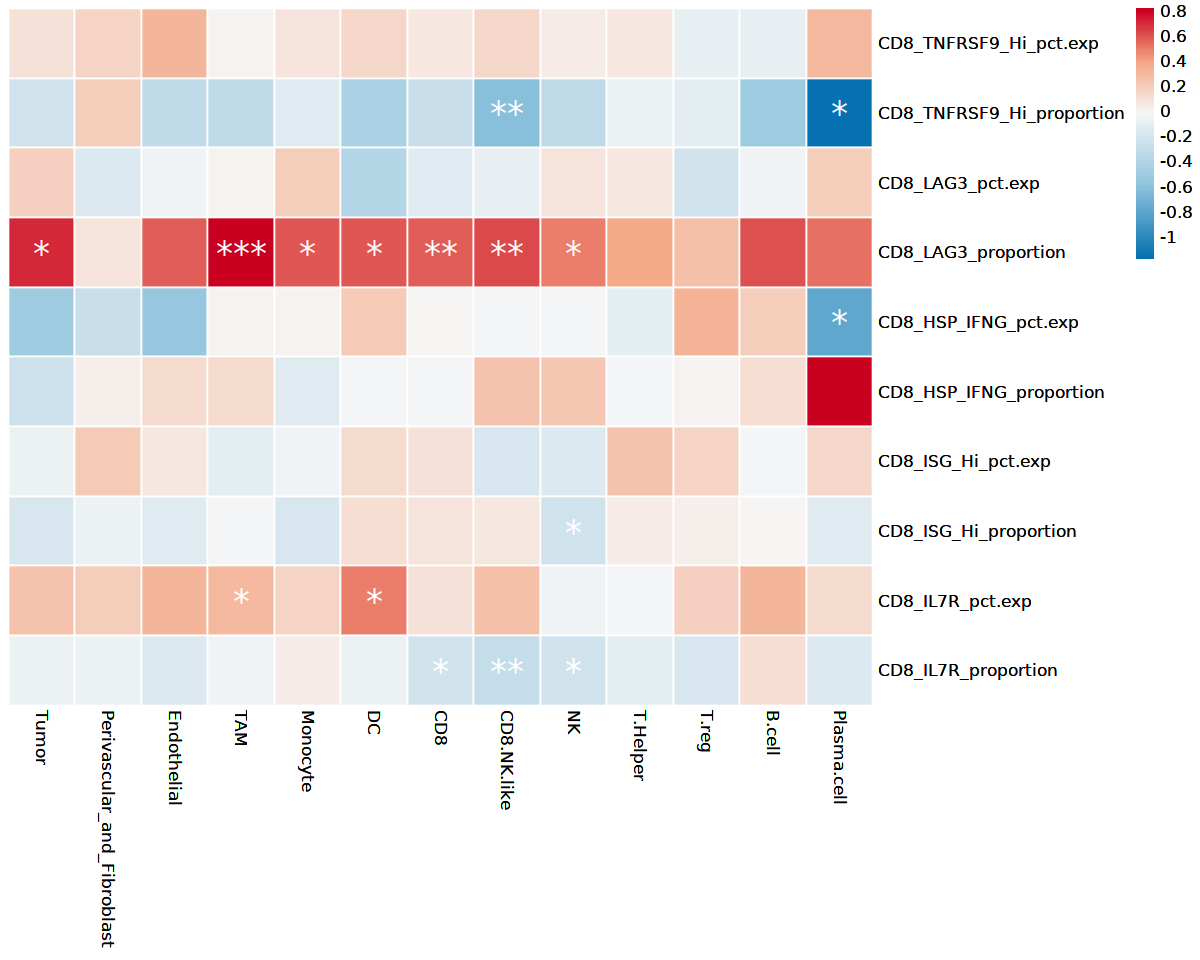

In [56]:

options(repr.plot.width=10, repr.plot.height=8)

test = t(beta_plot[,1:(ncol(beta_plot)-1)])

paletteLength <- 100
myColor <- colorRampPalette(rev(brewer.pal(5, "RdBu")))(paletteLength)
# length(breaks) == length(paletteLength) + 1
# use floor and ceiling to deal with even/odd length pallettelengths
myBreaks <- c(seq(min(test), 0, length.out=ceiling(paletteLength/2) + 1), 
              seq(max(test)/paletteLength, max(test), length.out=floor(paletteLength/2)))

pheat_out = pheatmap(t(beta_plot[,1:(ncol(beta_plot)-1)]),display_numbers = t(pval_plot_label[,1:(ncol(pval_plot_label)-1)]), fontsize_number=20,number_color = "white", border_color = "white",cluster_rows = F,cluster_cols = F,color = myColor, breaks = myBreaks,legend_breaks = c(-1.2,-1,-0.8,-0.6,-0.4, -0.2,0,0.2,0.4,0.6,0.8))
pheat_out


In [57]:
save_pheatmap_pdf(pheat_out, filename = "../Figures/Figure2/Figure2A_CD8_Subsets_Beta_Heatmap_NoIFN1.pdf", width =10, height = 8)


png 
  2

### Plot showing beta coefficients of IFN1 CytoSig Score

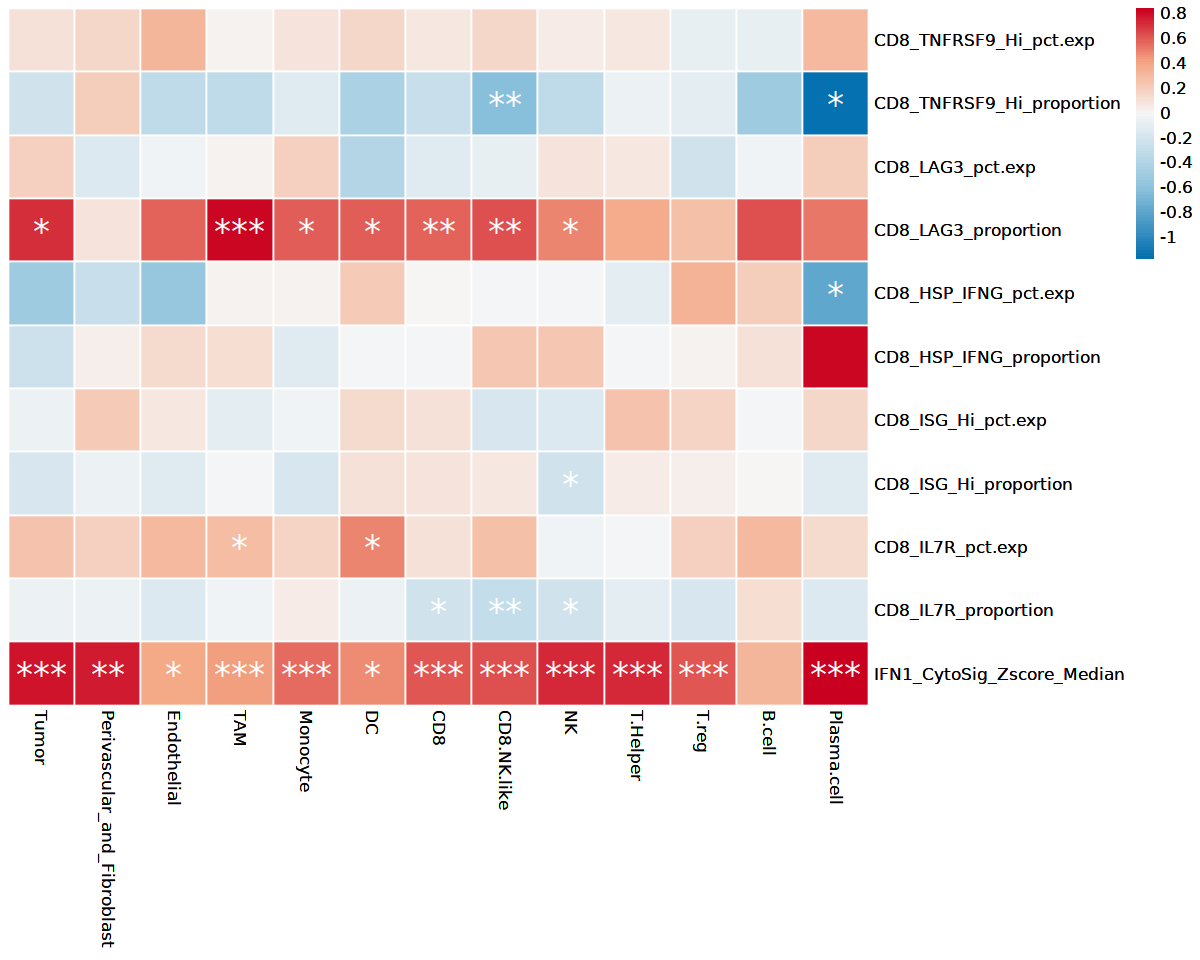

In [58]:
options(repr.plot.width=10, repr.plot.height=8)

test = t(beta_plot[,1:(ncol(beta_plot))])

paletteLength <- 100
myColor <- colorRampPalette(rev(brewer.pal(5, "RdBu")))(paletteLength)
# length(breaks) == length(paletteLength) + 1
# use floor and ceiling to deal with even/odd length pallettelengths
myBreaks <- c(seq(min(test), 0, length.out=ceiling(paletteLength/2) + 1), 
              seq(max(test)/paletteLength, max(test), length.out=floor(paletteLength/2)))

pheat_out = pheatmap(t(beta_plot[,1:(ncol(beta_plot))]),display_numbers = t(pval_plot_label[,1:(ncol(pval_plot_label))]), fontsize_number=20,number_color = "white", border_color = "white",cluster_rows = F,cluster_cols = F,color = myColor, breaks = myBreaks,legend_breaks = c(-1.2,-1,-0.8,-0.6,-0.4, -0.2,0,0.2,0.4,0.6,0.8))
pheat_out

In [59]:
save_pheatmap_pdf(pheat_out, filename = "../Figures/Figure2/Figure2A_CD8_Subsets_Beta_Heatmap_WithIFN1.pdf", width =10, height = 8)


png 
  2

### Figure 2B. Scatterplot showing correlation between CD8_LAG3 proportion and IFNG response within TAM <a name="2"></a>

In [60]:
plot_df_list_sub = plot_df_list[["TAM"]]
plot_df_list_sub = subset(plot_df_list_sub, !(is.na(CD8_LAG3_proportion)))
plot_df_list_sub = subset(plot_df_list_sub, !(is.na(IFNG_CytoSig_Zscore_Median)))
plot_df_list_sub = subset(plot_df_list_sub, !(is.na(IFN1_CytoSig_Zscore_Median)))
    lmres = lm(scale(IFNG_CytoSig_Zscore_Median) ~ scale(CD8_TNFRSF9_Hi_pct.exp) + scale(CD8_TNFRSF9_Hi_proportion) + scale(CD8_LAG3_pct.exp) + scale(CD8_LAG3_proportion) + scale(CD8_HSP_IFNG_pct.exp) + scale(CD8_HSP_IFNG_proportion) + scale(CD8_IL7R_pct.exp) + scale(CD8_IL7R_proportion) + scale(CD8_ISG_Hi_pct.exp) + scale(CD8_ISG_Hi_proportion) + scale(IFN1_CytoSig_Zscore_Median), data = plot_df_list_sub)
summary(lmres)
vif(lmres)


Call:
lm(formula = scale(IFNG_CytoSig_Zscore_Median) ~ scale(CD8_TNFRSF9_Hi_pct.exp) + 
    scale(CD8_TNFRSF9_Hi_proportion) + scale(CD8_LAG3_pct.exp) + 
    scale(CD8_LAG3_proportion) + scale(CD8_HSP_IFNG_pct.exp) + 
    scale(CD8_HSP_IFNG_proportion) + scale(CD8_IL7R_pct.exp) + 
    scale(CD8_IL7R_proportion) + scale(CD8_ISG_Hi_pct.exp) + 
    scale(CD8_ISG_Hi_proportion) + scale(IFN1_CytoSig_Zscore_Median), 
    data = plot_df_list_sub)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.75747 -0.25736  0.06037  0.23423  0.68344 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -0.0006248  0.0630376  -0.010   0.9922    
scale(CD8_TNFRSF9_Hi_pct.exp)      0.0161199  0.1174396   0.137   0.8919    
scale(CD8_TNFRSF9_Hi_proportion)  -0.3210083  0.1670479  -1.922   0.0657 .  
scale(CD8_LAG3_pct.exp)            0.0236892  0.1180068   0.201   0.8425    
scale(CD8_LAG3_proportion)         0.8180132  0.148

scale(CD8_TNFRSF9_Hi_pct.exp)  scale(CD8_TNFRSF9_Hi_proportion) 
                         3.589488                          7.257095 
          scale(CD8_LAG3_pct.exp)        scale(CD8_LAG3_proportion) 
                         3.518216                          5.760391 
      scale(CD8_HSP_IFNG_pct.exp)    scale(CD8_HSP_IFNG_proportion) 
                         4.253643                          2.938062 
          scale(CD8_IL7R_pct.exp)        scale(CD8_IL7R_proportion) 
                         3.184457                          1.280487 
        scale(CD8_ISG_Hi_pct.exp)      scale(CD8_ISG_Hi_proportion) 
                         2.380643                          1.774007 
scale(IFN1_CytoSig_Zscore_Median) 
                         1.846495

In [62]:
head(plot_df_list_sub)

BBK_Broad_Celltype_DE Sample                  Patient Biopsy    
1 TAM                   5pool1_2                S1      Kidney    
2 TAM                   Bi_0600855_T3           P55     Abdomen   
3 TAM                   Bi_0600906_T1           P906    Lymph_node
4 TAM                   Bi_0600912_T1           P912    Lymph_node
5 TAM                   Bi_0600913_T1           P913    Lung      
6 TAM                   Bi_0600915_T1_TrueTumor P915    Kidney    
  Stage_Corrected IO_Treated IO IFNG_CytoSig_Zscore_Median
1 I               IO Naive   No -0.7991684                
2 IV              IO Exposed PR  2.9581399                
3 IV              IO Exposed PD -2.7970171                
4 IV              IO Exposed NE -0.3996263                
5 IV              IO Exposed SD -2.1580606                
6 III             IO Exposed PR  3.3128572                
  IFN1_CytoSig_Zscore_Median CD8_Cycling_1_avg.exp ... CD8_Cycling_4_avg.exp
1 -0.5565771                 2.392355              ...       NA             
2  0.8621697                 2.958890              ... 4.352674             
3 -2.9280281                 0.000000              ...       NA             
4 -0.1039609                 0.000000              ...       NA             
5 -2.4485741                 7.598143              ...       NA             
6  0.4860226                 3.168948              ... 4.537443             
  CD8_Cycling_4_pct.exp CD8_Cycling_4_proportion CD8_Cycling_4_coi
1       NA                       NA              NA               
2 62.50000              0.002038736               8               
3       NA                       NA              NA               
4       NA                       NA              NA               
5       NA                       NA              NA               
6 57.14286              0.001222494               7               
  CD8_Cycling_4_totalcells CD8_TRBV3-1_avg.exp CD8_TRBV3-1_pct.exp
1   NA                     NA                  NA                 
2 3924                     NA                  NA                 
3   NA                     NA                  NA                 
4   NA                     NA                  NA                 
5   NA                     NA                  NA                 
6 5726                     NA                  NA                 
  CD8_TRBV3-1_proportion CD8_TRBV3-1_coi CD8_TRBV3-1_totalcells
1 NA                     NA              NA                    
2 NA                     NA              NA                    
3 NA                     NA              NA                    
4 NA                     NA              NA                    
5 NA                     NA              NA                    
6 NA                     NA              NA

In [63]:
plot_df_list_sub$Sample

[1] 5pool1_2                         Bi_0600855_T3                   
 [3] Bi_0600906_T1                    Bi_0600912_T1                   
 [5] Bi_0600913_T1                    Bi_0600915_T1_TrueTumor         
 [7] Bi_0600916_T1                    Bi_DFCI_0600876_T1              
 [9] Bi_DFCI_0600890_T1               IpiNivo_CompleteResponse_Center 
[11] IpiNivo_CompleteResponse_Lateral IpiNivo_CompleteResponse_Medial 
[13] IpiNivo_Mixed_Center             IpiNivo_Mixed_Far               
[15] IpiNivo_Mixed_Near               IpiNivo_Resistant_Center        
[17] IpiNivo_Resistant_Far            IpiNivo_Resistant_Near          
[19] NivoExposed_LowerLateral         NivoExposed_LowerMedial         
[21] NivoExposed_SupraLateral         Pool70-10                       
[23] Pool70-6                         Pool70-8                        
[25] Pool71-3                         Pool71-5                        
[27] Pool71-6                         Pool71-8                        
[29] Pool72-2                         Pool72-4                        
[31] Pool73-3                         Pool73-4                        
[33] Pool73-5                         Pool73-6                        
[35] UT1_Center                       UT1_Lower                       
[37] UT1_Upper                        UT2_Center                      
[39] UT2_Far                          UT2_Near                        
42 Levels: 5pool1_2 Bi_0600855_T3 Bi_0600906_T1 Bi_0600912_T1 ... Pool72-10

In [64]:
dim(plot_df_list_sub)

[1] 40 79

In [65]:
plot_df_list_sub$CD8_LAG3_proportion

[1] 0.016073957 0.177879715 0.001869159 0.018779343 0.020940485 0.134474328
 [7] 0.101769912 0.039088519 0.020604183 0.005347594 0.017837954 0.019874477
[13] 0.236687966 0.233764602 0.219406424 0.032871164 0.018819734 0.019886882
[19] 0.079694504 0.190709046 0.123228281 0.310047175 0.096952909 0.249741468
[25] 0.053354298 0.171394086 0.067460317 0.096334046 0.005540974 0.094682231
[31] 0.006056411 0.118440870 0.182855864 0.052086602 0.086059480 0.033443241
[37] 0.053981828 0.027825342 0.011540681 0.118601748

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



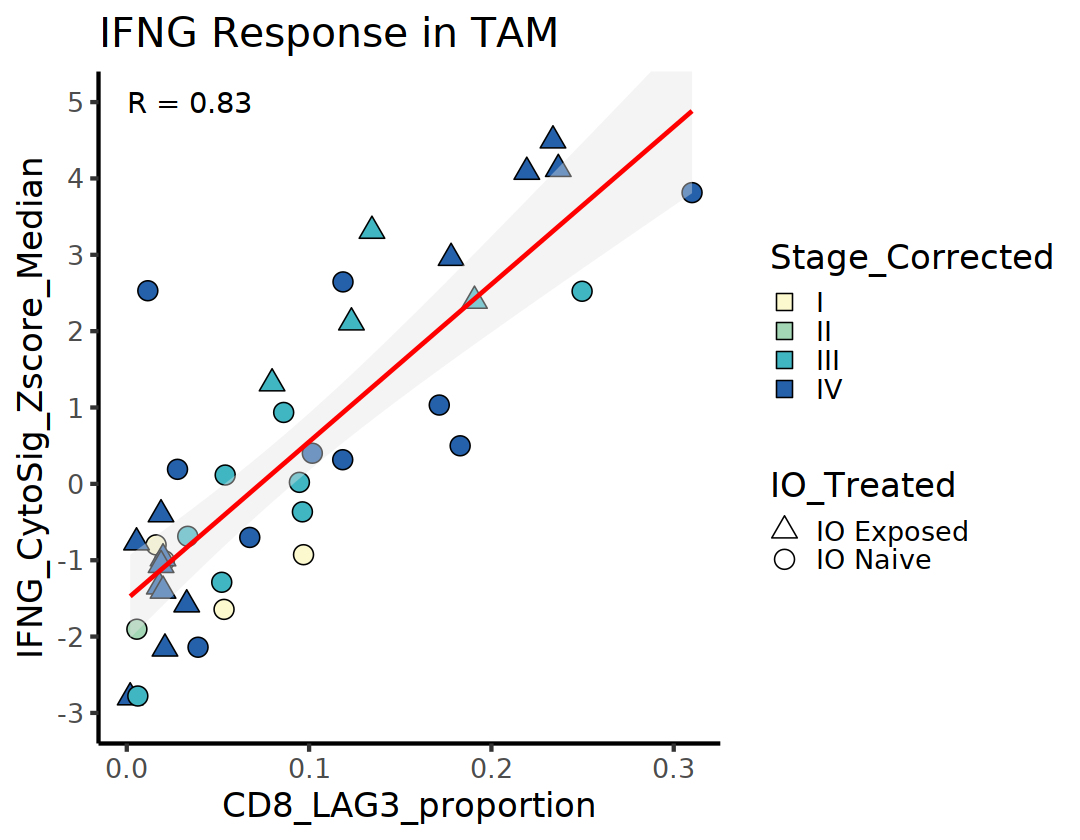

In [66]:
options(repr.plot.width=9, repr.plot.height=7)
ggplot(plot_df_list_sub, aes(x=`CD8_LAG3_proportion`, y=IFNG_CytoSig_Zscore_Median)) + 
  geom_point(size = 5, aes(fill = Stage_Corrected, shape = IO_Treated))+
 theme_classic(base_size = 20) +
scale_shape_manual(values = c(24,21)) +
scale_fill_manual(values = c("#FCF9CF","#A3D6B4","#41B6C3","#2560AA")) +
  geom_smooth(method=lm,se = T, color = "red",fill = "grey90") + coord_cartesian(ylim = c(-3, 5))  +
scale_y_continuous(breaks=seq(-3,5,by = 1)) +
stat_cor(method = "pearson", aes(label = ..r.label..),label.x = 0, label.y =5,size = 6) + labs(title="IFNG Response in TAM") +
 guides(fill=guide_legend(override.aes=list(shape=22)))

ggsave("../Figures/Figure2/Figure2B_TAM_IFNG_vs_CD8_LAG3_Scatter.pdf",width = 9,height = 7)

### Labeled version indicating sample

`geom_smooth()` using formula 'y ~ x'

Warning message:
"ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


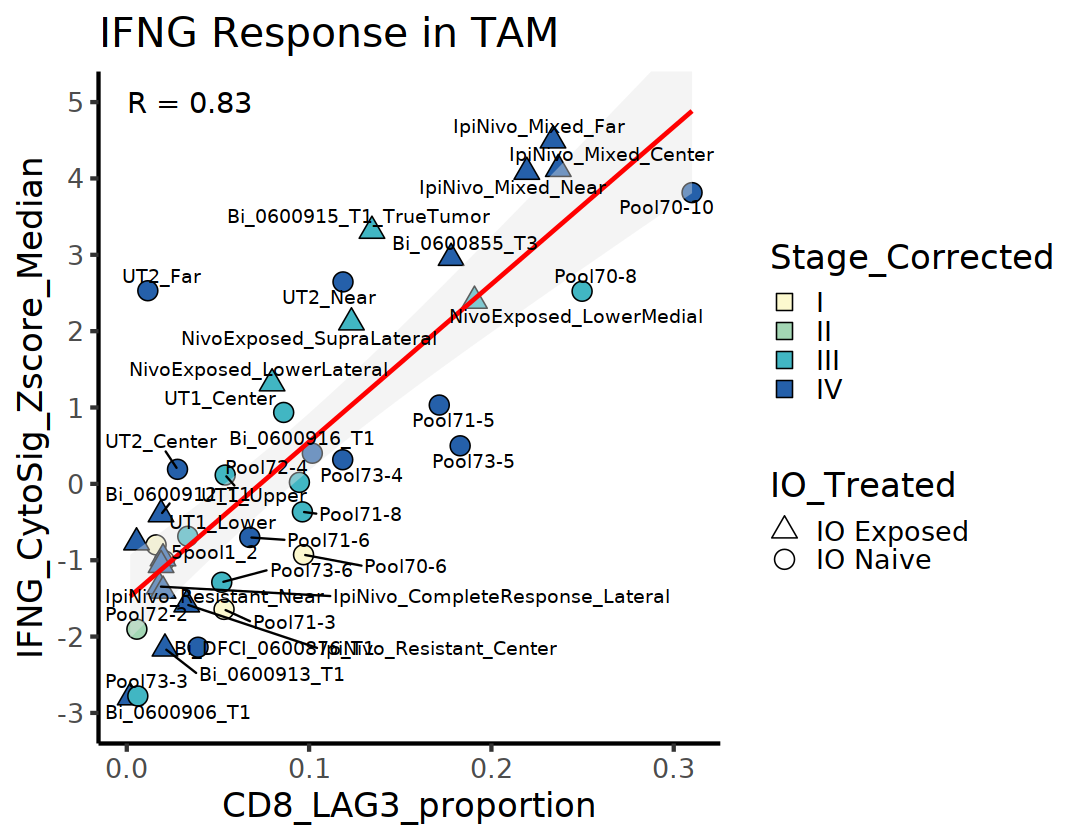

In [67]:
options(repr.plot.width=9, repr.plot.height=7)
ggplot(plot_df_list_sub, aes(x=`CD8_LAG3_proportion`, y=IFNG_CytoSig_Zscore_Median, label = Sample)) + 
  geom_point(size = 5, aes(fill = Stage_Corrected, shape = IO_Treated))+
 theme_classic(base_size = 20) +
scale_shape_manual(values = c(24,21)) +
scale_fill_manual(values = c("#FCF9CF","#A3D6B4","#41B6C3","#2560AA")) +
  geom_smooth(method=lm,se = T, color = "red",fill = "grey90") + coord_cartesian(ylim = c(-3, 5))  +
scale_y_continuous(breaks=seq(-3,5,by = 1)) +
stat_cor(method = "pearson", aes(label = ..r.label..),label.x = 0, label.y =5,size = 6) + labs(title="IFNG Response in TAM") +
 guides(fill=guide_legend(override.aes=list(shape=22))) + geom_text_repel()

### Figure 2C. Galaxy plots showing TAM subset density in samples that are low/high for CD8 LAG3 <a name="3"></a>

### First, we inspect the distribution of CD8 LAG3 proportion across samples

In [45]:
table(seur_full$IO_Treated)

IO_Exposed = unique(subset(seur_full@meta.data, IO_Treated == "IO Exposed")$Sample)
IO_Naive = unique(subset(seur_full@meta.data, IO_Treated == "IO Naive")$Sample)

IO_Exposed
IO_Naive


IO Exposed   IO Naive 
     84990     143381 

[1] "Bi_0600855_T3"                    "Bi_0600906_T1"                   
 [3] "Bi_0600913_T1"                    "Bi_0600915_T1_TrueTumor"         
 [5] "IpiNivo_Mixed_Center"             "IpiNivo_Mixed_Far"               
 [7] "IpiNivo_Mixed_Near"               "IpiNivo_Resistant_Center"        
 [9] "IpiNivo_Resistant_Far"            "IpiNivo_Resistant_LymphNode"     
[11] "IpiNivo_Resistant_Near"           "NivoExposed_LowerLateral"        
[13] "NivoExposed_LowerMedial"          "NivoExposed_SupraLateral"        
[15] "Bi_0600912_T1"                    "IpiNivo_CompleteResponse_Center" 
[17] "IpiNivo_CompleteResponse_Lateral" "IpiNivo_CompleteResponse_Medial"

[1] "5pool1_2"           "Bi_0600916_T1"      "Bi_DFCI_0600876_T1"
 [4] "Bi_DFCI_0600890_T1" "UT1_Center"         "UT1_Upper"         
 [7] "UT2_Center"         "UT2_Far"            "UT2_Near"          
[10] "Pool70-10"          "Pool70-6"           "Pool71-5"          
[13] "Pool71-6"           "Pool72-2"           "Pool72-4"          
[16] "Pool73-3"           "Pool73-4"           "Pool73-5"          
[19] "Pool73-6"           "UT1_Lower"          "Pool70-8"          
[22] "Pool71-3"           "Pool71-8"           "Pool72-10"

In [46]:
Stage_Corrected = seur_full@meta.data[,c("Sample","Stage_Corrected","Stage_Corrected_EarlyLate")]
Stage_Corrected = distinct(Stage_Corrected)
head(Stage_Corrected)
dim(Stage_Corrected)

Sample                 
GTTCTCGAGAGGTAGA-1.5pool1_2                5pool1_2               
AAAGCAAAGTGGTCCC-1.Bi_0600855_T3           Bi_0600855_T3          
CCGGTAGAGATGTCGG-1.Bi_0600906_T1           Bi_0600906_T1          
GACGGCTAGTCCGTAT-1.Bi_0600913_T1           Bi_0600913_T1          
AGCTCCTCAAAGGCGT-1.Bi_0600915_T1_TrueTumor Bi_0600915_T1_TrueTumor
TATTACCTCAACTCTT-1.Bi_0600916_T1           Bi_0600916_T1          
                                           Stage_Corrected
GTTCTCGAGAGGTAGA-1.5pool1_2                I              
AAAGCAAAGTGGTCCC-1.Bi_0600855_T3           IV             
CCGGTAGAGATGTCGG-1.Bi_0600906_T1           IV             
GACGGCTAGTCCGTAT-1.Bi_0600913_T1           IV             
AGCTCCTCAAAGGCGT-1.Bi_0600915_T1_TrueTumor III            
TATTACCTCAACTCTT-1.Bi_0600916_T1           IV             
                                           Stage_Corrected_EarlyLate
GTTCTCGAGAGGTAGA-1.5pool1_2                Early                    
AAAGCAAAGTGGTCCC-1.Bi_0600855_T3           Late                     
CCGGTAGAGATGTCGG-1.Bi_0600906_T1           Late                     
GACGGCTAGTCCGTAT-1.Bi_0600913_T1           Late                     
AGCTCCTCAAAGGCGT-1.Bi_0600915_T1_TrueTumor Late                     
TATTACCTCAACTCTT-1.Bi_0600916_T1           Late

[1] 42  3

### Inspect distribution of CD8 LAG3 subset proportion across samples

In [47]:
sub = subset(seur_full, subset = BBK_Final_Celltype == "CD8_LAG3")

totalsample = data.frame(table(seur_full$Sample))
colnames(totalsample) = c("Sample","totalcells")
head(totalsample)
nrow(totalsample)

coisample = data.frame(table(sub$Sample))
colnames(coisample) = c("Sample","coi")
head(coisample)
nrow(coisample)

CD8_LAG3 = left_join(coisample, totalsample,by = "Sample")

CD8_LAG3$proportion = CD8_LAG3$coi/CD8_LAG3$totalcells
CD8_LAG3$BBK_Broad_Celltype = rep("CD8_LAG3",nrow(CD8_LAG3))

CD8_LAG3 = mutate(CD8_LAG3, IO_Treated = ifelse(Sample %in% IO_Exposed,"IO Exposed",ifelse(Sample %in% IO_Naive,"IO Naive","NAN")))
CD8_LAG3 = left_join(CD8_LAG3, Stage_Corrected, by = "Sample")

head(CD8_LAG3)

Sample                  totalcells
1 5pool1_2                12007     
2 Bi_0600855_T3            3924     
3 Bi_0600906_T1            1605     
4 Bi_0600912_T1             213     
5 Bi_0600913_T1            2722     
6 Bi_0600915_T1_TrueTumor  5726

[1] 42

Sample                  coi
1 5pool1_2                193
2 Bi_0600855_T3           698
3 Bi_0600906_T1             3
4 Bi_0600912_T1             4
5 Bi_0600913_T1            57
6 Bi_0600915_T1_TrueTumor 770

[1] 41

Sample                  coi totalcells proportion  BBK_Broad_Celltype
1 5pool1_2                193 12007      0.016073957 CD8_LAG3          
2 Bi_0600855_T3           698  3924      0.177879715 CD8_LAG3          
3 Bi_0600906_T1             3  1605      0.001869159 CD8_LAG3          
4 Bi_0600912_T1             4   213      0.018779343 CD8_LAG3          
5 Bi_0600913_T1            57  2722      0.020940485 CD8_LAG3          
6 Bi_0600915_T1_TrueTumor 770  5726      0.134474328 CD8_LAG3          
  IO_Treated Stage_Corrected Stage_Corrected_EarlyLate
1 IO Naive   I               Early                    
2 IO Exposed IV              Late                     
3 IO Exposed IV              Late                     
4 IO Exposed IV              Late                     
5 IO Exposed IV              Late                     
6 IO Exposed III             Late

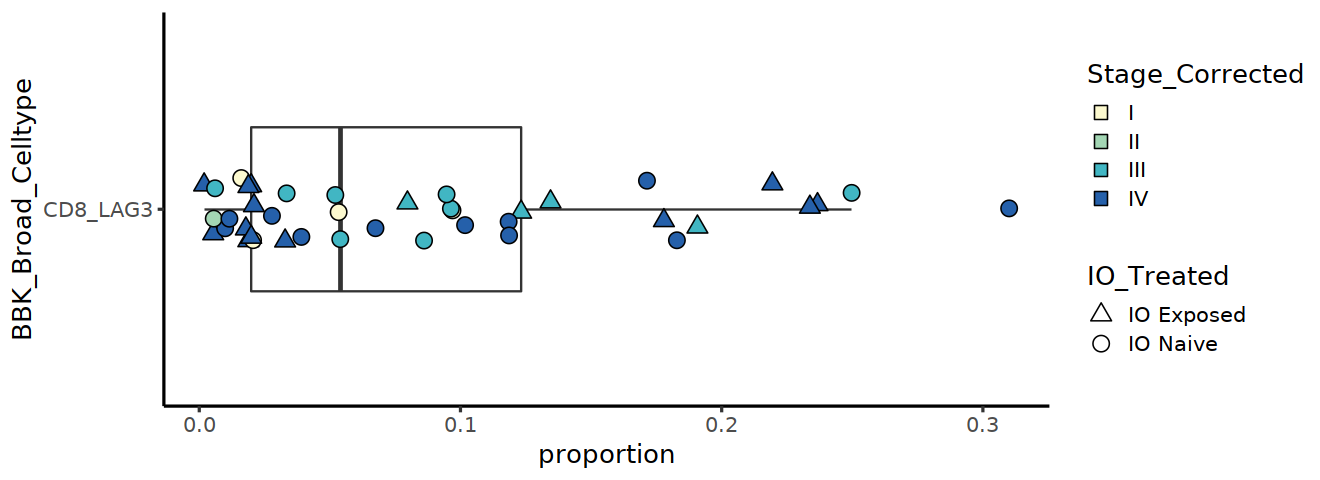

In [48]:
options(repr.plot.width=11, repr.plot.height=4)

ggplot(CD8_LAG3, aes(y = BBK_Broad_Celltype, x = proportion)) +
# stat_density_ridges(quantile_lines = TRUE, alpha = 1,
#                      quantiles = 4,color = "black") +
  geom_boxplot(outlier.shape = NA,width = 0.5) + 
scale_shape_manual(values = c(24,21)) +
scale_fill_manual(values = c("#FCF9CF","#A3D6B4","#41B6C3","#2560AA")) +
geom_jitter(aes(fill = Stage_Corrected, shape = IO_Treated),height = 0.1,size = 4) + 
theme_classic(base_size = 15) +
 guides(fill=guide_legend(override.aes=list(shape=22)))

### Stage is more of a confounder than IO exposure status. For the subsequent analysis, we will remove Stage I and II samples.

In [49]:
CD8_LAG3_IO_LateStage_Corrected = subset(CD8_LAG3,Stage_Corrected %in% c("III","IV"))
CD8_LAG3_IO_LateStage_Corrected$CD8_LAG3_HiLow_ntile = ntile(CD8_LAG3_IO_LateStage_Corrected$proportion,n = 2)
CD8_LAG3_IO_LateStage_Corrected = mutate(CD8_LAG3_IO_LateStage_Corrected, CD8_LAG3_HiLow_Group = ifelse(CD8_LAG3_HiLow_ntile == 1,"Low","High"))
head(CD8_LAG3_IO_LateStage_Corrected)

Sample                  coi totalcells proportion  BBK_Broad_Celltype
2 Bi_0600855_T3           698 3924       0.177879715 CD8_LAG3          
3 Bi_0600906_T1             3 1605       0.001869159 CD8_LAG3          
4 Bi_0600912_T1             4  213       0.018779343 CD8_LAG3          
5 Bi_0600913_T1            57 2722       0.020940485 CD8_LAG3          
6 Bi_0600915_T1_TrueTumor 770 5726       0.134474328 CD8_LAG3          
7 Bi_0600916_T1            23  226       0.101769912 CD8_LAG3          
  IO_Treated Stage_Corrected Stage_Corrected_EarlyLate CD8_LAG3_HiLow_ntile
2 IO Exposed IV              Late                      2                   
3 IO Exposed IV              Late                      1                   
4 IO Exposed IV              Late                      1                   
5 IO Exposed IV              Late                      1                   
6 IO Exposed III             Late                      2                   
7 IO Naive   IV              Late                      2                   
  CD8_LAG3_HiLow_Group
2 High                
3 Low                 
4 Low                 
5 Low                 
6 High                
7 High

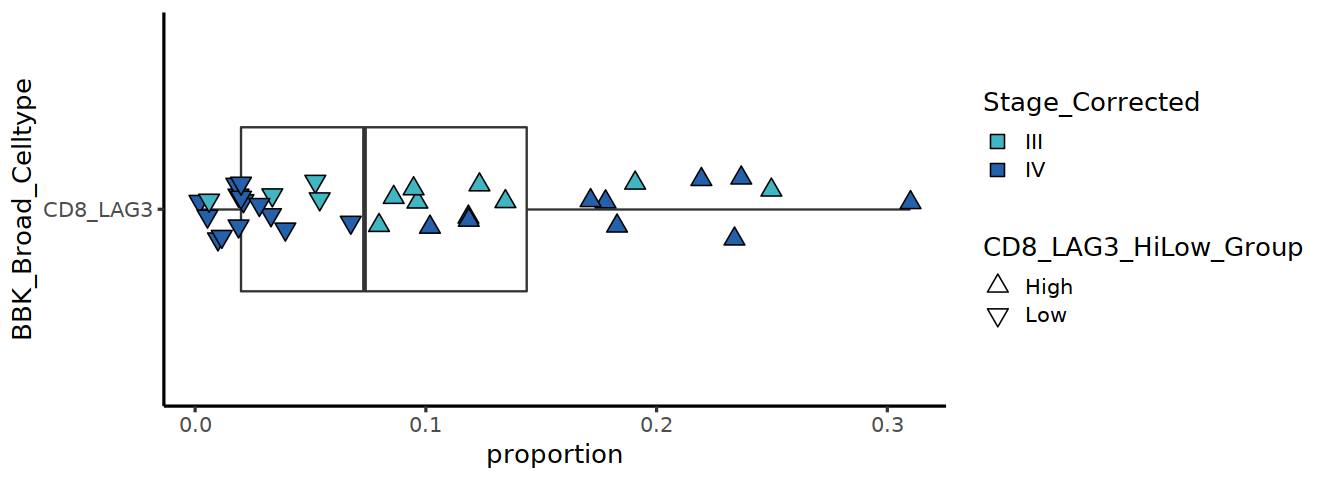

In [50]:
options(repr.plot.width=11, repr.plot.height=4)

ggplot(CD8_LAG3_IO_LateStage_Corrected, aes(y = BBK_Broad_Celltype, x = proportion)) +
# stat_density_ridges(quantile_lines = TRUE, alpha = 1,
#                      quantiles = 4,color = "black") +
  geom_boxplot(outlier.shape = NA,width = 0.5) + 
scale_shape_manual(values = c(24,25)) +
scale_fill_manual(values = c("#41B6C3","#2560AA")) +
geom_jitter(aes(fill = Stage_Corrected, shape = CD8_LAG3_HiLow_Group),height = 0.1,size = 4) + 
theme_classic(base_size = 15) +
 guides(fill=guide_legend(override.aes=list(shape=22)))

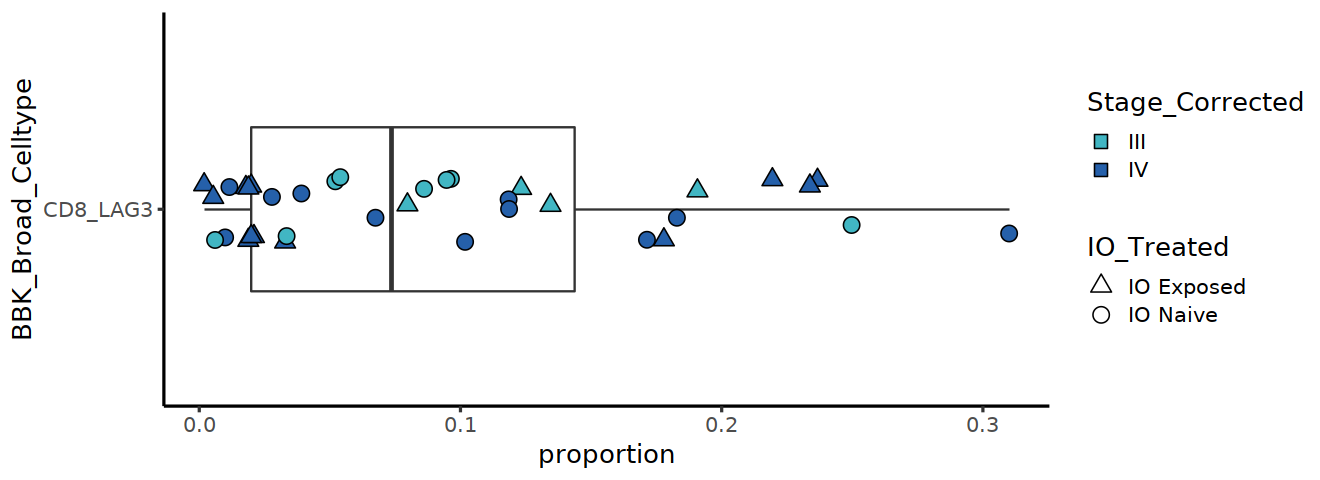

In [51]:
options(repr.plot.width=11, repr.plot.height=4)

ggplot(CD8_LAG3_IO_LateStage_Corrected, aes(y = BBK_Broad_Celltype, x = proportion)) +
# stat_density_ridges(quantile_lines = TRUE, alpha = 1,
#                      quantiles = 4,color = "black") +
  geom_boxplot(outlier.shape = NA,width = 0.5) + 
scale_shape_manual(values = c(24,21)) +
scale_fill_manual(values = c("#41B6C3","#2560AA")) +
geom_jitter(aes(fill = Stage_Corrected, shape = IO_Treated),height = 0.1,size = 4) + 
theme_classic(base_size = 15) +
 guides(fill=guide_legend(override.aes=list(shape=22)))

### Now we create an object containing only non-cycling TAM clusters

In [52]:
table(droplevels(subset(seur_full@meta.data, BBK_Broad_Celltype == "TAM")$BBK_Final_Celltype))


TAM_Cycling_3 TAM_Cycling_2 TAM_Cycling_1      TAM_SPP1        TAM_C3 
          256           397           593          6673          6623 
  TAM_SELENOP      TAM_CCL4    TAM_CXCL10       TAM_HSP 
         5198          4497          2956           491 

In [53]:
TAM_Plot = c("TAM_CXCL10","TAM_C3","TAM_CCL4","TAM_SELENOP","TAM_SPP1","TAM_HSP")


IO Exposed   IO Naive 
     15574      15458 

Centering and scaling data matrix

PC_ 1 
Positive:  RPS10, RPS17, NDUFB8, ATP5PO, RPL23A, CD63, RPS20, NDUFC2, CTSD, BRI3 
	   PSMA2, BLOC1S1, RPL27A, JTB, RPL22, RPL13A, APOC1, NDUFA13, RPL26, LDHB 
	   TMBIM4, CTSZ, C1QB, CSNK2B, APOE, ARPC1B, NENF, TYMP, VAMP5, FTL 
Negative:  FOS, PPP1R15A, MT-ND4L, JUN, DUSP1, FOSB, ZFP36, DNAJB1, NR4A2, KLF6 
	   JUNB, RHOB, KLF4, HSPA1B, HSPA1A, NR4A1, GADD45B, MT-ATP8, NFKBIA, MT-RNR2 
	   IER2, IER3, ATF3, NFKBIZ, CD83, SGK1, HSPH1, CDKN1A, NR4A3, TNFAIP3 
PC_ 2 
Positive:  PLD4, C3, CALHM6, NAPSB, OLFML3, GBP4, HLA-DQB2, CX3CR1, HLA-DQA2, PPA1 
	   ANKRD22, GIMAP7, RARRES3, P2RY13, FCER1A, SCIN, ZFP36L2, GBP5, TNFSF10, SFMBT2 
	   HLA-H, CLEC9A, EBI3, MT-RNR1, GBP2, STAT1, GBP1, SIGLEC10, P2RY12, CCND1 
Negative:  FTL, CTSD, LGALS1, FTH1, GPNMB, CSTB, CTSL, LGALS3, S100A9, CYP27A1 
	   GLUL, FABP5, GCHFR, ACP5, CTSB, LMNA, ANXA2, PLIN2, LGMN, NPL 
	   NUPR1, MGLL, C5AR1, SMIM25, PLAUR, TXN, CD52, PLA2G7, BRI3, VAT1 
PC_ 3 
Positive:  CALHM6,

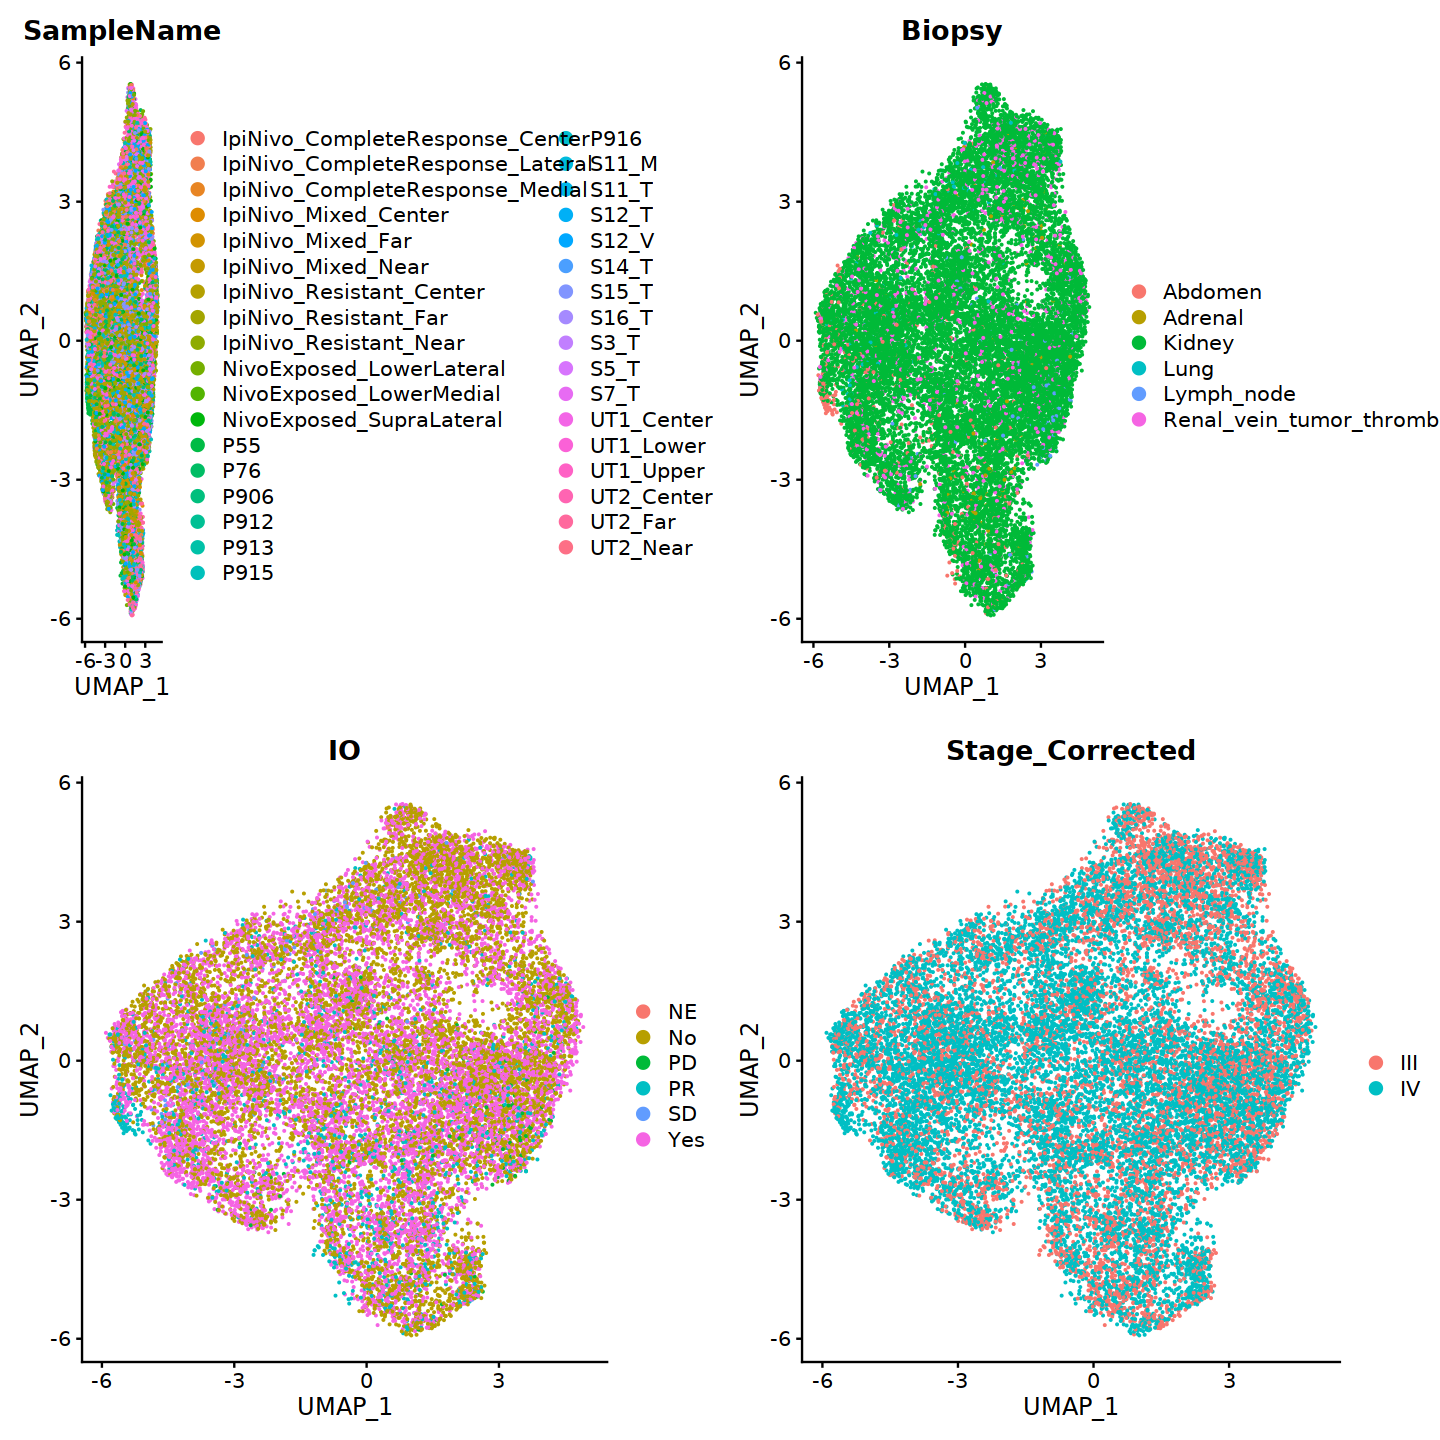

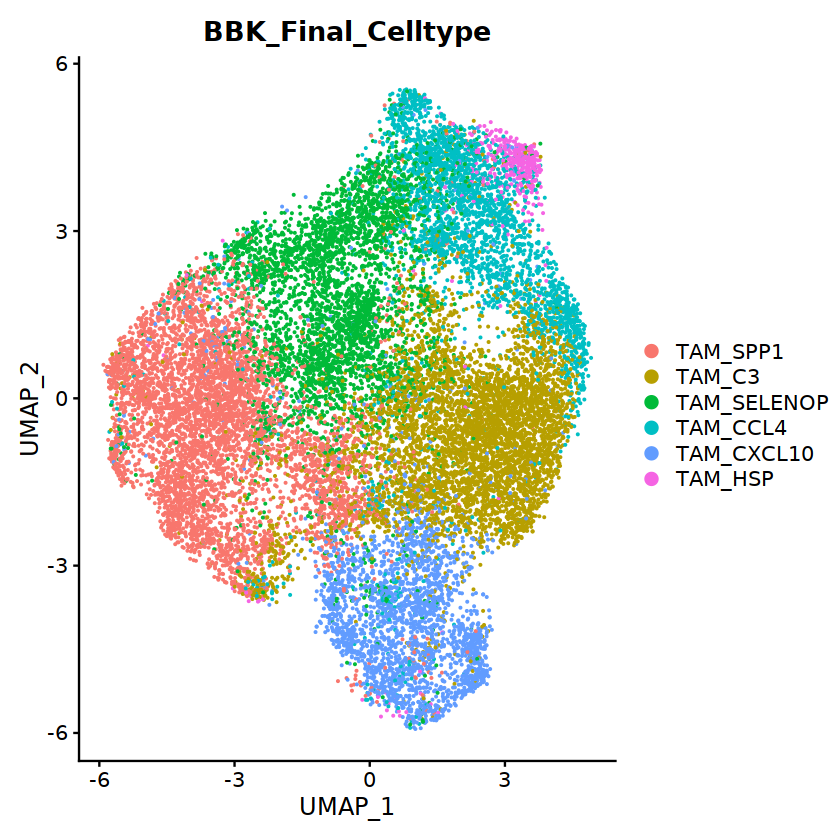

In [66]:
options(repr.plot.width=10, repr.plot.height=8)

seur_monomac = subset(seur_full, subset = BBK_Broad_Celltype %in% c("TAM","Monocyte"))
seur_monomac = subset(seur_monomac, subset = Sample %in% CD8_LAG3_IO_LateStage_Corrected$Sample)

table(seur_monomac$IO_Treated)

#DimPlot(seur_monomac, label = T)

seur_monomac = subset(seur_monomac, subset = BBK_Final_Celltype %in% TAM_Plot)
seur_monomac = NormalizeData(seur_monomac)
seur_monomac = FindVariableFeatures(seur_monomac, selection.method = "vst")
seur_monomac = ScaleData(seur_monomac)
seur_monomac = RunPCA(seur_monomac, npcs = 30,verbose = T)

seur_monomac = RunHarmony(seur_monomac, group.by.vars = c("Cohort","SampleName"))
seur_monomac = RunUMAP(seur_monomac, reduction = "harmony", dims = 1:30)

library(ggpubr)
options(repr.plot.width=12, repr.plot.height=12)
one = DimPlot(seur_monomac, group.by = "SampleName", shuffle = T)
two = DimPlot(seur_monomac, group.by = "Biopsy", shuffle = T)
three = DimPlot(seur_monomac, group.by = "IO", shuffle = T)
four = DimPlot(seur_monomac, group.by = "Stage_Corrected", shuffle = T)
ggarrange(one, two, three, four)

options(repr.plot.width=7, repr.plot.height=7)
DimPlot(seur_monomac, group.by = "BBK_Final_Celltype")

In [67]:
tamcols = piratepal(palette = "appletv")[1:6]
names(tamcols) = c("TAM_SELENOP","TAM_HSP","TAM_C3","TAM_CXCL10","TAM_CCL4","TAM_SPP1")
tamcols

TAM_SELENOP     TAM_HSP      TAM_C3  TAM_CXCL10    TAM_CCL4    TAM_SPP1 
"#5FB233FF" "#6A7F93FF" "#F57206FF" "#EB0F13FF" "#8F2F8BFF" "#1396DBFF"

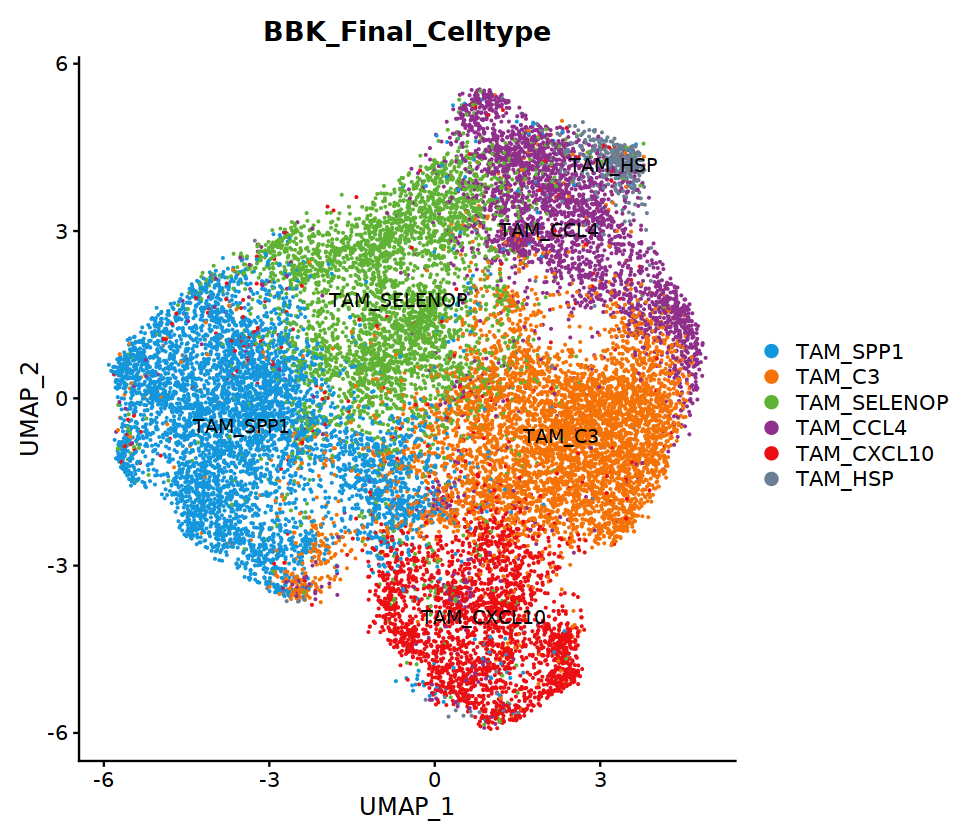

In [68]:
options(repr.plot.width = 8, repr.plot.height=7)

Idents(seur_monomac) = "BBK_Final_Celltype"
DimPlot(seur_monomac, group.by = "BBK_Final_Celltype",label = T,cols = tamcols[levels(Idents(seur_monomac))])

In [69]:
seur_monomac$BBK_Final_Celltype = droplevels(seur_monomac$BBK_Final_Celltype)
table(seur_monomac$BBK_Final_Celltype)


   TAM_SPP1      TAM_C3 TAM_SELENOP    TAM_CCL4  TAM_CXCL10     TAM_HSP 
       5180        5151        3759        2966        2549         390 

In [70]:
seur_monomac_newmeta = left_join(seur_monomac@meta.data, CD8_LAG3_IO_LateStage_Corrected[,c("CD8_LAG3_HiLow_Group","Sample")], by = "Sample")
row.names(seur_monomac_newmeta) = row.names(seur_monomac@meta.data)
head(seur_monomac_newmeta)

seur_monomac$CD8_LAG3_HiLow_Group = seur_monomac_newmeta$CD8_LAG3_HiLow_Group
table(seur_monomac$CD8_LAG3_HiLow_Group)
table(seur_monomac$IO_Treated)

orig.ident    nCount_RNA nFeature_RNA
AGCAGCCTCCATTCTA-1.Bi_0600855_T3 SeuratProject 17814      3408        
GGGTTGCAGTCATGCT-1.Bi_0600855_T3 SeuratProject 17595      3318        
TAGGCATCAATCGAAA-1.Bi_0600855_T3 SeuratProject 16771      3304        
ACGAGGACAGATGGCA-1.Bi_0600855_T3 SeuratProject 16447      3154        
AGGCCGTAGATGCCTT-1.Bi_0600855_T3 SeuratProject 16359      3046        
GTTACAGCATGGTAGG-1.Bi_0600855_T3 SeuratProject 15782      3059        
                                 Sample        cell_id                         
AGCAGCCTCCATTCTA-1.Bi_0600855_T3 Bi_0600855_T3 AGCAGCCTCCATTCTA-1.Bi_0600855_T3
GGGTTGCAGTCATGCT-1.Bi_0600855_T3 Bi_0600855_T3 GGGTTGCAGTCATGCT-1.Bi_0600855_T3
TAGGCATCAATCGAAA-1.Bi_0600855_T3 Bi_0600855_T3 TAGGCATCAATCGAAA-1.Bi_0600855_T3
ACGAGGACAGATGGCA-1.Bi_0600855_T3 Bi_0600855_T3 ACGAGGACAGATGGCA-1.Bi_0600855_T3
AGGCCGTAGATGCCTT-1.Bi_0600855_T3 Bi_0600855_T3 AGGCCGTAGATGCCTT-1.Bi_0600855_T3
GTTACAGCATGGTAGG-1.Bi_0600855_T3 Bi_0600855_T3 GTTACAGCATGGTAGG-1.Bi_0600855_T3
                                 Cohort Chemistry Treated IO TKI ...
AGCAGCCTCCATTCTA-1.Bi_0600855_T3 Bi     3prime    Yes     PR Yes ...
GGGTTGCAGTCATGCT-1.Bi_0600855_T3 Bi     3prime    Yes     PR Yes ...
TAGGCATCAATCGAAA-1.Bi_0600855_T3 Bi     3prime    Yes     PR Yes ...
ACGAGGACAGATGGCA-1.Bi_0600855_T3 Bi     3prime    Yes     PR Yes ...
AGGCCGTAGATGCCTT-1.Bi_0600855_T3 Bi     3prime    Yes     PR Yes ...
GTTACAGCATGGTAGG-1.Bi_0600855_T3 Bi     3prime    Yes     PR Yes ...
                                 NO_CytoSig_Zscore OSM_CytoSig_Zscore
AGCAGCCTCCATTCTA-1.Bi_0600855_T3 -3.637269         -0.3919472        
GGGTTGCAGTCATGCT-1.Bi_0600855_T3 -3.462957          3.4260299        
TAGGCATCAATCGAAA-1.Bi_0600855_T3 -3.611194          1.9701055        
ACGAGGACAGATGGCA-1.Bi_0600855_T3 -3.740075          2.8943046        
AGGCCGTAGATGCCTT-1.Bi_0600855_T3 -3.661189          2.4400772        
GTTACAGCATGGTAGG-1.Bi_0600855_T3 -3.818073         -1.4332679        
                                 TGFB1_CytoSig_Zscore TGFB3_CytoSig_Zscore
AGCAGCCTCCATTCTA-1.Bi_0600855_T3 -2.74944870          -4.583103           
GGGTTGCAGTCATGCT-1.Bi_0600855_T3  0.01517565          -5.669123           
TAGGCATCAATCGAAA-1.Bi_0600855_T3 -1.90812678          -4.939029           
ACGAGGACAGATGGCA-1.Bi_0600855_T3 -2.53371764          -5.150032           
AGGCCGTAGATGCCTT-1.Bi_0600855_T3 -1.66100516          -5.817036           
GTTACAGCATGGTAGG-1.Bi_0600855_T3 -1.35988979          -1.823704           
                                 TNFA_CytoSig_Zscore TRAIL_CytoSig_Zscore
AGCAGCCTCCATTCTA-1.Bi_0600855_T3  0.78467670         -3.857347           
GGGTTGCAGTCATGCT-1.Bi_0600855_T3  0.08529095         -4.123908           
TAGGCATCAATCGAAA-1.Bi_0600855_T3 -3.25871993         -2.181814           
ACGAGGACAGATGGCA-1.Bi_0600855_T3 -3.08009523         -3.256149           
AGGCCGTAGATGCCTT-1.Bi_0600855_T3 -0.81641685         -4.332318           
GTTACAGCATGGTAGG-1.Bi_0600855_T3 -1.64636211         -3.302608           
                                 TWEAK_CytoSig_Zscore VEGFA_CytoSig_Zscore
AGCAGCCTCCATTCTA-1.Bi_0600855_T3  2.1836660           -3.603122           
GGGTTGCAGTCATGCT-1.Bi_0600855_T3  2.1948688           -3.986249           
TAGGCATCAATCGAAA-1.Bi_0600855_T3  0.2454588           -2.220338           
ACGAGGACAGATGGCA-1.Bi_0600855_T3  0.0987047           -2.492007           
AGGCCGTAGATGCCTT-1.Bi_0600855_T3  0.9262035           -4.272005           
GTTACAGCATGGTAGG-1.Bi_0600855_T3 -0.5417299           -3.458718           
                                 WNT3A_CytoSig_Zscore CD8_LAG3_HiLow_Group
AGCAGCCTCCATTCTA-1.Bi_0600855_T3 -0.4000039           High                
GGGTTGCAGTCATGCT-1.Bi_0600855_T3 -1.2164713           High                
TAGGCATCAATCGAAA-1.Bi_0600855_T3  0.1782807           High                
ACGAGGACAGATGGCA-1.Bi_0600855_T3  0.5674833           High                
AGGCCGTAGATGCCTT-1.Bi_0600855_T3 -0.5530665           High  


 High   Low 
 7437 12558 


IO Exposed   IO Naive 
     11320       8675 

UMAP_1     UMAP_2    CellType  
AGCAGCCTCCATTCTA-1.Bi_0600855_T3 -0.8176037 -3.783612 TAM_CXCL10
GGGTTGCAGTCATGCT-1.Bi_0600855_T3 -0.3120828 -4.967167 TAM_SPP1  
TAGGCATCAATCGAAA-1.Bi_0600855_T3 -0.1250246 -1.232131 TAM_SPP1  
ACGAGGACAGATGGCA-1.Bi_0600855_T3 -0.1519798 -1.610456 TAM_SPP1  
AGGCCGTAGATGCCTT-1.Bi_0600855_T3 -0.4009993 -3.955696 TAM_CXCL10
                                 CD8_LAG3_HiLow_Group
AGCAGCCTCCATTCTA-1.Bi_0600855_T3 High                
GGGTTGCAGTCATGCT-1.Bi_0600855_T3 High                
TAGGCATCAATCGAAA-1.Bi_0600855_T3 High                
ACGAGGACAGATGGCA-1.Bi_0600855_T3 High                
AGGCCGTAGATGCCTT-1.Bi_0600855_T3 High                
                                 barcode                         
AGCAGCCTCCATTCTA-1.Bi_0600855_T3 AGCAGCCTCCATTCTA-1.Bi_0600855_T3
GGGTTGCAGTCATGCT-1.Bi_0600855_T3 GGGTTGCAGTCATGCT-1.Bi_0600855_T3
TAGGCATCAATCGAAA-1.Bi_0600855_T3 TAGGCATCAATCGAAA-1.Bi_0600855_T3
ACGAGGACAGATGGCA-1.Bi_0600855_T3 ACGAGGACAGATGGCA-1.Bi_0600855_T3
AGGCCGTAGATGCCTT-1.Bi_0600855_T3 AGGCCGTAGATGCCTT-1.Bi_0600855_T3

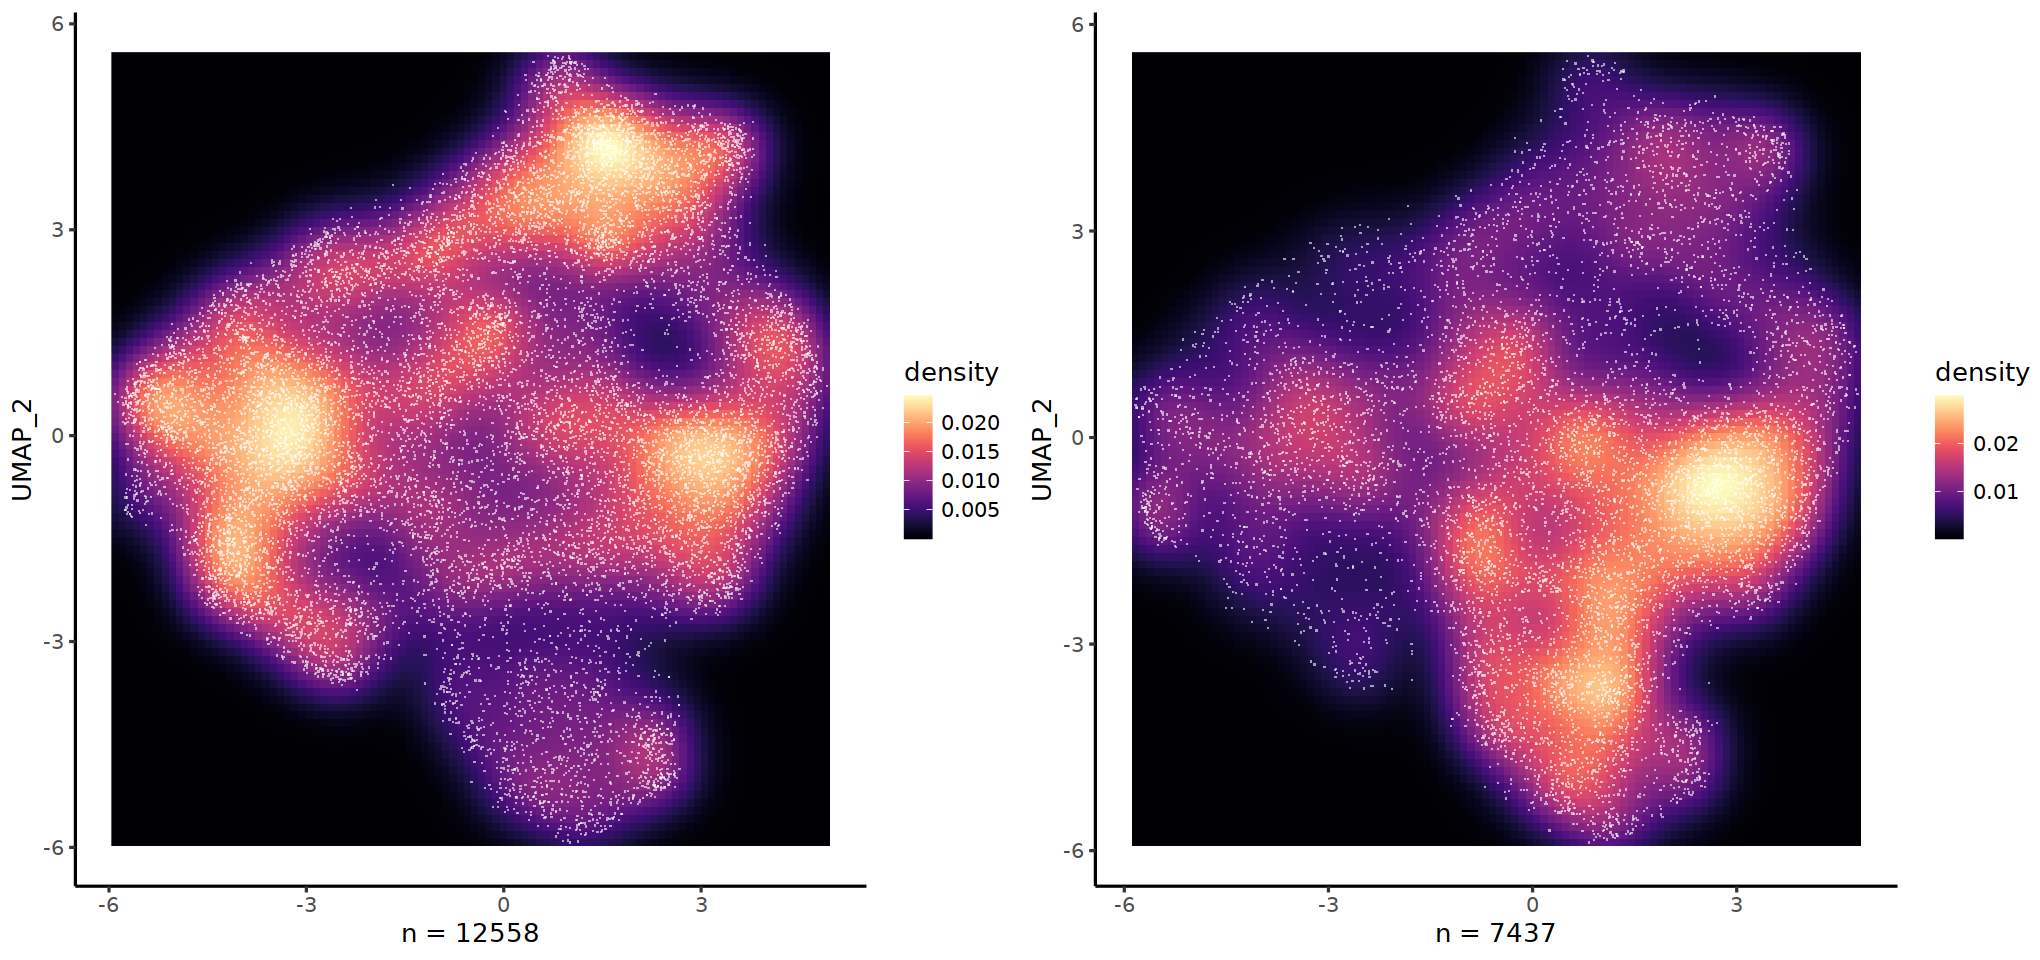

In [73]:
df = data.frame(seur_monomac@reductions$umap@cell.embeddings)
df$CellType = seur_monomac$BBK_Final_Celltype
df$CD8_LAG3_HiLow_Group = seur_monomac$CD8_LAG3_HiLow_Group
df$barcode = row.names(df)
corner(df)

UMAP_1 = df$UMAP_1
UMAP_2 = df$UMAP_2

one = ggplot(subset(df,CD8_LAG3_HiLow_Group == "Low"), aes(UMAP_1, UMAP_2)) +
stat_density_2d(aes(fill = ..density..), geom = 'raster', contour = FALSE) +
scale_fill_viridis(option = "magma") +
#coord_cartesian(expand = FALSE, xlim = c(min(UMAP_1), max(UMAP_1)),ylim = c(min(UMAP_2),max(UMAP_2))) +
#xlim(c(min(UMAP_1)-1, max(UMAP_1)+1)) +
#ylim(c(min(UMAP_2)-1, max(UMAP_2)+1)) +
geom_point(shape = ".",col = "white", alpha = 0.6) +
 xlab(paste("n = ",nrow(subset(df,CD8_LAG3_HiLow_Group == "Low")),sep = "")) +
theme_classic(base_size = 15)


UMAP_1 = df$UMAP_1
UMAP_2 = df$UMAP_2

two = ggplot(subset(df,CD8_LAG3_HiLow_Group == "High"), aes(UMAP_1, UMAP_2)) +
stat_density_2d(aes(fill = ..density..), geom = 'raster', contour = FALSE) +
scale_fill_viridis(option = "magma") +
#coord_cartesian(expand = FALSE, xlim = c(min(UMAP_1), max(UMAP_1)),ylim = c(min(UMAP_2),max(UMAP_2))) +
#xlim(c(min(UMAP_1)-1, max(UMAP_1)+1)) +
#ylim(c(min(UMAP_2)-1, max(UMAP_2)+1)) +
geom_point(shape = ".",col = "white", alpha = 0.6) + 
xlab(paste("n = ",nrow(subset(df,CD8_LAG3_HiLow_Group == "High")),sep = "")) +
theme_classic(base_size = 15)

options(repr.plot.width=17, repr.plot.height=8)
ggarrange(one, two)

ggsave("../Figures/Figure2/Figure2C_TAM_Galaxies.pdf", width = 17, height = 8)

UMAP_1     UMAP_2    CellType  
AGCAGCCTCCATTCTA-1.Bi_0600855_T3 -0.8176037 -3.783612 TAM_CXCL10
GGGTTGCAGTCATGCT-1.Bi_0600855_T3 -0.3120828 -4.967167 TAM_SPP1  
TAGGCATCAATCGAAA-1.Bi_0600855_T3 -0.1250246 -1.232131 TAM_SPP1  
ACGAGGACAGATGGCA-1.Bi_0600855_T3 -0.1519798 -1.610456 TAM_SPP1  
AGGCCGTAGATGCCTT-1.Bi_0600855_T3 -0.4009993 -3.955696 TAM_CXCL10
                                 CD8_LAG3_HiLow_Group
AGCAGCCTCCATTCTA-1.Bi_0600855_T3 High                
GGGTTGCAGTCATGCT-1.Bi_0600855_T3 High                
TAGGCATCAATCGAAA-1.Bi_0600855_T3 High                
ACGAGGACAGATGGCA-1.Bi_0600855_T3 High                
AGGCCGTAGATGCCTT-1.Bi_0600855_T3 High                
                                 barcode                         
AGCAGCCTCCATTCTA-1.Bi_0600855_T3 AGCAGCCTCCATTCTA-1.Bi_0600855_T3
GGGTTGCAGTCATGCT-1.Bi_0600855_T3 GGGTTGCAGTCATGCT-1.Bi_0600855_T3
TAGGCATCAATCGAAA-1.Bi_0600855_T3 TAGGCATCAATCGAAA-1.Bi_0600855_T3
ACGAGGACAGATGGCA-1.Bi_0600855_T3 ACGAGGACAGATGGCA-1.Bi_0600855_T3
AGGCCGTAGATGCCTT-1.Bi_0600855_T3 AGGCCGTAGATGCCTT-1.Bi_0600855_T3

Warning message:
"Removed 396 rows containing missing values (geom_raster)."
Warning message:
"Removed 396 rows containing missing values (geom_raster)."


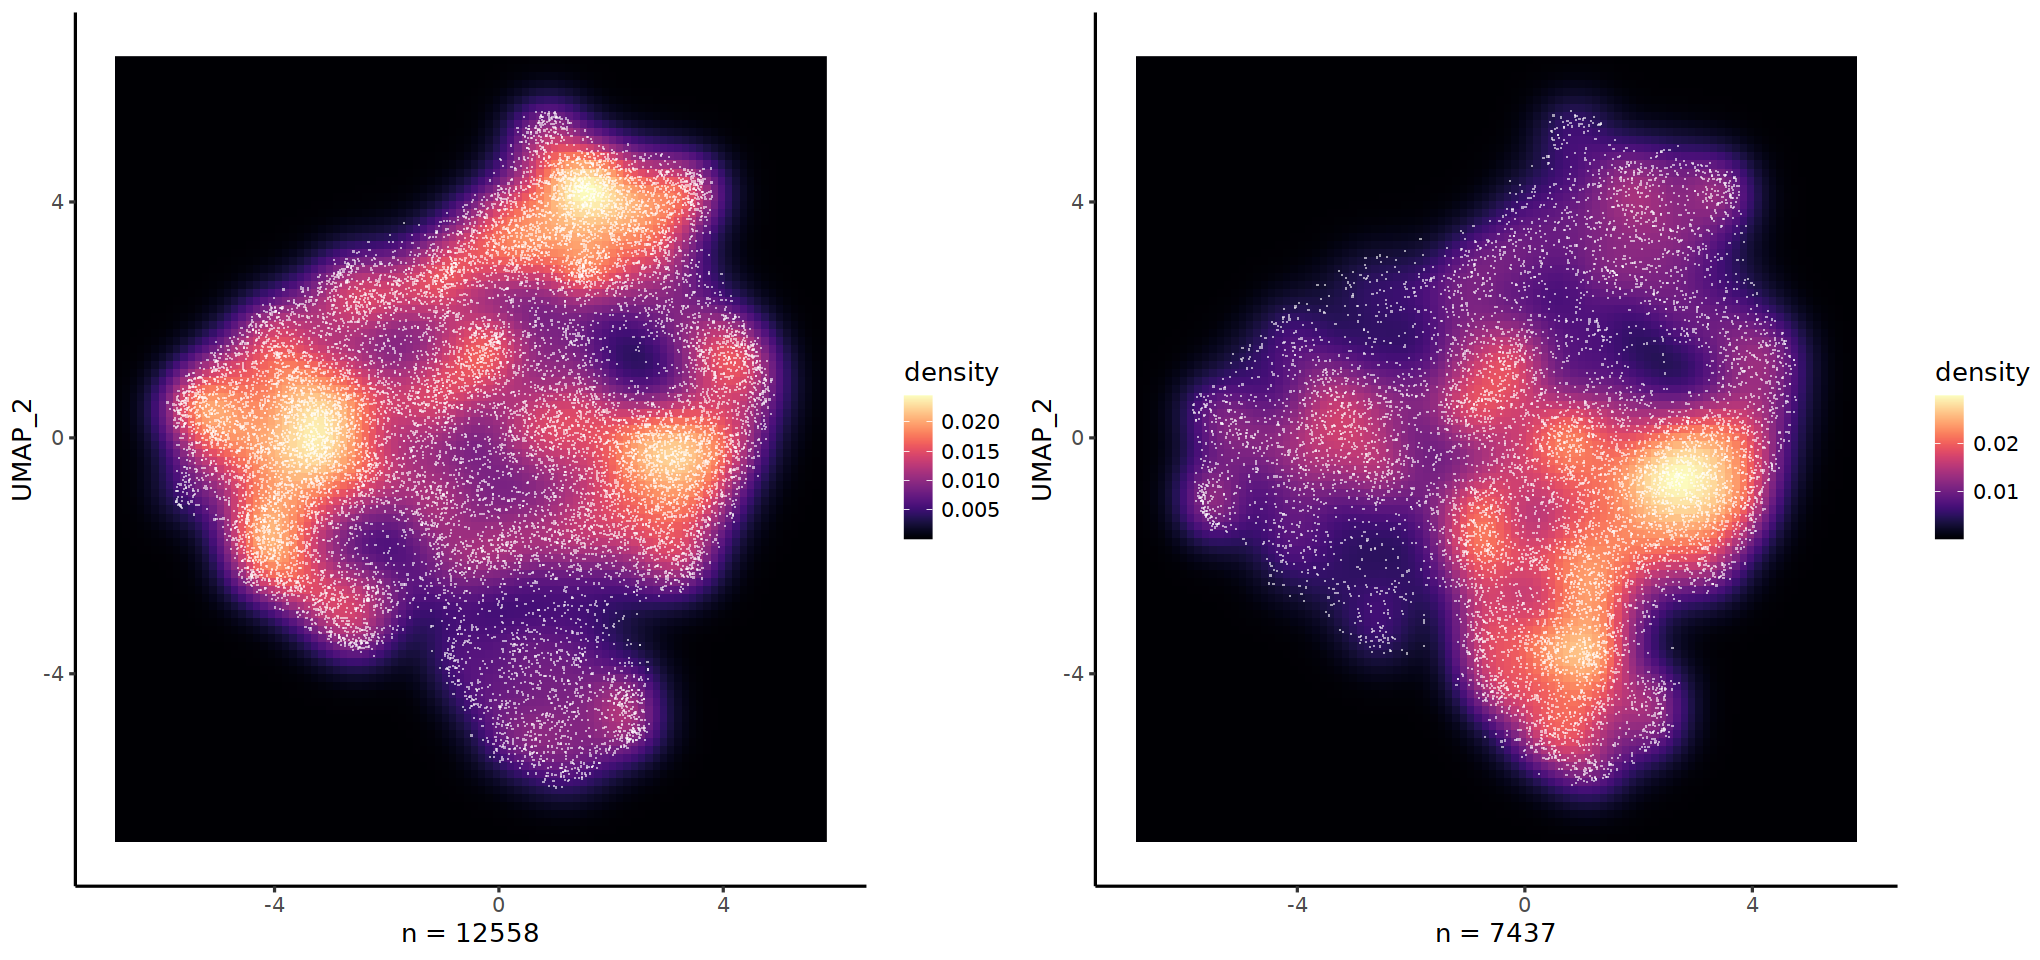

In [74]:
df = data.frame(seur_monomac@reductions$umap@cell.embeddings)
df$CellType = seur_monomac$BBK_Final_Celltype
df$CD8_LAG3_HiLow_Group = seur_monomac$CD8_LAG3_HiLow_Group
df$barcode = row.names(df)
corner(df)

UMAP_1 = df$UMAP_1
UMAP_2 = df$UMAP_2

one = ggplot(subset(df,CD8_LAG3_HiLow_Group == "Low"), aes(UMAP_1, UMAP_2)) +
stat_density_2d(aes(fill = ..density..), geom = 'raster', contour = FALSE) +
scale_fill_viridis(option = "magma") +
#coord_cartesian(expand = FALSE, xlim = c(min(UMAP_1), max(UMAP_1)),ylim = c(min(UMAP_2),max(UMAP_2))) +
xlim(c(min(UMAP_1)-1, max(UMAP_1)+1)) +
ylim(c(min(UMAP_2)-1, max(UMAP_2)+1)) +
geom_point(shape = ".",col = "white", alpha = 0.6) +
 xlab(paste("n = ",nrow(subset(df,CD8_LAG3_HiLow_Group == "Low")),sep = "")) +
theme_classic(base_size = 15)


UMAP_1 = df$UMAP_1
UMAP_2 = df$UMAP_2

two = ggplot(subset(df,CD8_LAG3_HiLow_Group == "High"), aes(UMAP_1, UMAP_2)) +
stat_density_2d(aes(fill = ..density..), geom = 'raster', contour = FALSE) +
scale_fill_viridis(option = "magma") +
#coord_cartesian(expand = FALSE, xlim = c(min(UMAP_1), max(UMAP_1)),ylim = c(min(UMAP_2),max(UMAP_2))) +
xlim(c(min(UMAP_1)-1, max(UMAP_1)+1)) +
ylim(c(min(UMAP_2)-1, max(UMAP_2)+1)) +
geom_point(shape = ".",col = "white", alpha = 0.6) + 
xlab(paste("n = ",nrow(subset(df,CD8_LAG3_HiLow_Group == "High")),sep = "")) +
theme_classic(base_size = 15)

options(repr.plot.width=17, repr.plot.height=8)
ggarrange(one, two)

ggsave("../Figures/Figure2/Figure2C_TAM_Galaxies_Space_Expanded.pdf", width = 17, height = 8)

### Figure 2D. Barplots quantifying TAM subset proportions between CD8 LAG3 hi/low samples <a name="4"></a>

In [76]:
ordered = c("TAM_CXCL10","TAM_C3","TAM_CCL4","TAM_SELENOP","TAM_SPP1","TAM_HSP")

### Calculate proportions for TAM subsets within this restricted TAM set for each sample

In [77]:
totals = as.vector(table(seur_monomac$Sample))
names(totals) = names(table(seur_monomac$Sample))
totals

meta_broad = seur_monomac@meta.data
head(meta_broad)

samples = names(totals)
samples

target = meta_broad

res = list()

for (i in 1:length(samples)){
    sub = subset(target, Sample == samples[i])
    sub_table = table(sub$BBK_Final_Celltype)
    sub_table = as.vector(sub_table)
    names(sub_table) = names(table(sub$BBK_Final_Celltype))
    sub_table = sub_table/(totals[i])
    res[[i]] = sub_table*100
}

names(res) = samples
res_df = as.data.frame(res,check.names = F)
head(res_df)

Bi_0600855_T3                    Bi_0600906_T1 
                             397                              117 
                   Bi_0600912_T1                    Bi_0600913_T1 
                               4                              120 
         Bi_0600915_T1_TrueTumor                    Bi_0600916_T1 
                            1136                               11 
              Bi_DFCI_0600876_T1  IpiNivo_CompleteResponse_Center 
                            1254                               75 
IpiNivo_CompleteResponse_Lateral  IpiNivo_CompleteResponse_Medial 
                             581                              122 
            IpiNivo_Mixed_Center                IpiNivo_Mixed_Far 
                             294                              779 
              IpiNivo_Mixed_Near         IpiNivo_Resistant_Center 
                             753                             1796 
           IpiNivo_Resistant_Far           IpiNivo_Resistant_Near 
                            1493                             2087 
        NivoExposed_LowerLateral          NivoExposed_LowerMedial 
                             753                               60 
        NivoExposed_SupraLateral                        Pool70-10 
                             753                              123 
                        Pool70-8                         Pool71-5 
                              84                               90 
                        Pool71-6                         Pool71-8 
                              35                              207 
                        Pool72-4                         Pool73-3 
                              70                              715 
                        Pool73-4                         Pool73-5 
                             796                              924 
                        Pool73-6                       UT1_Center 
                            1330                              203 
                       UT1_Lower                        UT1_Upper 
                            1627                              246 
                      UT2_Center                          UT2_Far 
                             147                              809 
                        UT2_Near 
                               4

orig.ident    nCount_RNA nFeature_RNA
AGCAGCCTCCATTCTA-1.Bi_0600855_T3 SeuratProject 17814      3408        
GGGTTGCAGTCATGCT-1.Bi_0600855_T3 SeuratProject 17595      3318        
TAGGCATCAATCGAAA-1.Bi_0600855_T3 SeuratProject 16771      3304        
ACGAGGACAGATGGCA-1.Bi_0600855_T3 SeuratProject 16447      3154        
AGGCCGTAGATGCCTT-1.Bi_0600855_T3 SeuratProject 16359      3046        
GTTACAGCATGGTAGG-1.Bi_0600855_T3 SeuratProject 15782      3059        
                                 Sample        cell_id                         
AGCAGCCTCCATTCTA-1.Bi_0600855_T3 Bi_0600855_T3 AGCAGCCTCCATTCTA-1.Bi_0600855_T3
GGGTTGCAGTCATGCT-1.Bi_0600855_T3 Bi_0600855_T3 GGGTTGCAGTCATGCT-1.Bi_0600855_T3
TAGGCATCAATCGAAA-1.Bi_0600855_T3 Bi_0600855_T3 TAGGCATCAATCGAAA-1.Bi_0600855_T3
ACGAGGACAGATGGCA-1.Bi_0600855_T3 Bi_0600855_T3 ACGAGGACAGATGGCA-1.Bi_0600855_T3
AGGCCGTAGATGCCTT-1.Bi_0600855_T3 Bi_0600855_T3 AGGCCGTAGATGCCTT-1.Bi_0600855_T3
GTTACAGCATGGTAGG-1.Bi_0600855_T3 Bi_0600855_T3 GTTACAGCATGGTAGG-1.Bi_0600855_T3
                                 Cohort Chemistry Treated IO TKI ...
AGCAGCCTCCATTCTA-1.Bi_0600855_T3 Bi     3prime    Yes     PR Yes ...
GGGTTGCAGTCATGCT-1.Bi_0600855_T3 Bi     3prime    Yes     PR Yes ...
TAGGCATCAATCGAAA-1.Bi_0600855_T3 Bi     3prime    Yes     PR Yes ...
ACGAGGACAGATGGCA-1.Bi_0600855_T3 Bi     3prime    Yes     PR Yes ...
AGGCCGTAGATGCCTT-1.Bi_0600855_T3 Bi     3prime    Yes     PR Yes ...
GTTACAGCATGGTAGG-1.Bi_0600855_T3 Bi     3prime    Yes     PR Yes ...
                                 NO_CytoSig_Zscore OSM_CytoSig_Zscore
AGCAGCCTCCATTCTA-1.Bi_0600855_T3 -3.637269         -0.3919472        
GGGTTGCAGTCATGCT-1.Bi_0600855_T3 -3.462957          3.4260299        
TAGGCATCAATCGAAA-1.Bi_0600855_T3 -3.611194          1.9701055        
ACGAGGACAGATGGCA-1.Bi_0600855_T3 -3.740075          2.8943046        
AGGCCGTAGATGCCTT-1.Bi_0600855_T3 -3.661189          2.4400772        
GTTACAGCATGGTAGG-1.Bi_0600855_T3 -3.818073         -1.4332679        
                                 TGFB1_CytoSig_Zscore TGFB3_CytoSig_Zscore
AGCAGCCTCCATTCTA-1.Bi_0600855_T3 -2.74944870          -4.583103           
GGGTTGCAGTCATGCT-1.Bi_0600855_T3  0.01517565          -5.669123           
TAGGCATCAATCGAAA-1.Bi_0600855_T3 -1.90812678          -4.939029           
ACGAGGACAGATGGCA-1.Bi_0600855_T3 -2.53371764          -5.150032           
AGGCCGTAGATGCCTT-1.Bi_0600855_T3 -1.66100516          -5.817036           
GTTACAGCATGGTAGG-1.Bi_0600855_T3 -1.35988979          -1.823704           
                                 TNFA_CytoSig_Zscore TRAIL_CytoSig_Zscore
AGCAGCCTCCATTCTA-1.Bi_0600855_T3  0.78467670         -3.857347           
GGGTTGCAGTCATGCT-1.Bi_0600855_T3  0.08529095         -4.123908           
TAGGCATCAATCGAAA-1.Bi_0600855_T3 -3.25871993         -2.181814           
ACGAGGACAGATGGCA-1.Bi_0600855_T3 -3.08009523         -3.256149           
AGGCCGTAGATGCCTT-1.Bi_0600855_T3 -0.81641685         -4.332318           
GTTACAGCATGGTAGG-1.Bi_0600855_T3 -1.64636211         -3.302608           
                                 TWEAK_CytoSig_Zscore VEGFA_CytoSig_Zscore
AGCAGCCTCCATTCTA-1.Bi_0600855_T3  2.1836660           -3.603122           
GGGTTGCAGTCATGCT-1.Bi_0600855_T3  2.1948688           -3.986249           
TAGGCATCAATCGAAA-1.Bi_0600855_T3  0.2454588           -2.220338           
ACGAGGACAGATGGCA-1.Bi_0600855_T3  0.0987047           -2.492007           
AGGCCGTAGATGCCTT-1.Bi_0600855_T3  0.9262035           -4.272005           
GTTACAGCATGGTAGG-1.Bi_0600855_T3 -0.5417299           -3.458718           
                                 WNT3A_CytoSig_Zscore CD8_LAG3_HiLow_Group
AGCAGCCTCCATTCTA-1.Bi_0600855_T3 -0.4000039           High                
GGGTTGCAGTCATGCT-1.Bi_0600855_T3 -1.2164713           High                
TAGGCATCAATCGAAA-1.Bi_0600855_T3  0.1782807           High                
ACGAGGACAGATGGCA-1.Bi_0600855_T3  0.5674833           High                
AGGCCGTAGATGCCTT-1.Bi_0600855_T3 -0.5530665           High  

[1] "Bi_0600855_T3"                    "Bi_0600906_T1"                   
 [3] "Bi_0600912_T1"                    "Bi_0600913_T1"                   
 [5] "Bi_0600915_T1_TrueTumor"          "Bi_0600916_T1"                   
 [7] "Bi_DFCI_0600876_T1"               "IpiNivo_CompleteResponse_Center" 
 [9] "IpiNivo_CompleteResponse_Lateral" "IpiNivo_CompleteResponse_Medial" 
[11] "IpiNivo_Mixed_Center"             "IpiNivo_Mixed_Far"               
[13] "IpiNivo_Mixed_Near"               "IpiNivo_Resistant_Center"        
[15] "IpiNivo_Resistant_Far"            "IpiNivo_Resistant_Near"          
[17] "NivoExposed_LowerLateral"         "NivoExposed_LowerMedial"         
[19] "NivoExposed_SupraLateral"         "Pool70-10"                       
[21] "Pool70-8"                         "Pool71-5"                        
[23] "Pool71-6"                         "Pool71-8"                        
[25] "Pool72-4"                         "Pool73-3"                        
[27] "Pool73-4"                         "Pool73-5"                        
[29] "Pool73-6"                         "UT1_Center"                      
[31] "UT1_Lower"                        "UT1_Upper"                       
[33] "UT2_Center"                       "UT2_Far"                         
[35] "UT2_Near"

Bi_0600855_T3 Bi_0600906_T1 Bi_0600912_T1 Bi_0600913_T1
TAM_SPP1    54.9118388    11.965812     25            50.000000    
TAM_C3      11.8387909    59.829060      0             2.500000    
TAM_SELENOP 11.8387909     7.692308     50            29.166667    
TAM_CCL4     1.7632242     9.401709     25            11.666667    
TAM_CXCL10  19.1435768    11.111111      0             3.333333    
TAM_HSP      0.5037783     0.000000      0             3.333333    
            Bi_0600915_T1_TrueTumor Bi_0600916_T1 Bi_DFCI_0600876_T1
TAM_SPP1    20.4225352              18.181818     32.21691          
TAM_C3      30.1056338              36.363636     25.59809          
TAM_SELENOP 15.4049296               0.000000     22.32855          
TAM_CCL4    11.4436620              36.363636     13.23764          
TAM_CXCL10  21.8309859               9.090909      6.61882          
TAM_HSP      0.7922535               0.000000      0.00000          
            IpiNivo_CompleteResponse_Center IpiNivo_CompleteResponse_Lateral
TAM_SPP1    32.000000                       35.8003442                      
TAM_C3       0.000000                       13.5972461                      
TAM_SELENOP 49.333333                       28.7435456                      
TAM_CCL4     6.666667                       12.9087780                      
TAM_CXCL10  12.000000                        8.0895009                      
TAM_HSP      0.000000                        0.8605852                      
            IpiNivo_CompleteResponse_Medial ... Pool73-3   Pool73-4  Pool73-5  
TAM_SPP1    33.606557                       ... 25.5944056 21.231156 20.6709957
TAM_C3       1.639344                       ... 20.1398601 22.989950 36.3636364
TAM_SELENOP 40.983607                       ... 13.9860140 28.517588 18.5064935
TAM_CCL4    18.032787                       ... 33.9860140  9.422111 12.5541126
TAM_CXCL10   5.737705                       ...  5.4545455 15.075377 11.3636364
TAM_HSP      0.000000                       ...  0.8391608  2.763819  0.5411255
            Pool73-6  UT1_Center UT1_Lower UT1_Upper UT2_Center UT2_Far 
TAM_SPP1    24.135338  5.911330  23.232944 10.569106 19.727891  21.38443
TAM_C3      23.157895 29.064039  28.027044 23.983740 23.129252  15.08035
TAM_SELENOP 19.548872  5.418719  17.701291 12.195122 17.687075  11.37206
TAM_CCL4    18.796992 34.482759  20.159803 32.926829 11.564626  13.47342
TAM_CXCL10  10.000000 21.674877   8.973571 15.853659 23.129252  28.43016
TAM_HSP      4.360902  3.448276   1.905347  4.471545  4.761905  10.25958
            UT2_Near
TAM_SPP1     0      
TAM_C3       0      
TAM_SELENOP  0      
TAM_CCL4    25      
TAM_CXCL10  50      
TAM_HSP     25

In [78]:
res_df = data.frame(t(res_df), check.names = F)
res_df$Sample = row.names(res_df)
res_df = left_join(res_df,CD8_LAG3_IO_LateStage_Corrected[,c("Sample","CD8_LAG3_HiLow_Group","IO_Treated")],by = "Sample")
head(res_df)

res_df_melt = melt(res_df)
head(res_df_melt)

TAM_SPP1 TAM_C3   TAM_SELENOP TAM_CCL4  TAM_CXCL10 TAM_HSP  
1 54.91184 11.83879 11.838791    1.763224 19.143577  0.5037783
2 11.96581 59.82906  7.692308    9.401709 11.111111  0.0000000
3 25.00000  0.00000 50.000000   25.000000  0.000000  0.0000000
4 50.00000  2.50000 29.166667   11.666667  3.333333  3.3333333
5 20.42254 30.10563 15.404930   11.443662 21.830986  0.7922535
6 18.18182 36.36364  0.000000   36.363636  9.090909  0.0000000
  Sample                  CD8_LAG3_HiLow_Group IO_Treated
1 Bi_0600855_T3           High                 IO Exposed
2 Bi_0600906_T1           Low                  IO Exposed
3 Bi_0600912_T1           Low                  IO Exposed
4 Bi_0600913_T1           Low                  IO Exposed
5 Bi_0600915_T1_TrueTumor High                 IO Exposed
6 Bi_0600916_T1           High                 IO Naive

Using Sample, CD8_LAG3_HiLow_Group, IO_Treated as id variables



Sample                  CD8_LAG3_HiLow_Group IO_Treated variable value   
1 Bi_0600855_T3           High                 IO Exposed TAM_SPP1 54.91184
2 Bi_0600906_T1           Low                  IO Exposed TAM_SPP1 11.96581
3 Bi_0600912_T1           Low                  IO Exposed TAM_SPP1 25.00000
4 Bi_0600913_T1           Low                  IO Exposed TAM_SPP1 50.00000
5 Bi_0600915_T1_TrueTumor High                 IO Exposed TAM_SPP1 20.42254
6 Bi_0600916_T1           High                 IO Naive   TAM_SPP1 18.18182

In [79]:
res_df_melt$variable = factor(res_df_melt$variable, levels = ordered)
head(res_df_melt)

Sample                  CD8_LAG3_HiLow_Group IO_Treated variable value   
1 Bi_0600855_T3           High                 IO Exposed TAM_SPP1 54.91184
2 Bi_0600906_T1           Low                  IO Exposed TAM_SPP1 11.96581
3 Bi_0600912_T1           Low                  IO Exposed TAM_SPP1 25.00000
4 Bi_0600913_T1           Low                  IO Exposed TAM_SPP1 50.00000
5 Bi_0600915_T1_TrueTumor High                 IO Exposed TAM_SPP1 20.42254
6 Bi_0600916_T1           High                 IO Naive   TAM_SPP1 18.18182

In [80]:
res_df_melt$CD8_LAG3_HiLow_Group = factor(res_df_melt$CD8_LAG3_HiLow_Group, levels = c("Low","High"))

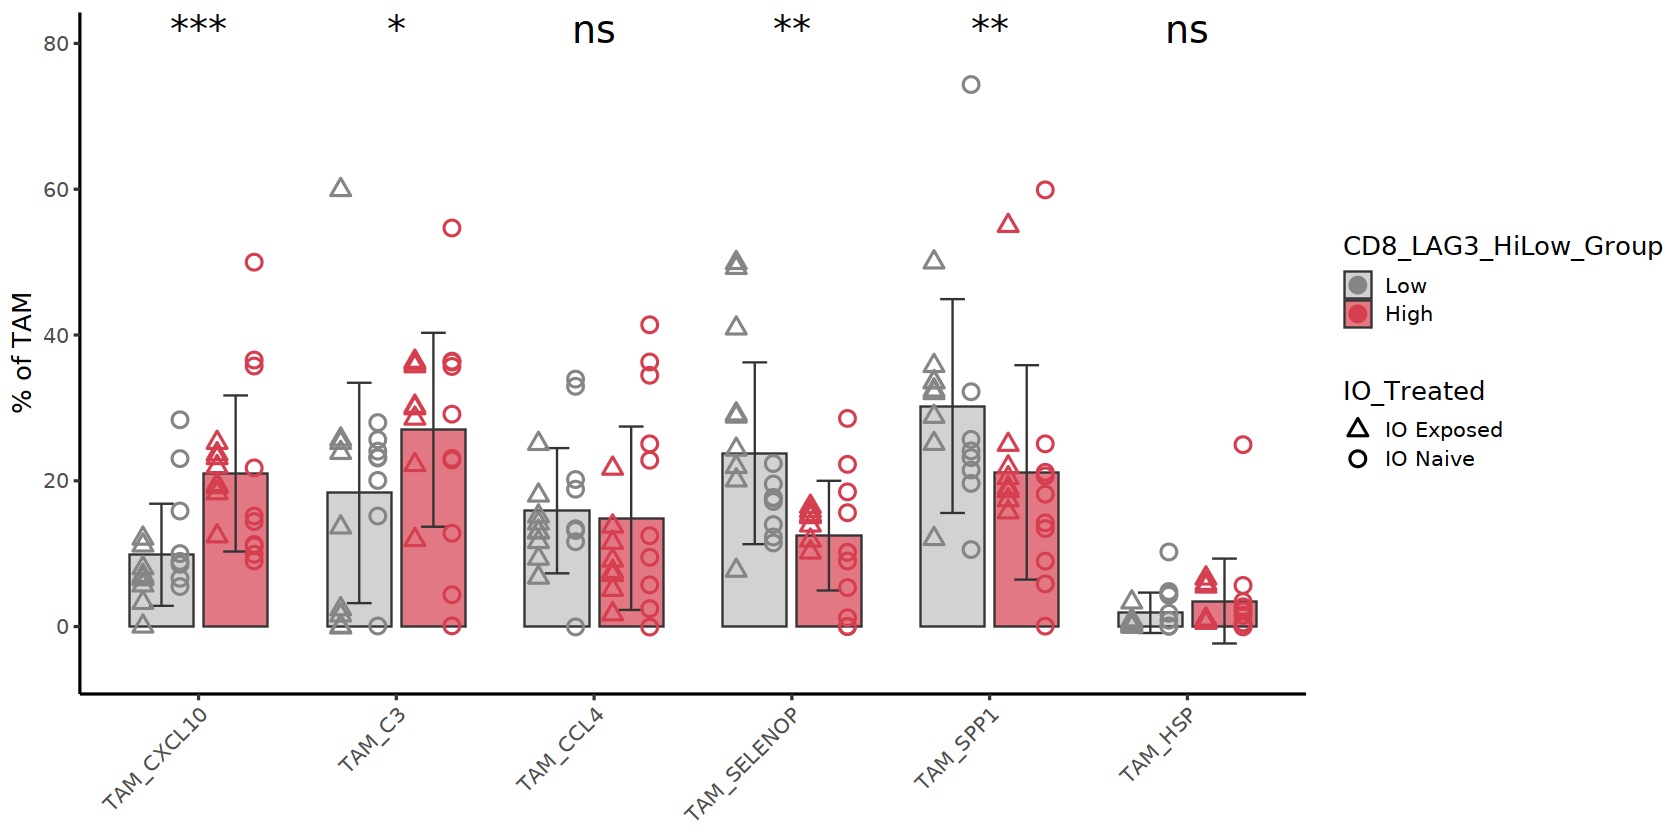

In [81]:
options(repr.plot.width=14, repr.plot.height=7)

ggbarplot(res_df_melt, x = "variable", y = "value",fill = "CD8_LAG3_HiLow_Group",
               add = c("mean_sd"),add.params = list(width = 0.25),width = 0.65,alpha = 0.7,color = "grey20",
               position = position_dodge(0.75)) +
scale_fill_manual(values = rev(c("#d53e4f","gray"))) +
geom_jitter(aes(variable, value, fill = CD8_LAG3_HiLow_Group,color = CD8_LAG3_HiLow_Group,shape = IO_Treated),  size = 3.5,stroke = 1, position = position_jitterdodge(jitter.height = .1, jitter.width = 0,dodge.width = 0.75)) +
scale_color_manual(values = rev(c("#d53e4f","gray52"))) + theme_classic(base_size = 15) + theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) + 
scale_shape_manual(values = c(2,1)) +
ylab("% of TAM") + xlab(label = NULL) +
ylim(c(-5,80)) +
stat_compare_means(aes(group = CD8_LAG3_HiLow_Group), method = "wilcox.test",label = "p.signif",size = 8)

ggsave("../Figures/Figure2/Figure2D_TAM_Freq_Barplots_SD_Groups_Ordered.pdf", width = 14, height = 7)

### Figure 2E. Heatmap showing enrichment of immune checkpoints and inhibitory ligands in TAM CXCL10-Hi <a name="5"></a>

In [82]:
checkpoints_plot = c("NOS2","CD274","PDCD1LG2","LGALS9","HMGB1","CEACAM1","FGL1","FGL2","HLA-DRA","NECTIN2","PVR","SIGLEC10","TNFRSF14","CD47","VSIG4","VSIR","OAS1","HLA-E","HLA-G","LGALS3","CD80","CD86","LILRB1")

In [83]:
seur_monomac_Stage_Corrected = subset(seur_full, cells = colnames(seur_monomac))
Idents(seur_monomac_Stage_Corrected) = "BBK_Final_Celltype"

In [85]:
table(Idents(seur_monomac_Stage_Corrected))


   TAM_SPP1      TAM_C3 TAM_SELENOP    TAM_CCL4  TAM_CXCL10     TAM_HSP 
       5180        5151        3759        2966        2549         390 

In [93]:
markers <- FindAllMarkers(seur_monomac_Stage_Corrected, features = checkpoints_plot,only.pos = TRUE, min.pct = 0, logfc.threshold = 0, min.diff.pct = 0, assay = "RNA",test.use = "LR",latent.vars = c("Patient"))

Calculating cluster TAM_SPP1

Calculating cluster TAM_C3

Calculating cluster TAM_SELENOP

Calculating cluster TAM_CCL4

Calculating cluster TAM_CXCL10

Calculating cluster TAM_HSP



In [95]:
subset(markers, gene %in% checkpoints_plot & p_val_adj < 0.05)

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster    
LGALS3     0.000000e+00 1.54833295 0.967 0.772  0.000000e+00 TAM_SPP1   
LGALS9     3.196837e-69 0.23417500 0.742 0.616  1.266555e-64 TAM_SPP1   
HLA-DRA   2.446695e-268 0.39852266 1.000 0.999 9.693561e-264 TAM_C3     
VSIR      4.862140e-178 0.45111350 0.880 0.760 1.926331e-173 TAM_C3     
HMGB1      2.376339e-33 0.17686085 0.915 0.889  9.414816e-29 TAM_C3     
CD86       1.067889e-16 0.14094595 0.683 0.644  4.230868e-12 TAM_C3     
FGL2       2.713496e-15 0.14479542 0.878 0.826  1.075060e-10 TAM_C3     
SIGLEC10   1.165194e-11 0.17910720 0.511 0.467  4.616381e-07 TAM_C3     
HLA-E1    1.339937e-140 0.31509261 0.988 0.983 5.308698e-136 TAM_SELENOP
FGL21      7.652799e-50 0.22287893 0.876 0.831  3.031962e-45 TAM_SELENOP
VSIG4      1.330326e-35 0.29806929 0.686 0.626  5.270620e-31 TAM_SELENOP
HLA-DRA1   1.790135e-26 0.08782555 0.999 0.999  7.092337e-22 TAM_SELENOP
PDCD1LG2   4.314857e-17 0.07548544 0.132 0.101  1.709503e-12 TAM_SELENOP
VSIR1      2.522457e-09 0.07339378 0.802 0.788  9.993721e-05 TAM_SELENOP
VSIR2      1.568557e-81 0.32085537 0.877 0.776  6.214466e-77 TAM_CCL4   
HLA-DRA2   1.065530e-46 0.10157389 1.000 0.999  4.221522e-42 TAM_CCL4   
FGL22      4.637369e-20 0.12455352 0.880 0.832  1.837279e-15 TAM_CCL4   
CD862      4.498208e-14 0.14230312 0.684 0.649  1.782145e-09 TAM_CCL4   
SIGLEC102  5.911547e-09 0.05878375 0.503 0.474  2.342096e-04 TAM_CCL4   
OAS1       8.716319e-98 0.66236427 0.645 0.433  3.453318e-93 TAM_CXCL10 
FGL23      2.657952e-77 0.47229324 0.915 0.828  1.053054e-72 TAM_CXCL10 
LILRB1     2.545952e-71 0.43120809 0.619 0.416  1.008681e-66 TAM_CXCL10 
CD274      5.192513e-58 0.14146621 0.095 0.017  2.057222e-53 TAM_CXCL10 
LGALS91    1.378021e-44 0.36347184 0.776 0.630  5.459581e-40 TAM_CXCL10 
CD801      4.161944e-41 0.18629872 0.168 0.075  1.648921e-36 TAM_CXCL10 
CD471      4.320554e-39 0.30303293 0.620 0.474  1.711760e-34 TAM_CXCL10 
NECTIN21   2.735618e-36 0.23623625 0.438 0.311  1.083824e-31 TAM_CXCL10 
PDCD1LG21  5.539460e-21 0.14762901 0.204 0.092  2.194679e-16 TAM_CXCL10 
TNFRSF14   2.710453e-19 0.23263375 0.661 0.526  1.073854e-14 TAM_CXCL10 
HLA-E2     3.246463e-11 0.14087157 0.985 0.984  1.286216e-06 TAM_CXCL10 
HLA-G      8.128484e-10 0.06666997 0.186 0.128  3.220424e-05 TAM_CXCL10 
OAS11      1.073602e-06 0.04452363 0.428 0.461  4.253504e-02 TAM_HSP    
          gene    
LGALS3    LGALS3  
LGALS9    LGALS9  
HLA-DRA   HLA-DRA 
VSIR      VSIR    
HMGB1     HMGB1   
CD86      CD86    
FGL2      FGL2    
SIGLEC10  SIGLEC10
HLA-E1    HLA-E   
FGL21     FGL2    
VSIG4     VSIG4   
HLA-DRA1  HLA-DRA 
PDCD1LG2  PDCD1LG2
VSIR1     VSIR    
VSIR2     VSIR    
HLA-DRA2  HLA-DRA 
FGL22     FGL2    
CD862     CD86    
SIGLEC102 SIGLEC10
OAS1      OAS1    
FGL23     FGL2    
LILRB1    LILRB1  
CD274     CD274   
LGALS91   LGALS9  
CD801     CD80    
CD471     CD47    
NECTIN21  NECTIN2 
PDCD1LG21 PDCD1LG2
TNFRSF14  TNFRSF14
HLA-E2    HLA-E   
HLA-G     HLA-G   
OAS11     OAS1

### Make cluster averages object within TAM

Centering and scaling data matrix



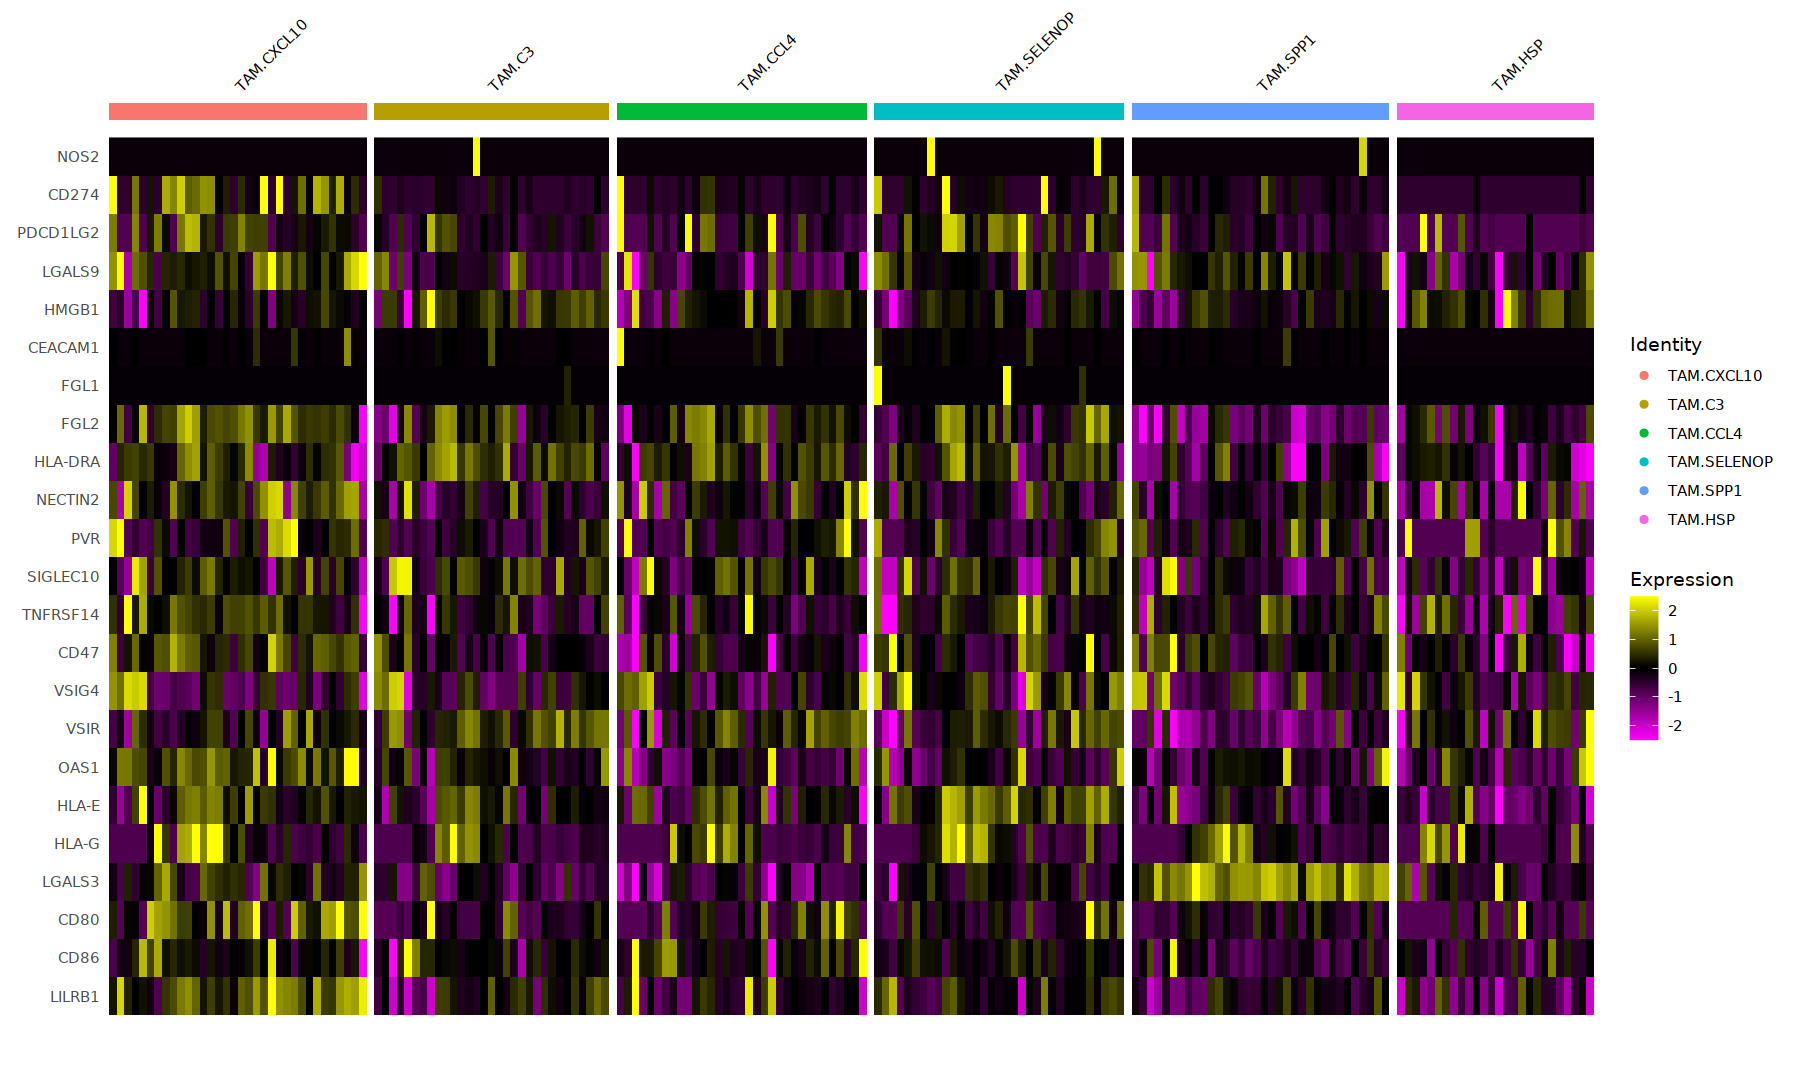

In [96]:
options(repr.plot.width=15, repr.plot.height=9)

seur_monomac_Stage_Corrected$Sample = factor(seur_monomac_Stage_Corrected$Sample)
seur_monomac_Stage_Corrected$Cohort = factor(seur_monomac_Stage_Corrected$Cohort)
seur_monomac_Stage_Corrected$BBK_Final_Celltype_ClusterAverages_Group = str_replace_all(seur_monomac_Stage_Corrected$BBK_Final_Celltype,"_",".")
seur_monomac_Stage_Corrected$BBK_Final_Celltype_Sample = paste(seur_monomac_Stage_Corrected$BBK_Final_Celltype_ClusterAverages_Group,seur_monomac_Stage_Corrected$Sample,sep = "_")


cluster.averages <- AverageExpression(seur_monomac_Stage_Corrected, return.seurat = TRUE, group.by = c("BBK_Final_Celltype_ClusterAverages_Group","Sample"),)
Idents(cluster.averages) = factor(Idents(cluster.averages), levels = c("TAM.CXCL10","TAM.C3","TAM.CCL4","TAM.SELENOP","TAM.SPP1","TAM.HSP"))

DoHeatmap(cluster.averages, features = checkpoints_plot, size = 3, 
    draw.lines = TRUE)



In [97]:
head(cluster.averages@meta.data)
cluster.averages$BBK_Final_Celltype_Sample = row.names(cluster.averages@meta.data)
cluster.averages@meta.data = left_join(cluster.averages@meta.data, distinct(seur_monomac_Stage_Corrected@meta.data[,c("Cohort","Sample","Stage_Corrected","Biopsy","IO","TKI","Treated","IO_Treated","BBK_Final_Celltype_Sample","BBK_Final_Celltype")]),by = "BBK_Final_Celltype_Sample")
row.names(cluster.averages@meta.data) = cluster.averages$BBK_Final_Celltype_Sample
head(cluster.averages@meta.data)

orig.ident nCount_RNA nFeature_RNA
TAM.C3_Bi_0600855_T3           TAM.C3     10000       9796       
TAM.C3_Bi_0600906_T1           TAM.C3     10000      10543       
TAM.C3_Bi_0600913_T1           TAM.C3     10000       2652       
TAM.C3_Bi_0600915_T1_TrueTumor TAM.C3     10000      15917       
TAM.C3_Bi_0600916_T1           TAM.C3     10000       2335       
TAM.C3_Bi_DFCI_0600876_T1      TAM.C3     10000      17001

orig.ident nCount_RNA nFeature_RNA
TAM.C3_Bi_0600855_T3           TAM.C3     10000       9796       
TAM.C3_Bi_0600906_T1           TAM.C3     10000      10543       
TAM.C3_Bi_0600913_T1           TAM.C3     10000       2652       
TAM.C3_Bi_0600915_T1_TrueTumor TAM.C3     10000      15917       
TAM.C3_Bi_0600916_T1           TAM.C3     10000       2335       
TAM.C3_Bi_DFCI_0600876_T1      TAM.C3     10000      17001       
                               BBK_Final_Celltype_Sample      Cohort
TAM.C3_Bi_0600855_T3           TAM.C3_Bi_0600855_T3           Bi    
TAM.C3_Bi_0600906_T1           TAM.C3_Bi_0600906_T1           Bi    
TAM.C3_Bi_0600913_T1           TAM.C3_Bi_0600913_T1           Bi    
TAM.C3_Bi_0600915_T1_TrueTumor TAM.C3_Bi_0600915_T1_TrueTumor Bi    
TAM.C3_Bi_0600916_T1           TAM.C3_Bi_0600916_T1           Bi    
TAM.C3_Bi_DFCI_0600876_T1      TAM.C3_Bi_DFCI_0600876_T1      Bi    
                               Sample                  Stage_Corrected
TAM.C3_Bi_0600855_T3           Bi_0600855_T3           IV             
TAM.C3_Bi_0600906_T1           Bi_0600906_T1           IV             
TAM.C3_Bi_0600913_T1           Bi_0600913_T1           IV             
TAM.C3_Bi_0600915_T1_TrueTumor Bi_0600915_T1_TrueTumor III            
TAM.C3_Bi_0600916_T1           Bi_0600916_T1           IV             
TAM.C3_Bi_DFCI_0600876_T1      Bi_DFCI_0600876_T1      IV             
                               Biopsy     IO TKI Treated IO_Treated
TAM.C3_Bi_0600855_T3           Abdomen    PR Yes Yes     IO Exposed
TAM.C3_Bi_0600906_T1           Lymph_node PD Yes Yes     IO Exposed
TAM.C3_Bi_0600913_T1           Lung       SD Yes Yes     IO Exposed
TAM.C3_Bi_0600915_T1_TrueTumor Kidney     PR No  Yes     IO Exposed
TAM.C3_Bi_0600916_T1           Lymph_node No No  No      IO Naive  
TAM.C3_Bi_DFCI_0600876_T1      Kidney     No No  No      IO Naive  
                               BBK_Final_Celltype
TAM.C3_Bi_0600855_T3           TAM_C3            
TAM.C3_Bi_0600906_T1           TAM_C3            
TAM.C3_Bi_0600913_T1           TAM_C3            
TAM.C3_Bi_0600915_T1_TrueTumor TAM_C3            
TAM.C3_Bi_0600916_T1           TAM_C3            
TAM.C3_Bi_DFCI_0600876_T1      TAM_C3

In [98]:
length(unique(cluster.averages$Cohort))
length(unique(cluster.averages$Biopsy))
length(unique(cluster.averages$Stage_Corrected))
length(unique(cluster.averages$Sample))
length(unique(cluster.averages$IO_Treated))

[1] 3

[1] 6

[1] 2

[1] 35

[1] 2

In [99]:
table(droplevels(cluster.averages$BBK_Final_Celltype))
table(cluster.averages$Stage_Corrected)
table(cluster.averages$Cohort)
table(cluster.averages$IO_Treated)


   TAM_SPP1      TAM_C3 TAM_SELENOP    TAM_CCL4  TAM_CXCL10     TAM_HSP 
         34          31          33          33          34          26 


III  IV 
 71 120 


     Bi   Braun Krishna 
     35      54     102 


IO Exposed   IO Naive 
        95         96 

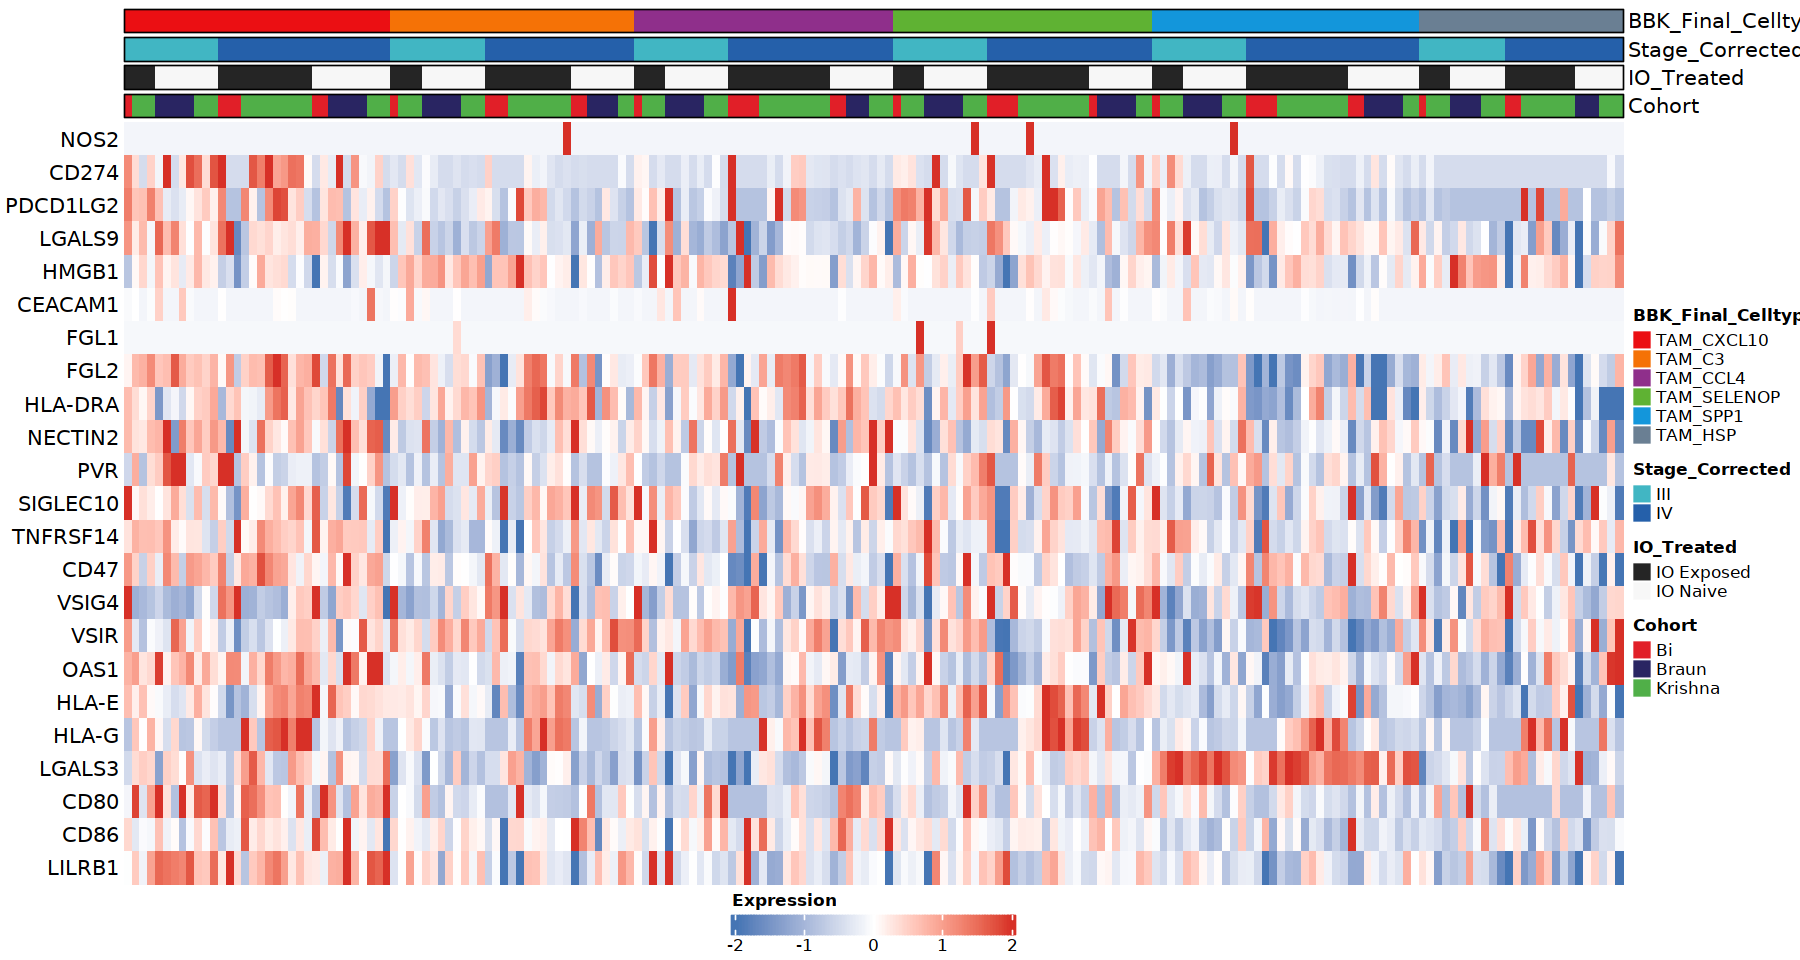

In [100]:
cluster.averages$BBK_Final_Celltype = factor(cluster.averages$BBK_Final_Celltype, levels = c("TAM_CXCL10","TAM_C3","TAM_CCL4","TAM_SELENOP","TAM_SPP1","TAM_HSP"))

options(repr.plot.width=15, repr.plot.height=8)
colors <- list(tamcols[levels(cluster.averages$BBK_Final_Celltype)],c("#41B6C3","#2560AA"),c("#252525","#f7f7f7"),c("#E11F28","#292562","#50AF48"))

DefaultAssay(cluster.averages) = "RNA"
plot_heatmap(dataset = cluster.averages, 
              markers = checkpoints_plot,
              sort_var = c("BBK_Final_Celltype","Stage_Corrected","IO_Treated","Cohort"),
              anno_var = c("BBK_Final_Celltype","Stage_Corrected","IO_Treated","Cohort"),
              anno_colors = colors)

### Edit down the checkpoints a bit

In [101]:
TAM_CXCL10_checkpoints = subset(subset(markers, cluster == "TAM_CXCL10" & p_val_adj < 0.05), gene %in% checkpoints_plot)
TAM_CXCL10_checkpoints$gene

[1] "OAS1"     "FGL2"     "LILRB1"   "CD274"    "LGALS9"   "CD80"    
 [7] "CD47"     "NECTIN2"  "PDCD1LG2" "TNFRSF14" "HLA-E"    "HLA-G"

In [102]:
checkpoints_plot2 = c("CD274","PDCD1LG2","LGALS9","NECTIN2","TNFRSF14","CD80","LILRB1")

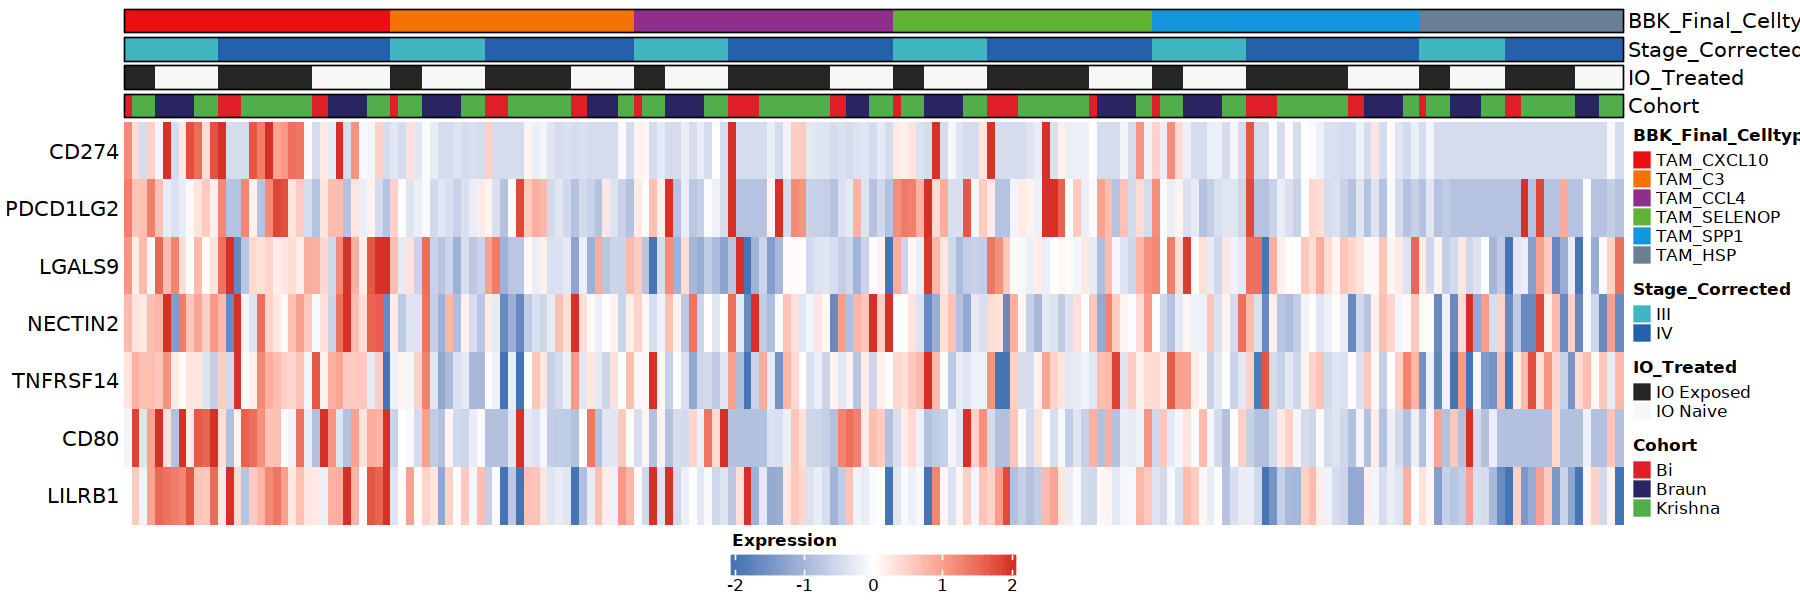

In [103]:
cluster.averages$BBK_Final_Celltype = factor(cluster.averages$BBK_Final_Celltype, levels = c("TAM_CXCL10","TAM_C3","TAM_CCL4","TAM_SELENOP","TAM_SPP1","TAM_HSP"))

options(repr.plot.width=15, repr.plot.height=5)
colors <- list(tamcols[levels(cluster.averages$BBK_Final_Celltype)],c("#41B6C3","#2560AA"),c("#252525","#f7f7f7"),c("#E11F28","#292562","#50AF48"))

DefaultAssay(cluster.averages) = "RNA"
plot_heatmap(dataset = cluster.averages, 
              markers = checkpoints_plot2,
              sort_var = c("BBK_Final_Celltype","Stage_Corrected","IO_Treated","Cohort"),
              anno_var = c("BBK_Final_Celltype","Stage_Corrected","IO_Treated","Cohort"),
              anno_colors = colors)

### Export

In [104]:
pdf("../Figures/Figure2/Figure2E_TAM_Checkpoints_Heatmap.pdf", useDingbats = F, width = 15, height = 5)

cluster.averages$BBK_Final_Celltype = factor(cluster.averages$BBK_Final_Celltype, levels = c("TAM_CXCL10","TAM_C3","TAM_CCL4","TAM_SELENOP","TAM_SPP1","TAM_HSP"))

options(repr.plot.width=15, repr.plot.height=5)
colors <- list(tamcols[levels(cluster.averages$BBK_Final_Celltype)],c("#41B6C3","#2560AA"),c("#252525","#f7f7f7"),c("#E11F28","#292562","#50AF48"))

DefaultAssay(cluster.averages) = "RNA"
plot_heatmap(dataset = cluster.averages, 
              markers = checkpoints_plot2,
              sort_var = c("BBK_Final_Celltype","Stage_Corrected","IO_Treated","Cohort"),
              anno_var = c("BBK_Final_Celltype","Stage_Corrected","IO_Treated","Cohort"),
              anno_colors = colors)

dev.off()

png 
  2

### Make cluster average object for IFNG and IFN1 CytoSig scores to display above heatmap

In [105]:
cytosig_binded_df = readRDS("../Data_Objects/cytosig_binded_df_seur_full.RDS")
cytosig_df_list = readRDS("../Data_Objects/cytosig_df_list_seur_full.RDS")

In [106]:
corner(cytosig_binded_df)

Activin.A_CytoSig_Pval BDNF_CytoSig_Pval
GTTCTCGAGAGGTAGA-1.5pool1_2 0.560                  0.602            
CTAGAGTCATCAGTCA-1.5pool1_2 0.106                  0.521            
CGGCTAGAGGTAGCCA-1.5pool1_2 0.196                  0.482            
CTGCTGTAGTGTTTGC-1.5pool1_2 0.056                  0.437            
CCATGTCCATCGATGT-1.5pool1_2 0.000                  0.908            
                            BMP2_CytoSig_Pval BMP4_CytoSig_Pval
GTTCTCGAGAGGTAGA-1.5pool1_2 0.085             0.601            
CTAGAGTCATCAGTCA-1.5pool1_2 0.004             0.014            
CGGCTAGAGGTAGCCA-1.5pool1_2 0.137             0.000            
CTGCTGTAGTGTTTGC-1.5pool1_2 0.082             0.000            
CCATGTCCATCGATGT-1.5pool1_2 0.311             0.023            
                            BMP6_CytoSig_Pval
GTTCTCGAGAGGTAGA-1.5pool1_2 0.640            
CTAGAGTCATCAGTCA-1.5pool1_2 0.591            
CGGCTAGAGGTAGCCA-1.5pool1_2 0.212            
CTGCTGTAGTGTTTGC-1.5pool1_2 0.658            
CCATGTCCATCGATGT-1.5pool1_2 0.128

In [107]:
cytosig_binded_df_seur_monomac_Stage_Corrected = cytosig_binded_df[colnames(seur_monomac_Stage_Corrected),]
setequal(row.names(cytosig_binded_df_seur_monomac_Stage_Corrected),row.names(seur_monomac_Stage_Corrected@meta.data))

[1] TRUE

In [108]:
seur_monomac_Stage_Corrected$IFN1_CytoSig_Zscore_Final = cytosig_binded_df_seur_monomac_Stage_Corrected$IFN1_CytoSig_Zscore
seur_monomac_Stage_Corrected$IFNG_CytoSig_Zscore_Final = cytosig_binded_df_seur_monomac_Stage_Corrected$IFNG_CytoSig_Zscore

In [109]:
meta = seur_monomac_Stage_Corrected@meta.data

agg_tbl <- meta %>% group_by(BBK_Final_Celltype_Sample) %>% 
  summarise(mean_IFN1_CytoSig_Zscore_Final=mean(IFN1_CytoSig_Zscore_Final),
            median_IFN1_CytoSig_Zscore_Final=median(IFN1_CytoSig_Zscore_Final),
            mean_IFNG_CytoSig_Zscore_Final=mean(IFNG_CytoSig_Zscore_Final),
             median_IFNG_CytoSig_Zscore_Final=median(IFNG_CytoSig_Zscore_Final),
            .groups = 'drop')

In [110]:
head(agg_tbl)
length(intersect(agg_tbl$BBK_Final_Celltype_Sample,row.names(cluster.averages@meta.data)))

agg_tbl = data.frame(agg_tbl)
row.names(agg_tbl) = agg_tbl$BBK_Final_Celltype_Sample

agg_tbl = agg_tbl[row.names(cluster.averages@meta.data),]
head(agg_tbl)

BBK_Final_Celltype_Sample      mean_IFN1_CytoSig_Zscore_Final
1 TAM.C3_Bi_0600855_T3            0.37266728                   
2 TAM.C3_Bi_0600906_T1           -2.96713038                   
3 TAM.C3_Bi_0600913_T1           -1.62692401                   
4 TAM.C3_Bi_0600915_T1_TrueTumor -0.07924878                   
5 TAM.C3_Bi_0600916_T1           -1.07479599                   
6 TAM.C3_Bi_DFCI_0600876_T1      -1.81762891                   
  median_IFN1_CytoSig_Zscore_Final mean_IFNG_CytoSig_Zscore_Final
1  0.4694571                        2.2751477                    
2 -3.0944556                       -2.7628057                    
3 -1.8165017                       -1.0981891                    
4 -0.2126041                        2.3132656                    
5 -0.9333624                       -0.2437641                    
6 -2.0663431                       -1.8771237                    
  median_IFNG_CytoSig_Zscore_Final
1  1.9525472                      
2 -2.8956435                      
3 -1.9619463                      
4  2.2865573                      
5 -0.1388985                      
6 -1.9250031

[1] 191

BBK_Final_Celltype_Sample     
TAM.C3_Bi_0600855_T3           TAM.C3_Bi_0600855_T3          
TAM.C3_Bi_0600906_T1           TAM.C3_Bi_0600906_T1          
TAM.C3_Bi_0600913_T1           TAM.C3_Bi_0600913_T1          
TAM.C3_Bi_0600915_T1_TrueTumor TAM.C3_Bi_0600915_T1_TrueTumor
TAM.C3_Bi_0600916_T1           TAM.C3_Bi_0600916_T1          
TAM.C3_Bi_DFCI_0600876_T1      TAM.C3_Bi_DFCI_0600876_T1     
                               mean_IFN1_CytoSig_Zscore_Final
TAM.C3_Bi_0600855_T3            0.37266728                   
TAM.C3_Bi_0600906_T1           -2.96713038                   
TAM.C3_Bi_0600913_T1           -1.62692401                   
TAM.C3_Bi_0600915_T1_TrueTumor -0.07924878                   
TAM.C3_Bi_0600916_T1           -1.07479599                   
TAM.C3_Bi_DFCI_0600876_T1      -1.81762891                   
                               median_IFN1_CytoSig_Zscore_Final
TAM.C3_Bi_0600855_T3            0.4694571                      
TAM.C3_Bi_0600906_T1           -3.0944556                      
TAM.C3_Bi_0600913_T1           -1.8165017                      
TAM.C3_Bi_0600915_T1_TrueTumor -0.2126041                      
TAM.C3_Bi_0600916_T1           -0.9333624                      
TAM.C3_Bi_DFCI_0600876_T1      -2.0663431                      
                               mean_IFNG_CytoSig_Zscore_Final
TAM.C3_Bi_0600855_T3            2.2751477                    
TAM.C3_Bi_0600906_T1           -2.7628057                    
TAM.C3_Bi_0600913_T1           -1.0981891                    
TAM.C3_Bi_0600915_T1_TrueTumor  2.3132656                    
TAM.C3_Bi_0600916_T1           -0.2437641                    
TAM.C3_Bi_DFCI_0600876_T1      -1.8771237                    
                               median_IFNG_CytoSig_Zscore_Final
TAM.C3_Bi_0600855_T3            1.9525472                      
TAM.C3_Bi_0600906_T1           -2.8956435                      
TAM.C3_Bi_0600913_T1           -1.9619463                      
TAM.C3_Bi_0600915_T1_TrueTumor  2.2865573                      
TAM.C3_Bi_0600916_T1           -0.1388985                      
TAM.C3_Bi_DFCI_0600876_T1      -1.9250031

In [111]:
cluster.averages$mean_IFN1_CytoSig_Zscore_Final = agg_tbl$mean_IFN1_CytoSig_Zscore_Final
cluster.averages$median_IFN1_CytoSig_Zscore_Final = agg_tbl$median_IFN1_CytoSig_Zscore_Final
cluster.averages$mean_IFNG_CytoSig_Zscore_Final = agg_tbl$mean_IFNG_CytoSig_Zscore_Final
cluster.averages$median_IFNG_CytoSig_Zscore_Final = agg_tbl$median_IFNG_CytoSig_Zscore_Final

In [112]:
cytosig_mat = as.matrix(data.frame(t(scale(cluster.averages@meta.data[,c("mean_IFN1_CytoSig_Zscore_Final","median_IFN1_CytoSig_Zscore_Final","mean_IFNG_CytoSig_Zscore_Final","median_IFNG_CytoSig_Zscore_Final")])), check.names = F))
length(intersect(colnames(cytosig_mat), row.names(cluster.averages@meta.data)))
setdiff(colnames(cytosig_mat), row.names(cluster.averages@meta.data))
setdiff(row.names(cluster.averages@meta.data),colnames(cytosig_mat))

[1] 191

character(0)

character(0)

In [113]:
cluster.averages@assays$RNA@data = cytosig_mat
cluster.averages@assays$RNA@scale.data = cytosig_mat

corner(cluster.averages@assays$RNA@scale.data)

TAM.C3_Bi_0600855_T3 TAM.C3_Bi_0600906_T1
mean_IFN1_CytoSig_Zscore_Final   -0.05409224          -1.384831           
median_IFN1_CytoSig_Zscore_Final  0.06904101          -1.355771           
mean_IFNG_CytoSig_Zscore_Final    0.41280619          -1.412459           
median_IFNG_CytoSig_Zscore_Final  0.35431681          -1.362768           
                                 TAM.C3_Bi_0600913_T1
mean_IFN1_CytoSig_Zscore_Final   -0.8508274          
median_IFN1_CytoSig_Zscore_Final -0.8448596          
mean_IFNG_CytoSig_Zscore_Final   -0.8093633          
median_IFNG_CytoSig_Zscore_Final -1.0320805          
                                 TAM.C3_Bi_0600915_T1_TrueTumor
mean_IFN1_CytoSig_Zscore_Final   -0.2341578                    
median_IFN1_CytoSig_Zscore_Final -0.2036394                    
mean_IFNG_CytoSig_Zscore_Final    0.4266164                    
median_IFNG_CytoSig_Zscore_Final  0.4726133                    
                                 TAM.C3_Bi_0600916_T1
mean_IFN1_CytoSig_Zscore_Final   -0.6308326          
median_IFN1_CytoSig_Zscore_Final -0.4917904          
mean_IFNG_CytoSig_Zscore_Final   -0.4998027          
median_IFNG_CytoSig_Zscore_Final -0.3864111

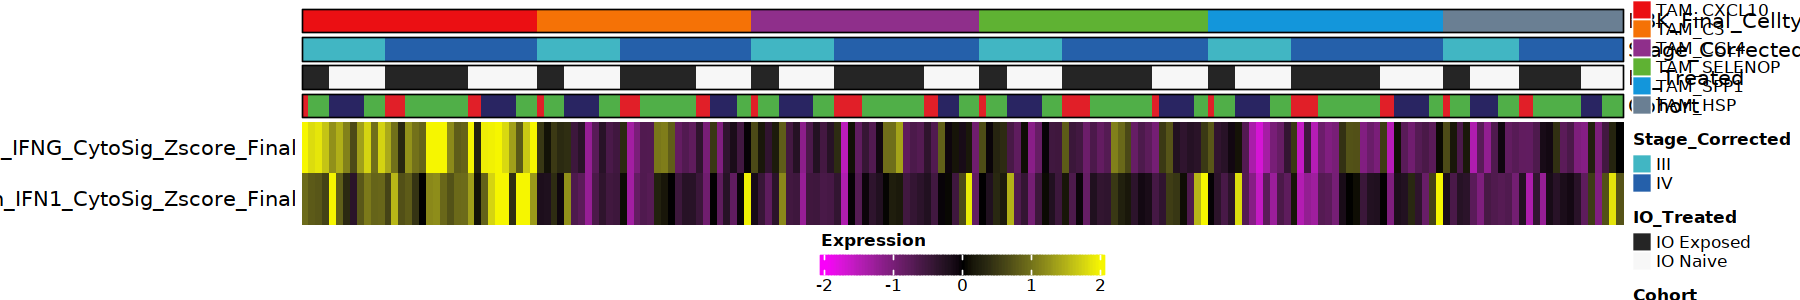

In [115]:
cluster.averages$BBK_Final_Celltype = factor(cluster.averages$BBK_Final_Celltype, levels = c("TAM_CXCL10","TAM_C3","TAM_CCL4","TAM_SELENOP","TAM_SPP1","TAM_HSP"))

options(repr.plot.width=15, repr.plot.height=2.5)
colors <- list(tamcols[levels(cluster.averages$BBK_Final_Celltype)],c("#41B6C3","#2560AA"),c("#252525","#f7f7f7"),c("#E11F28","#292562","#50AF48"))

DefaultAssay(cluster.averages) = "RNA"
plot_heatmap(dataset = cluster.averages, 
              markers = c("median_IFNG_CytoSig_Zscore_Final","median_IFN1_CytoSig_Zscore_Final"),
              sort_var = c("BBK_Final_Celltype","Stage_Corrected","IO_Treated","Cohort"),
              anno_var = c("BBK_Final_Celltype","Stage_Corrected","IO_Treated","Cohort"),
              anno_colors = colors,hm_colors = c("#F900F9","black","#F6F600"))

#magma = c("#000004","#b73779","#fcfdbf")
#seur_approx = c("purple","black","yellow")
#seur = c("#F900F9","black","#F6F600")

### Export

In [116]:
pdf("../Figures/Figure2/Figure2E_TAM_Median_IFNG_IFN1_Heatmap.pdf", useDingbats = F, width = 15, height = 2.5)

cluster.averages$BBK_Final_Celltype = factor(cluster.averages$BBK_Final_Celltype, levels = c("TAM_CXCL10","TAM_C3","TAM_CCL4","TAM_SELENOP","TAM_SPP1","TAM_HSP"))

options(repr.plot.width=15, repr.plot.height=2.5)
colors <- list(tamcols[levels(cluster.averages$BBK_Final_Celltype)],c("#41B6C3","#2560AA"),c("#252525","#f7f7f7"),c("#E11F28","#292562","#50AF48"))

DefaultAssay(cluster.averages) = "RNA"
plot_heatmap(dataset = cluster.averages, 
              markers = c("median_IFNG_CytoSig_Zscore_Final","median_IFN1_CytoSig_Zscore_Final"),
              sort_var = c("BBK_Final_Celltype","Stage_Corrected","IO_Treated","Cohort"),
              anno_var = c("BBK_Final_Celltype","Stage_Corrected","IO_Treated","Cohort"),
              anno_colors = colors,hm_colors = c("#F900F9","black","#F6F600"))
dev.off()

png 
  2

### Figure 2F. Scatter plots showing beta coefficient for IFNG and IFN1 CytoSig Scores in mixed effects models for expression of individual genes within TAM and Tumor cells (untreated patients only) <a name="6"></a>

In [5]:
seur_full_notx_allstages = readRDS("../Data_Objects/seur_full_BBK_notx_allstages_No_Omitted_Contam_Manuscript.RDS")
Idents(seur_full_notx_allstages) = "BBK_Broad_Celltype_DE"

In [6]:
table(Idents(seur_full_notx_allstages))


                      Tumor Perivascular_and_Fibroblast 
                      12921                         786 
                Endothelial                         TAM 
                       1127                       13929 
                   Monocyte                          DC 
                      11243                        2580 
                        CD8                 CD8 NK-like 
                      51211                       10928 
                         NK                    T-Helper 
                      17431                       14026 
                      T-reg                      B cell 
                       5106                        1592 
                Plasma cell 
                        501 

In [7]:
seur_TAM = subset(seur_full_notx_allstages, idents = "TAM")
seur_Tumor = subset(seur_full_notx_allstages, idents = "Tumor")

In [8]:
checkpoints_plot = c("CD274","PDCD1LG2","LGALS9","LGALS3","CEACAM1","FGL1","NECTIN2","CD80","CD86","VSIR","VSIG4","HLA-G","SIGLEC10","LILRB1","TNFRSF14","PVR","CD47","CD24")

### Obtain median % expression of each checkpoint gene in TAM across samples and patients 

In [9]:
TAM_tot = DotPlot(seur_TAM, features = checkpoints_plot, group.by = "BBK_Broad_Celltype_DE")$data
TAM_tot = TAM_tot[,c("pct.exp","features.plot")]
colnames(TAM_tot) = c("Total_Pct_Expressing","gene")
head(TAM_tot)

##

TAM_Sample = DotPlot(seur_TAM, features = checkpoints_plot, group.by = "Sample")$data

TAM_Sample_collapsed = TAM_Sample %>%
group_by(features.plot)%>% 
summarise(Pct_Exp_Sample_Median=median(pct.exp),Avg_Exp_Sample_Median=median(avg.exp))
          
colnames(TAM_Sample_collapsed) = c("gene","Pct_Exp_Sample_Median","Avg_Exp_Sample_Median")
head(TAM_Sample_collapsed)
dim(TAM_Sample_collapsed)

##

TAM_Patient = DotPlot(seur_TAM, features = checkpoints_plot, group.by = "Patient")$data

TAM_Patient_collapsed = TAM_Patient %>%
group_by(features.plot)%>% 
summarise(Pct_Exp_Patient_Median=median(pct.exp),Avg_Exp_Patient_Median=median(avg.exp))
          
colnames(TAM_Patient_collapsed) = c("gene","Pct_Exp_Patient_Median","Avg_Exp_Patient_Median")
head(TAM_Patient_collapsed)
dim(TAM_Patient_collapsed)

Warning message in FetchData.Seurat(object = object, vars = features, cells = cells):
"The following requested variables were not found: CD24"
Warning message:
"Only one identity present, the expression values will be not scaled"


Total_Pct_Expressing gene    
CD274     1.9168641           CD274   
PDCD1LG2  7.1649077           PDCD1LG2
LGALS9   60.4924977           LGALS9  
LGALS3   70.9814057           LGALS3  
CEACAM1   0.5025486           CEACAM1 
FGL1      0.0215378           FGL1

Warning message in FetchData.Seurat(object = object, vars = features, cells = cells):
"The following requested variables were not found: CD24"


gene     Pct_Exp_Sample_Median Avg_Exp_Sample_Median
1 CD274     2.0328382            0.018856105          
2 PDCD1LG2  6.8000000            0.072042747          
3 LGALS9   64.9582837            1.333956028          
4 LGALS3   77.3333333            5.812977700          
5 CEACAM1   0.1998002            0.003488891          
6 FGL1      0.0000000            0.000000000

[1] 17  3

Warning message in FetchData.Seurat(object = object, vars = features, cells = cells):
"The following requested variables were not found: CD24"


gene     Pct_Exp_Patient_Median Avg_Exp_Patient_Median
1 CD274     1.7902813             0.018833916           
2 PDCD1LG2  7.5723831             0.079937913           
3 LGALS9   63.5544108             1.223672653           
4 LGALS3   75.8312020             5.812977700           
5 CEACAM1   0.3089598             0.004082972           
6 FGL1      0.0000000             0.000000000

[1] 17  3

In [10]:
TAM_stats = left_join(TAM_tot, TAM_Sample_collapsed, by = "gene")
TAM_stats = left_join(TAM_stats, TAM_Patient_collapsed, by = "gene")
head(TAM_stats)

Total_Pct_Expressing gene     Pct_Exp_Sample_Median Avg_Exp_Sample_Median
1  1.9168641           CD274     2.0328382            0.018856105          
2  7.1649077           PDCD1LG2  6.8000000            0.072042747          
3 60.4924977           LGALS9   64.9582837            1.333956028          
4 70.9814057           LGALS3   77.3333333            5.812977700          
5  0.5025486           CEACAM1   0.1998002            0.003488891          
6  0.0215378           FGL1      0.0000000            0.000000000          
  Pct_Exp_Patient_Median Avg_Exp_Patient_Median
1  1.7902813             0.018833916           
2  7.5723831             0.079937913           
3 63.5544108             1.223672653           
4 75.8312020             5.812977700           
5  0.3089598             0.004082972           
6  0.0000000             0.000000000

### Obtain median % expression of each checkpoint gene in Tumor cells across samples and patients

In [11]:
Tumor_tot = DotPlot(seur_Tumor, features = checkpoints_plot, group.by = "BBK_Broad_Celltype_DE")$data
Tumor_tot = Tumor_tot[,c("pct.exp","features.plot")]
colnames(Tumor_tot) = c("Total_Pct_Expressing","gene")
head(Tumor_tot)

##

Tumor_Sample = DotPlot(seur_Tumor, features = checkpoints_plot, group.by = "Sample")$data

Tumor_Sample_collapsed = Tumor_Sample %>%
group_by(features.plot)%>% 
summarise(Pct_Exp_Sample_Median=median(pct.exp),Avg_Exp_Sample_Median=median(avg.exp))
          
colnames(Tumor_Sample_collapsed) = c("gene","Pct_Exp_Sample_Median","Avg_Exp_Sample_Median")
head(Tumor_Sample_collapsed)
dim(Tumor_Sample_collapsed)

##

Tumor_Patient = DotPlot(seur_Tumor, features = checkpoints_plot, group.by = "Patient")$data

Tumor_Patient_collapsed = Tumor_Patient %>%
group_by(features.plot)%>% 
summarise(Pct_Exp_Patient_Median=median(pct.exp),Avg_Exp_Patient_Median=median(avg.exp))
          
colnames(Tumor_Patient_collapsed) = c("gene","Pct_Exp_Patient_Median","Avg_Exp_Patient_Median")
head(Tumor_Patient_collapsed)
dim(Tumor_Patient_collapsed)

Warning message in FetchData.Seurat(object = object, vars = features, cells = cells):
"The following requested variables were not found: CD24"
Warning message:
"Only one identity present, the expression values will be not scaled"


Total_Pct_Expressing gene    
CD274     2.2831050           CD274   
PDCD1LG2  1.5943038           PDCD1LG2
LGALS9   27.8074452           LGALS9  
LGALS3   60.3281480           LGALS3  
CEACAM1   1.8729201           CEACAM1 
FGL1      0.2940949           FGL1

Warning message in FetchData.Seurat(object = object, vars = features, cells = cells):
"The following requested variables were not found: CD24"


gene     Pct_Exp_Sample_Median Avg_Exp_Sample_Median
1 CD274     1.562500             0.01812066           
2 PDCD1LG2  0.000000             0.00000000           
3 LGALS9    4.822505             0.04684487           
4 LGALS3   77.631579             5.93095343           
5 CEACAM1   0.000000             0.00000000           
6 FGL1      0.000000             0.00000000

[1] 17  3

Warning message in FetchData.Seurat(object = object, vars = features, cells = cells):
"The following requested variables were not found: CD24"


gene     Pct_Exp_Patient_Median Avg_Exp_Patient_Median
1 CD274     1.5625000             0.018120656           
2 PDCD1LG2  0.0000000             0.000000000           
3 LGALS9    4.4836957             0.045284732           
4 LGALS3   79.2682927             6.037559039           
5 CEACAM1   0.9171196             0.006364256           
6 FGL1      0.0000000             0.000000000

[1] 17  3

In [12]:
Tumor_stats = left_join(Tumor_tot, Tumor_Sample_collapsed, by = "gene")
Tumor_stats = left_join(Tumor_stats, Tumor_Patient_collapsed, by = "gene")
head(Tumor_stats)

Total_Pct_Expressing gene     Pct_Exp_Sample_Median Avg_Exp_Sample_Median
1  2.2831050           CD274     1.562500             0.01812066           
2  1.5943038           PDCD1LG2  0.000000             0.00000000           
3 27.8074452           LGALS9    4.822505             0.04684487           
4 60.3281480           LGALS3   77.631579             5.93095343           
5  1.8729201           CEACAM1   0.000000             0.00000000           
6  0.2940949           FGL1      0.000000             0.00000000           
  Pct_Exp_Patient_Median Avg_Exp_Patient_Median
1  1.5625000             0.018120656           
2  0.0000000             0.000000000           
3  4.4836957             0.045284732           
4 79.2682927             6.037559039           
5  0.9171196             0.006364256           
6  0.0000000             0.000000000

### Read in mixed effects models output for TAM. Plot IFN1 beta, IFNG beta and size points by median % exp across patients

IFN1_resp_beta IFNG_resp_beta IFN1_resp_pval IFNG_resp_pval gene    
1  0.061517070   0.097690310    2.614697e-05   6.063983e-15   CD47    
2 -0.039471664   0.207498161    7.113849e-03   1.327513e-59   CD274   
3 -0.011159927   0.099305073    4.482736e-01   3.692882e-15   CD86    
4  0.032240270   0.013541440    2.894960e-02   2.814896e-01   HLA-G   
5  0.006978201   0.117844727    6.366511e-01   2.156740e-20   PDCD1LG2
6  0.155136321   0.001699584    3.087952e-27   8.892653e-01   LGALS9  
  IFN1_resp_p_adj_BH IFNG_resp_p_adj_BH IFN1_resp_p_adj_Bonf
1 3.040956e-04       1.153922e-13       2.393232e-01        
2 4.207747e-02       1.292631e-57       1.000000e+00        
3 7.375220e-01       7.146078e-14       1.000000e+00        
4 1.277607e-01       5.394627e-01       1.000000e+00        
5 8.539372e-01       5.840427e-19       1.000000e+00        
6 1.519571e-25       9.524853e-01       2.826402e-23        
  IFNG_resp_p_adj_Bonf Total_Pct_Expressing Pct_Exp_Sample_Median
1 5.550364e-11         50.778950            56.250000            
2 1.215073e-55          1.916864             2.032838            
3 3.380095e-11         66.415392            70.971867            
4 1.000000e+00          3.848087             3.437877            
5 1.974064e-16          7.164908             6.800000            
6 1.000000e+00         60.492498            64.958284            
  Avg_Exp_Sample_Median Pct_Exp_Patient_Median Avg_Exp_Patient_Median
1 0.88309728            55.233853              0.88309728            
2 0.01885611             1.790281              0.01883392            
3 1.57716619            71.212121              1.47867668            
4 0.04324548             5.160281              0.04652282            
5 0.07204275             7.572383              0.07993791            
6 1.33395603            63.554411              1.22367265


       A. ns B. IFN1 only C. IFNG only  D. Both sig 
           4            3            8            2 

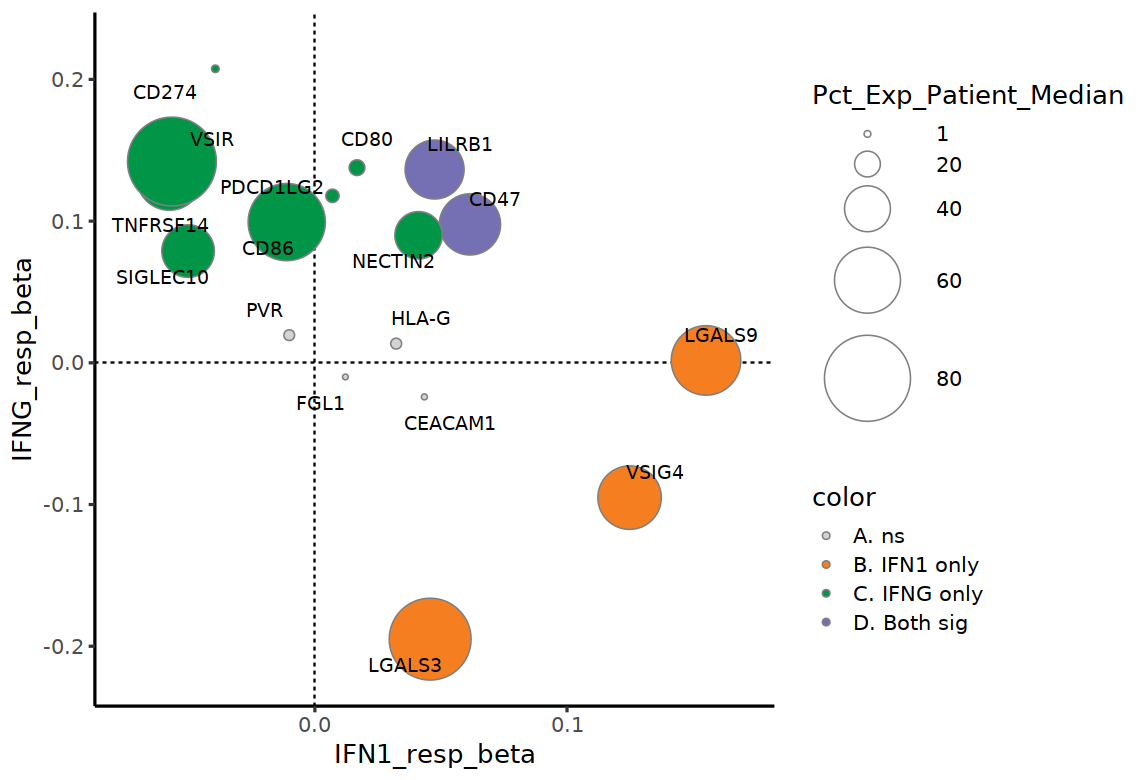

In [13]:
TAM = readRDS("../Outputs/Manuscript_MixedEffects_Output_Stage_Corrected_EarlyLate/TAM_CytoSig_MixedEffects_Patient_Stage_Corrected_EarlyLate_Vargenes.RDS")
TAM = subset(TAM, gene %in% checkpoints_plot)
TAM = left_join(TAM, TAM_stats, by = "gene")
head(TAM)

TAM$label = TAM$gene

up_IFN1 = subset(TAM, IFN1_resp_p_adj_BH < 0.01 & IFN1_resp_beta > 0)$gene
up_IFNG = subset(TAM, IFNG_resp_p_adj_BH < 0.01 & IFNG_resp_beta > 0)$gene
up_IFN1_only = setdiff(up_IFN1, up_IFNG)
up_IFNG_only = setdiff(up_IFNG, up_IFN1)
up_both = intersect(up_IFN1, up_IFNG)
ns_IFN1 = subset(TAM, IFN1_resp_beta < 0 | (IFN1_resp_beta > 0 & IFN1_resp_p_adj_BH > 0.01))$gene
ns_IFNG = subset(TAM, IFNG_resp_beta < 0 | (IFNG_resp_beta > 0 & IFNG_resp_p_adj_BH > 0.01))$gene
ns_both = intersect(ns_IFN1, ns_IFNG)


TAM = mutate(TAM, color = ifelse(gene %in% ns_both,"A. ns",ifelse(gene %in% up_IFN1_only ,"B. IFN1 only",ifelse(gene %in% up_IFNG_only,"C. IFNG only",ifelse(gene %in% up_both ,"D. Both sig","None")))))
#head(TAM)
table(TAM$color)

options(repr.plot.width=9.5, repr.plot.height=6.5)
ggplot(TAM, aes(y=IFNG_resp_beta, x=IFN1_resp_beta, label = label,fill = color)) + 
geom_vline(xintercept = 0,linetype = "dashed") +
geom_hline(yintercept = 0,linetype = "dashed")+
geom_point(aes(size = Pct_Exp_Patient_Median),shape = 21,color = "grey50") + theme_classic(base_size = 15) + 
scale_radius(range = c(1, 25),breaks = c(1,20,40,60,80),limits = c(0,85)) +
geom_text_repel(max.overlaps = Inf,box.padding = 0.7, color = "black",segment.color = NA) +
scale_fill_manual(values = c("lightgrey","#F57F20","#019547","#7570b3","black")) +
ylim(c(-0.22,0.225)) +
xlim(c(-0.075,0.17))

ggsave("../Figures/Figure2/Figure2F_TAM_MixedEffects_Checkpoint_Scatter_w95_h65.pdf",width = 9.5, height = 6.5)

In [20]:
subset(TAM, !(gene %in% c("CD80","CD274","PDCD1LG2")) & color != "A. ns")

min(subset(TAM, !(gene %in% c("CD80","CD274","PDCD1LG2")) & color != "A. ns")$Pct_Exp_Patient_Median)

IFN1_resp_beta IFNG_resp_beta IFN1_resp_pval IFNG_resp_pval gene    
1   0.06151707     0.097690310   2.614697e-05   6.063983e-15   CD47    
3  -0.01115993     0.099305073   4.482736e-01   3.692882e-15   CD86    
6   0.15513632     0.001699584   3.087952e-27   8.892653e-01   LGALS9  
9   0.04111913     0.090008104   5.176396e-03   7.812676e-13   NECTIN2 
11 -0.05028266     0.078855199   4.673862e-04   1.207361e-10   SIGLEC10
12 -0.05770453     0.130654299   8.452827e-05   3.202103e-25   TNFRSF14
13  0.12481834    -0.095134645   4.606636e-18   8.664651e-15   VSIG4   
14 -0.05669341     0.142042871   3.859534e-05   1.207920e-33   VSIR    
15  0.04572238    -0.194995615   5.075822e-04   2.841620e-67   LGALS3  
17  0.04748236     0.136404112   1.053734e-03   1.365805e-27   LILRB1  
   IFN1_resp_p_adj_BH IFNG_resp_p_adj_BH IFN1_resp_p_adj_Bonf
1  3.040956e-04       1.153922e-13       2.393232e-01        
3  7.375220e-01       7.146078e-14       1.000000e+00        
6  1.519571e-25       9.524853e-01       2.826402e-23        
9  3.242954e-02       1.321801e-11       1.000000e+00        
11 4.109497e-03       1.710677e-09       1.000000e+00        
12 8.852257e-04       1.144877e-23       7.736873e-01        
13 1.609333e-16       1.631843e-13       4.216454e-14        
14 4.350531e-04       5.880899e-32       3.532631e-01        
15 4.420456e-03       3.514777e-65       1.000000e+00        
17 8.426132e-03       5.342400e-26       1.000000e+00        
   IFNG_resp_p_adj_Bonf Total_Pct_Expressing Pct_Exp_Sample_Median
1  5.550364e-11         50.77895             56.25000             
3  3.380095e-11         66.41539             70.97187             
6  1.000000e+00         60.49250             64.95828             
9  7.150942e-09         34.91277             36.10586             
11 1.105097e-06         45.38732             46.01044             
12 2.930885e-21         51.94917             55.95463             
13 7.930755e-11         60.51404             58.57143             
14 1.105609e-29         80.57291             82.84862             
15 2.600935e-63         70.98141             77.33333             
17 1.250122e-23         47.90006             52.08333             
   Avg_Exp_Sample_Median Pct_Exp_Patient_Median Avg_Exp_Patient_Median label   
1  0.8830973             55.23385               0.8830973              CD47    
3  1.5771662             71.21212               1.4786767              CD86    
6  1.3339560             63.55441               1.2236727              LGALS9  
9  0.5755098             41.48936               0.5665903              NECTIN2 
11 0.7941023             46.66667               0.8160488              SIGLEC10
12 0.9560361             59.23719               0.9560361              TNFRSF14
13 2.0797814             57.51418               1.8044179              VSIG4   
14 3.4186192             82.79773               3.1307046              VSIR    
15 5.8129777             75.83120               5.8129777              LGALS3  
17 0.8559747             53.03933               0.8293968              LILRB1  
   color       
1  D. Both sig 
3  C. IFNG only
6  B. IFN1 only
9  C. IFNG only
11 C. IFNG only
12 C. IFNG only
13 B. IFN1 only
14 C. IFNG only
15 B. IFN1 only
17 D. Both sig

[1] 41.48936

In [21]:
subset(TAM, gene %in% c("CD80","CD274","PDCD1LG2") & color != "A. ns")

IFN1_resp_beta IFNG_resp_beta IFN1_resp_pval IFNG_resp_pval gene    
2  -0.039471664   0.2074982      0.007113849    1.327513e-59   CD274   
5   0.006978201   0.1178447      0.636651090    2.156740e-20   PDCD1LG2
16  0.016709899   0.1377116      0.257028324    2.549512e-27   CD80    
   IFN1_resp_p_adj_BH IFNG_resp_p_adj_BH IFN1_resp_p_adj_Bonf
2  0.04207747         1.292631e-57       1                   
5  0.85393720         5.840427e-19       1                   
16 0.55603409         9.846281e-26       1                   
   IFNG_resp_p_adj_Bonf Total_Pct_Expressing Pct_Exp_Sample_Median
2  1.215073e-55         1.916864              2.032838            
5  1.974064e-16         7.164908              6.800000            
16 2.333569e-23         9.770981             10.846246            
   Avg_Exp_Sample_Median Pct_Exp_Patient_Median Avg_Exp_Patient_Median label   
2  0.01885611             1.790281              0.01883392             CD274   
5  0.07204275             7.572383              0.07993791             PDCD1LG2
16 0.14751528            10.000000              0.12903651             CD80    
   color       
2  C. IFNG only
5  C. IFNG only
16 C. IFNG only

### Read in mixed effects models output for Tumor cells. Plot IFN1 beta, IFNG beta and size points by median % exp across patients

IFN1_resp_beta IFNG_resp_beta IFN1_resp_pval IFNG_resp_pval gene    
1  0.010251886    0.088186074    5.251707e-01  6.754851e-08   CD47    
2  0.078398208    0.130089397    1.425057e-06  3.148489e-15   CD274   
3 -0.001106897   -0.006981997    9.427376e-01  6.692512e-01   CD86    
4  0.030524942    0.038761231    4.648386e-02  1.243197e-02   HLA-G   
5  0.030834641    0.146736363    5.655896e-02  4.204243e-19   PDCD1LG2
6  0.400431982   -0.003986799   4.454333e-203  7.605531e-01   LGALS9  
  IFN1_resp_p_adj_BH IFNG_resp_p_adj_BH IFN1_resp_p_adj_Bonf
1  7.229399e-01      8.310623e-07        1.000000e+00       
2  1.121142e-05      7.958966e-14        1.318462e-02       
3  9.756385e-01      8.274428e-01        1.000000e+00       
4  1.244412e-01      5.116173e-02        1.000000e+00       
5  1.457208e-01      1.451405e-17        1.000000e+00       
6 1.471839e-200      8.807945e-01       4.121149e-199       
  IFNG_resp_p_adj_Bonf Total_Pct_Expressing Pct_Exp_Sample_Median
1 6.249589e-04         45.89428063          34.756098            
2 2.912982e-11          2.28310502           1.562500            
3 1.000000e+00          0.06191471           0.000000            
4 1.000000e+00         13.98498568           5.417186            
5 3.889766e-15          1.59430385           0.000000            
6 1.000000e+00         27.80744524           4.822505            
  Avg_Exp_Sample_Median Pct_Exp_Patient_Median Avg_Exp_Patient_Median
1 0.65102247            30.000000              0.62918859            
2 0.01812066             1.562500              0.01812066            
3 0.00000000             0.000000              0.00000000            
4 0.03937370             4.414925              0.02749733            
5 0.00000000             0.000000              0.00000000            
6 0.04684487             4.483696              0.04528473


       A. ns B. IFN1 only C. IFNG only  D. Both sig 
          10            2            3            2 

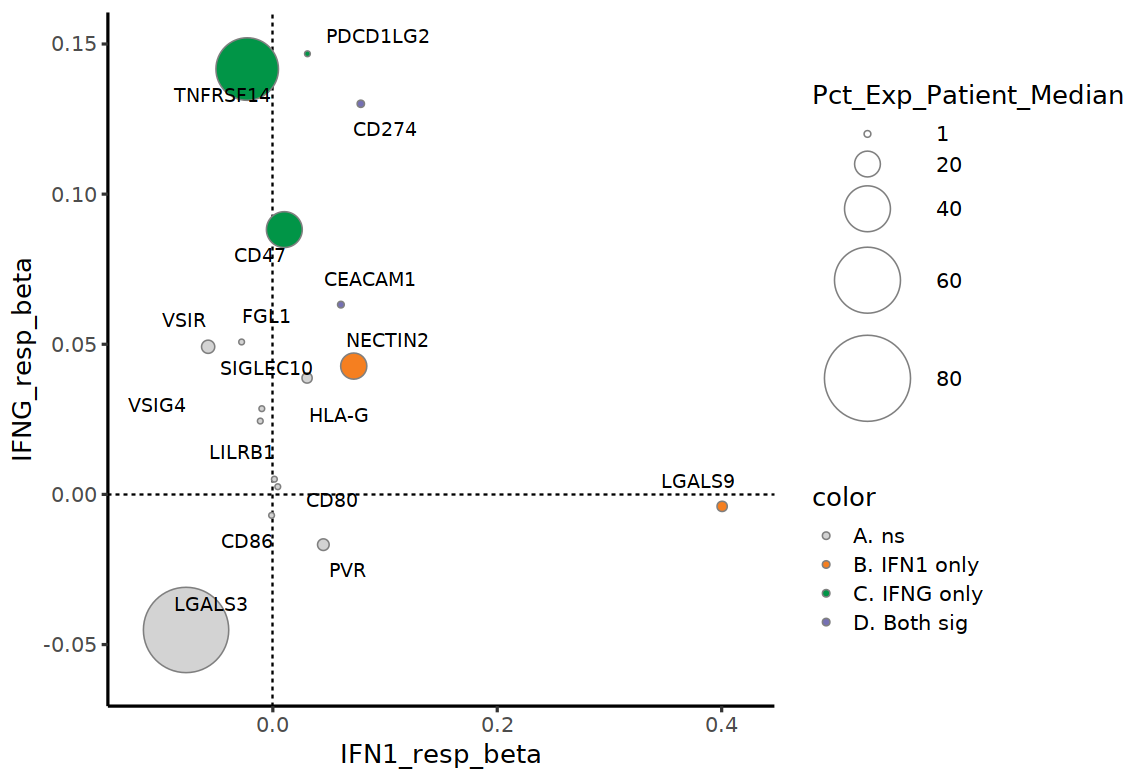

In [16]:
Tumor = readRDS("../Outputs/Manuscript_MixedEffects_Output_Stage_Corrected_EarlyLate/Tumor_CytoSig_MixedEffects_Patient_Stage_Corrected_EarlyLate_Vargenes.RDS")
Tumor = subset(Tumor, gene %in% checkpoints_plot)
Tumor = left_join(Tumor, Tumor_stats, by = "gene")
head(Tumor)

Tumor$label = Tumor$gene

up_IFN1 = subset(Tumor, IFN1_resp_p_adj_BH < 0.01 & IFN1_resp_beta > 0)$gene
up_IFNG = subset(Tumor, IFNG_resp_p_adj_BH < 0.01 & IFNG_resp_beta > 0)$gene
up_IFN1_only = setdiff(up_IFN1, up_IFNG)
up_IFNG_only = setdiff(up_IFNG, up_IFN1)
up_both = intersect(up_IFN1, up_IFNG)
ns_IFN1 = subset(Tumor, IFN1_resp_beta < 0 | (IFN1_resp_beta > 0 & IFN1_resp_p_adj_BH > 0.01))$gene
ns_IFNG = subset(Tumor, IFNG_resp_beta < 0 | (IFNG_resp_beta > 0 & IFNG_resp_p_adj_BH > 0.01))$gene
ns_both = intersect(ns_IFN1, ns_IFNG)


Tumor = mutate(Tumor, color = ifelse(gene %in% ns_both,"A. ns",ifelse(gene %in% up_IFN1_only ,"B. IFN1 only",ifelse(gene %in% up_IFNG_only,"C. IFNG only",ifelse(gene %in% up_both ,"D. Both sig","None")))))
#head(Tumor)
table(Tumor$color)

options(repr.plot.width=9.5, repr.plot.height=6.5)
ggplot(Tumor, aes(y=IFNG_resp_beta, x=IFN1_resp_beta, label = label,fill = color)) + 
geom_vline(xintercept = 0,linetype = "dashed") +
geom_hline(yintercept = 0,linetype = "dashed")+
geom_point(aes(size = Pct_Exp_Patient_Median),shape = 21,color = "grey50") + theme_classic(base_size = 15) + 
scale_radius(range = c(1, 25),breaks = c(1,20,40,60,80),limits = c(0,85)) +
geom_text_repel(max.overlaps = Inf,box.padding = 0.7, color = "black",segment.color = NA) +
scale_fill_manual(values = c("lightgrey","#F57F20","#019547","#7570b3","black")) +
ylim(c(-0.06,0.15)) +
xlim(c(-0.12,0.42))

ggsave("../Figures/Figure2/Figure2F_Tumor_MixedEffects_Checkpoint_Scatter_w95_h65.pdf",width = 9.5, height = 6.5)

### Force lines

IFN1_resp_beta IFNG_resp_beta IFN1_resp_pval IFNG_resp_pval gene    
1  0.010251886    0.088186074    5.251707e-01  6.754851e-08   CD47    
2  0.078398208    0.130089397    1.425057e-06  3.148489e-15   CD274   
3 -0.001106897   -0.006981997    9.427376e-01  6.692512e-01   CD86    
4  0.030524942    0.038761231    4.648386e-02  1.243197e-02   HLA-G   
5  0.030834641    0.146736363    5.655896e-02  4.204243e-19   PDCD1LG2
6  0.400431982   -0.003986799   4.454333e-203  7.605531e-01   LGALS9  
  IFN1_resp_p_adj_BH IFNG_resp_p_adj_BH IFN1_resp_p_adj_Bonf
1  7.229399e-01      8.310623e-07        1.000000e+00       
2  1.121142e-05      7.958966e-14        1.318462e-02       
3  9.756385e-01      8.274428e-01        1.000000e+00       
4  1.244412e-01      5.116173e-02        1.000000e+00       
5  1.457208e-01      1.451405e-17        1.000000e+00       
6 1.471839e-200      8.807945e-01       4.121149e-199       
  IFNG_resp_p_adj_Bonf Total_Pct_Expressing Pct_Exp_Sample_Median
1 6.249589e-04         45.89428063          34.756098            
2 2.912982e-11          2.28310502           1.562500            
3 1.000000e+00          0.06191471           0.000000            
4 1.000000e+00         13.98498568           5.417186            
5 3.889766e-15          1.59430385           0.000000            
6 1.000000e+00         27.80744524           4.822505            
  Avg_Exp_Sample_Median Pct_Exp_Patient_Median Avg_Exp_Patient_Median
1 0.65102247            30.000000              0.62918859            
2 0.01812066             1.562500              0.01812066            
3 0.00000000             0.000000              0.00000000            
4 0.03937370             4.414925              0.02749733            
5 0.00000000             0.000000              0.00000000            
6 0.04684487             4.483696              0.04528473


       A. ns B. IFN1 only C. IFNG only  D. Both sig 
          10            2            3            2 

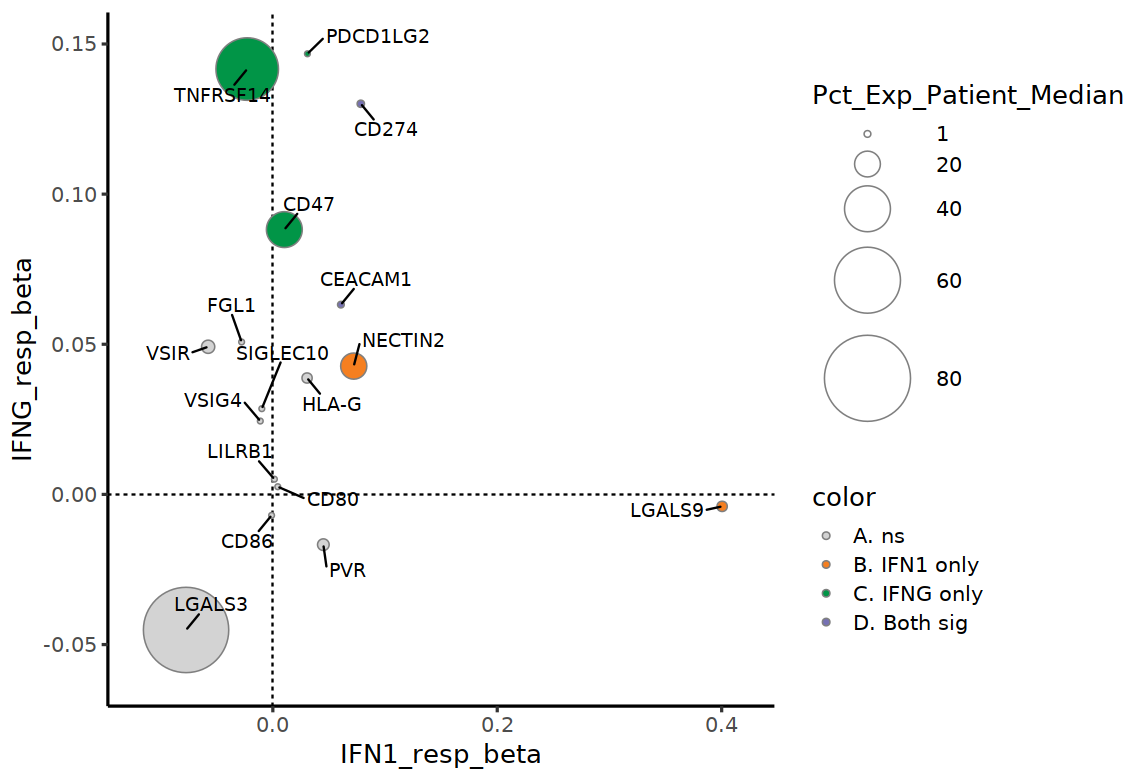

In [17]:
Tumor = readRDS("../Outputs/Manuscript_MixedEffects_Output_Stage_Corrected_EarlyLate/Tumor_CytoSig_MixedEffects_Patient_Stage_Corrected_EarlyLate_Vargenes.RDS")
Tumor = subset(Tumor, gene %in% checkpoints_plot)
Tumor = left_join(Tumor, Tumor_stats, by = "gene")
head(Tumor)

Tumor$label = Tumor$gene

up_IFN1 = subset(Tumor, IFN1_resp_p_adj_BH < 0.01 & IFN1_resp_beta > 0)$gene
up_IFNG = subset(Tumor, IFNG_resp_p_adj_BH < 0.01 & IFNG_resp_beta > 0)$gene
up_IFN1_only = setdiff(up_IFN1, up_IFNG)
up_IFNG_only = setdiff(up_IFNG, up_IFN1)
up_both = intersect(up_IFN1, up_IFNG)
ns_IFN1 = subset(Tumor, IFN1_resp_beta < 0 | (IFN1_resp_beta > 0 & IFN1_resp_p_adj_BH > 0.01))$gene
ns_IFNG = subset(Tumor, IFNG_resp_beta < 0 | (IFNG_resp_beta > 0 & IFNG_resp_p_adj_BH > 0.01))$gene
ns_both = intersect(ns_IFN1, ns_IFNG)


Tumor = mutate(Tumor, color = ifelse(gene %in% ns_both,"A. ns",ifelse(gene %in% up_IFN1_only ,"B. IFN1 only",ifelse(gene %in% up_IFNG_only,"C. IFNG only",ifelse(gene %in% up_both ,"D. Both sig","None")))))
#head(Tumor)
table(Tumor$color)

options(repr.plot.width=9.5, repr.plot.height=6.5)
ggplot(Tumor, aes(y=IFNG_resp_beta, x=IFN1_resp_beta, label = label,fill = color)) + 
geom_vline(xintercept = 0,linetype = "dashed") +
geom_hline(yintercept = 0,linetype = "dashed")+
geom_point(aes(size = Pct_Exp_Patient_Median),shape = 21,color = "grey50") + theme_classic(base_size = 15) + 
scale_radius(range = c(1, 25),breaks = c(1,20,40,60,80),limits = c(0,85)) +
geom_text_repel(max.overlaps = Inf,box.padding = 0.7, color = "black",segment.color = "black") +
scale_fill_manual(values = c("lightgrey","#F57F20","#019547","#7570b3","black")) +
ylim(c(-0.06,0.15)) +
xlim(c(-0.12,0.42))

In [24]:
subset(Tumor, gene %in% c("TNFRSF14", "CD47", "NECTIN2" ) & color != "A. ns")

IFN1_resp_beta IFNG_resp_beta IFN1_resp_pval IFNG_resp_pval gene    
1   0.01025189    0.08818607     5.251707e-01   6.754851e-08   CD47    
9   0.07210397    0.04272873     2.574575e-06   5.861286e-03   NECTIN2 
12 -0.02284127    0.14165047     1.439451e-01   3.669015e-19   TNFRSF14
   IFN1_resp_p_adj_BH IFNG_resp_p_adj_BH IFN1_resp_p_adj_Bonf
1  7.229399e-01       8.310623e-07       1.00000000          
9  1.963724e-05       2.703321e-02       0.02381997          
12 2.975452e-01       1.276155e-17       1.00000000          
   IFNG_resp_p_adj_Bonf Total_Pct_Expressing Pct_Exp_Sample_Median
1  6.249589e-04         45.89428             34.75610             
9  1.000000e+00         36.60707             21.95122             
12 3.394573e-15         43.47187             48.17073             
   Avg_Exp_Sample_Median Pct_Exp_Patient_Median Avg_Exp_Patient_Median label   
1  0.6510225             30.00000               0.6291886              CD47    
9  0.3360023             20.34739               0.3332472              NECTIN2 
12 1.1644617             56.57895               1.4818221              TNFRSF14
   color       
1  C. IFNG only
9  B. IFN1 only
12 C. IFNG only

In [25]:
subset(Tumor, gene %in% c("CD274", "PDCD1LG2", "CEACAM1", "LGALS9") & color != "A. ns")

IFN1_resp_beta IFNG_resp_beta IFN1_resp_pval IFNG_resp_pval gene    
2 0.07839821      0.130089397    1.425057e-06  3.148489e-15   CD274   
5 0.03083464      0.146736363    5.655896e-02  4.204243e-19   PDCD1LG2
6 0.40043198     -0.003986799   4.454333e-203  7.605531e-01   LGALS9  
7 0.06066521      0.063198765    2.199503e-04  1.437111e-04   CEACAM1 
  IFN1_resp_p_adj_BH IFNG_resp_p_adj_BH IFN1_resp_p_adj_Bonf
2  1.121142e-05      7.958966e-14        1.318462e-02       
5  1.457208e-01      1.451405e-17        1.000000e+00       
6 1.471839e-200      8.807945e-01       4.121149e-199       
7  1.179699e-03      1.043842e-03        1.000000e+00       
  IFNG_resp_p_adj_Bonf Total_Pct_Expressing Pct_Exp_Sample_Median
2 2.912982e-11          2.283105            1.562500             
5 3.889766e-15          1.594304            0.000000             
6 1.000000e+00         27.807445            4.822505             
7 1.000000e+00          1.872920            0.000000             
  Avg_Exp_Sample_Median Pct_Exp_Patient_Median Avg_Exp_Patient_Median label   
2 0.01812066            1.5625000              0.018120656            CD274   
5 0.00000000            0.0000000              0.000000000            PDCD1LG2
6 0.04684487            4.4836957              0.045284732            LGALS9  
7 0.00000000            0.9171196              0.006364256            CEACAM1 
  color       
2 D. Both sig 
5 C. IFNG only
6 B. IFN1 only
7 D. Both sig

In [2]:
print(sessionInfo())
print(version)

R version 4.1.0 (2021-05-18)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server 7.9 (Maipo)

Matrix products: default
BLAS:   /usr/lib64/libblas.so.3.4.2
LAPACK: /broad/software/free/Linux/redhat_7_x86_64/pkgs/r_4.1.0/lib64/R/lib/libRlapack.so

locale:
[1] C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] reshape2_1.4.4         yarrr_0.1.5            circlize_0.4.15       
 [4] BayesFactor_0.9.12-4.2 coda_0.19-4            jpeg_0.1-9            
 [7] viridis_0.6.1          viridisLite_0.4.2      broom_1.0.1           
[10] magrittr_2.0.3         pheatmap_1.0.12        ggridges_0.5.4        
[13] hrbrthemes_0.8.0       cowplot_1.1.1          Scillus_0.5.0         
[16] lmerTest_3.1-3         lme4_1.1-31            Matrix_1.5-1          
[19] RColorBrewer_1.1-3     glue_1.7.0             ggrepel_0.9.2         
[22] ggpubr_0.4.0           dplyr_1.0.10           useful_1.2.6